In [2]:
import numpy as np
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def one_hot(ind, vocab_size):
    rec = np.zeros(vocab_size)
    rec[ind] = 1
    return rec

In [8]:
def create_training_data(corpus_raw, WINDOW_SIZE = 2):
    words_list = []
    
    for sent in corpus_raw.split('.'):
        for w in sent.split():
            if w != '.':
                words_list.append(w.split('.')[0])  # Remove if delimiter is tied to the end of a word
                
    words_list = set(words_list)  # Remove the duplicates for each word
    
    word2ind = {}  # Define the dictionary for converting a word to index

    ind2word = {}  # Define dictionary for retrieving a word from its index

    vocab_size = len(words_list)  # Count of unique words in the vocabulary

    for i, w in enumerate(words_list):  # Build the dictionaries
        word2ind[w] = i
        ind2word[i] = w
    
    print(word2ind)
    sentences_list = corpus_raw.split('.')
    sentences = []
    
    for sent in sentences_list:
        sent_array = sent.split()
        sent_array = [s.split('.')[0] for s in sent_array]
        sentences.append(sent_array)  # finally sentences would hold arrays of word array for sentences

    data_recs = []  # Holder for the input output record

    for sent in sentences:
        for ind, w in enumerate(sent):
            rec = []
            for nb_w in sent[max(ind - WINDOW_SIZE, 0): min(ind + WINDOW_SIZE, len(sent)) + 1]:
                if nb_w != w:
                    rec.append(nb_w)
                data_recs.append([rec, w])

    x_train, y_train = [], []
    
    for rec in data_recs:
        input_ = np.zeros(vocab_size)
        for i in range(WINDOW_SIZE-1):
            input_ += one_hot(word2ind[rec[0][i]], vocab_size)
        input_ = input_/len(rec[0])
        x_train.append(input_)
        y_train.append(one_hot(word2ind[rec[1]], vocab_size))
    
    return x_train, y_train, word2ind, ind2word, vocab_size

In [9]:
corpus_raw = "Deep Learning has evolved from Artificial Neural Networks, which has been there since the 1940s. " \
             "Neural Networks are interconnected networks of processing unitscalled artificial neurons that loosely mimic axons in a biological brain. " \
             "In a biological neuron, the dendrites receive input signals from various neighboring neurons, typically greater than 1000. " \
             "These modified signals are then passed on to the cell body or soma of the neuron, where these signals are summed together and then passed on to the axon of the neuron. " \
             "If the received input signal is more than a specified threshold, the axon will release a signal which again will pass on to neighboring dendrites of other neurons. " \
             "Figure 2-1 depicts the structure of a biological neuron for reference. " \
             "The artificial neuron units are inspired by the biological neurons with some modifications as per convenience. " \
             "Much like the dendrites, the input connections to the neuron carry the attenuated or amplified input signals from other neighboring neurons. " \
             "The signals are passed on to the neuron, where the input signals are summed up and then a decision is taken what to output based on the total input received. " \
             "For instance, for a binary threshold neuron an output value of 1 is provided when the total input exceeds a pre-defined threshold; otherwise, the output stays at 0. " \
             "Several other types of neurons are used in artificial neural networks, and their implementation only differs with respect to the activation function on the total input to produce the neuron output. " \
             "In Figure 2-2 the different biological equivalents are tagged in the artificial neuron for easy analogy and interpretation."

corpus_raw = corpus_raw.lower()
x_train, y_train, word2ind, ind2word, vocab_size = create_training_data(corpus_raw, 2)


{'at': 0, 'different': 1, 'dendrites': 2, 'mimic': 3, 'some': 4, 'equivalents': 5, 'only': 6, 'threshold': 7, 'specified': 8, 'learning': 9, 'when': 10, 'used': 11, 'output': 12, 'than': 13, 'instance,': 14, 'these': 15, 'neuron': 16, 'from': 17, 'convenience': 18, 'their': 19, 'up': 20, 'more': 21, 'reference': 22, 'greater': 23, 'much': 24, 'various': 25, 'deep': 26, 'receive': 27, 'body': 28, 'and': 29, 'will': 30, 'are': 31, 'processing': 32, 'several': 33, '1000': 34, 'neuron,': 35, 'value': 36, '1': 37, 'received': 38, 'on': 39, 'produce': 40, 'which': 41, 'the': 42, 'otherwise,': 43, 'a': 44, 'total': 45, 'per': 46, 'an': 47, 'summed': 48, 'or': 49, 'signal': 50, 'release': 51, 'amplified': 52, 'exceeds': 53, 'if': 54, 'like': 55, 'tagged': 56, 'as': 57, 'function': 58, 'axons': 59, 'artificial': 60, 'based': 61, 'neurons,': 62, 'unitscalled': 63, 'neural': 64, 'networks': 65, 'cell': 66, 'to': 67, 'biological': 68, 'units': 69, 'taken': 70, 'what': 71, 'attenuated': 72, 'then':

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



was here


epoch: 0 loss : 4.871637
epoch: 0 loss : 4.8637576
epoch: 0 loss : 4.8558455
epoch: 0 loss : 4.8478346
epoch: 0 loss : 4.83965
epoch: 0 loss : 4.831216
epoch: 0 loss : 4.8224583
epoch: 0 loss : 4.813311
epoch: 0 loss : 4.8037157
epoch: 0 loss : 4.793617
epoch: 0 loss : 4.782964
epoch: 0 loss : 4.7717104
epoch: 0 loss : 4.7598124
epoch: 0 loss : 4.7472277
epoch: 0 loss : 4.7339163
epoch: 0 loss : 4.7198415
epoch: 0 loss : 4.7049665
epoch: 0 loss : 4.6892557
epoch: 0 loss : 4.672675
epoch: 0 loss : 4.6551933
epoch: 0 loss : 4.6367784
epoch: 0 loss : 4.6173987
epoch: 0 loss : 4.597027
epoch: 0 loss : 4.575632
epoch: 0 loss : 4.5531874
epoch: 0 loss : 4.5296664
epoch: 0 loss : 4.5050426
epoch: 0 loss : 4.4792914
epoch: 0 loss : 4.452388
epoch: 0 loss : 4.424309
epoch: 0 loss : 4.395033
epoch: 0 loss : 4.3645387
epoch: 0 loss : 4.332806
epoch: 0 loss : 4.299817
epoch: 0 loss : 4.2655554
epoch: 0 loss : 4.230005
epoch: 0 loss : 4.193152
epoch: 0 loss : 4.154986
epoch: 0 loss : 4.1154966
epoc

 0 loss : 2.09748
epoch: 0 loss : 2.039676
epoch: 0 loss : 1.983592
epoch: 0 loss : 1.9293705
epoch: 0 loss : 1.8771387
epoch: 0 loss : 1.8270066
epoch: 0 loss : 1.7790638
epoch: 0 loss : 1.733378
epoch: 0 loss : 1.6899958
epoch: 0 loss : 1.6489407
epoch: 0 loss : 1.6102146
epoch: 0 loss : 1.5737976
epoch: 0 loss : 1.5396514
epoch: 0 loss : 1.5077201
epoch: 0 loss : 1.4779329
epoch: 0 loss : 1.4502065
epoch: 0 loss : 1.4244483
epoch: 0 loss : 1.4005586
epoch: 0 loss : 1.3784331
epoch: 0 loss : 1.3579638
epoch: 0 loss : 1.3390441
epoch: 0 loss : 1.3215675
epoch: 0 loss : 1.3054292
epoch: 0 loss : 1.2905297
epoch: 0 loss : 1.2767724
epoch: 0 loss : 1.2640674
epoch: 0 loss : 1.2523288
epoch: 0 loss : 1.2414757
epoch: 0 loss : 1.2314342
epoch: 0 loss : 1.2221344
epoch: 0 loss : 1.2135136
epoch: 0 loss : 1.2055118
epoch: 0 loss : 1.1980755
epoch: 0 loss : 1.1911552
epoch: 0 loss : 1.1847054
epoch: 0 loss : 1.1786845
epoch: 0 loss : 1.1730554
epoch: 0 loss : 1.1677821
epoch: 0 loss : 1.16283


epoch: 1 loss : 1.0698351
epoch: 1 loss : 1.0680864
epoch: 1 loss : 1.0663421
epoch: 1 loss : 1.0646002
epoch: 1 loss : 1.0628595
epoch: 1 loss : 1.0611199
epoch: 1 loss : 1.0593789
epoch: 1 loss : 1.0576366
epoch: 1 loss : 1.055892
epoch: 1 loss : 1.0541447
epoch: 1 loss : 1.052392
epoch: 1 loss : 1.0506352
epoch: 1 loss : 1.0488726
epoch: 1 loss : 1.0471036
epoch: 1 loss : 1.045328
epoch: 1 loss : 1.0435442
epoch: 1 loss : 1.0417519
epoch: 1 loss : 1.0399519
epoch: 1 loss : 1.0381417
epoch: 1 loss : 1.036321
epoch: 1 loss : 1.0344908
epoch: 1 loss : 1.0326496
epoch: 1 loss : 1.0307966
epoch: 1 loss : 1.0289319
epoch: 1 loss : 1.027055
epoch: 1 loss : 1.025165
epoch: 1 loss : 1.0232626
epoch: 1 loss : 1.0213463
epoch: 1 loss : 1.0194169
epoch: 1 loss : 1.0174724
epoch: 1 loss : 1.0155137
epoch: 1 loss : 1.01354
epoch: 1 loss : 1.0115516
epoch: 1 loss : 1.0095476
epoch: 1 loss : 1.0075281
epoch: 1 loss : 1.0054929
epoch: 1 loss : 1.0034409
epoch: 1 loss : 1.0013723
epoch: 1 loss : 0.9

 1 loss : 0.85486364
epoch: 1 loss : 0.85188353
epoch: 1 loss : 0.84889525
epoch: 1 loss : 0.845901
epoch: 1 loss : 0.84290093
epoch: 1 loss : 0.8398961
epoch: 1 loss : 0.83688533
epoch: 1 loss : 0.83387166
epoch: 2 loss : 0.8308531
epoch: 2 loss : 0.8278328
epoch: 2 loss : 0.82480943
epoch: 2 loss : 0.82178533
epoch: 2 loss : 0.8187588
epoch: 2 loss : 0.8157326
epoch: 2 loss : 0.8127055
epoch: 2 loss : 0.8096803
epoch: 2 loss : 0.8066551
epoch: 2 loss : 0.8036334
epoch: 2 loss : 0.8006123
epoch: 2 loss : 0.7975967
epoch: 2 loss : 0.7945834
epoch: 2 loss : 0.79157484
epoch: 2 loss : 0.78857034
epoch: 2 loss : 0.7855727
epoch: 2 loss : 0.7825805
epoch: 2 loss : 0.77959603
epoch: 2 loss : 0.7766181
epoch: 2 loss : 0.77364844
epoch: 2 loss : 0.7706872
epoch: 2 loss : 0.76773584
epoch: 2 loss : 0.76479405
epoch: 2 loss : 0.7618617
epoch: 2 loss : 0.7589413
epoch: 2 loss : 0.7560321
epoch: 2 loss : 0.75313485
epoch: 2 loss : 0.75025
epoch: 2 loss : 0.74737805
epoch: 2 loss : 0.74452066
epoc

 2 loss : 0.6245467
epoch: 2 loss : 0.62276876
epoch: 2 loss : 0.62101233
epoch: 2 loss : 0.6192769
epoch: 2 loss : 0.61756414
epoch: 2 loss : 0.6158718
epoch: 2 loss : 0.6142013
epoch: 2 loss : 0.61255044
epoch: 2 loss : 0.6109227
epoch: 2 loss : 0.60931385
epoch: 2 loss : 0.60772574
epoch: 2 loss : 0.6061589
epoch: 2 loss : 0.60461116
epoch: 2 loss : 0.60308444
epoch: 2 loss : 0.60157675
epoch: 2 loss : 0.6000887
epoch: 2 loss : 0.59862053
epoch: 2 loss : 0.5971705
epoch: 2 loss : 0.5957406
epoch: 2 loss : 0.5943291
epoch: 2 loss : 0.5929355
epoch: 2 loss : 0.5915611
epoch: 2 loss : 0.590204
epoch: 2 loss : 0.5888658
epoch: 2 loss : 0.58754504
epoch: 2 loss : 0.58624154
epoch: 2 loss : 0.5849558
epoch: 2 loss : 0.5836866
epoch: 2 loss : 0.58243436
epoch: 2 loss : 0.5811989
epoch: 2 loss : 0.57997984
epoch: 2 loss : 0.5787773
epoch: 2 loss : 0.57759064
epoch: 2 loss : 0.5764202
epoch: 2 loss : 0.5752646
epoch: 2 loss : 0.5741252
epoch: 2 loss : 0.5730008
epoch: 2 loss : 0.5718915
epoc

 3 loss : 0.5363502
epoch: 3 loss : 0.53571475
epoch: 3 loss : 0.5350869
epoch: 3 loss : 0.5344666
epoch: 3 loss : 0.53385293
epoch: 3 loss : 0.533248
epoch: 3 loss : 0.5326496
epoch: 3 loss : 0.5320581
epoch: 3 loss : 0.53147346
epoch: 3 loss : 0.53089637
epoch: 3 loss : 0.53032595
epoch: 3 loss : 0.5297618
epoch: 3 loss : 0.52920425
epoch: 3 loss : 0.52865326
epoch: 3 loss : 0.5281085
epoch: 3 loss : 0.5275701
epoch: 3 loss : 0.5270374
epoch: 3 loss : 0.5265115
epoch: 3 loss : 0.52599126
epoch: 3 loss : 0.52547663
epoch: 3 loss : 0.5249681
epoch: 3 loss : 0.52446485
epoch: 3 loss : 0.523967
epoch: 3 loss : 0.52347535
epoch: 3 loss : 0.52298814
epoch: 3 loss : 0.52250725
epoch: 3 loss : 0.5220319
epoch: 3 loss : 0.5215609
epoch: 3 loss : 0.5210947
epoch: 3 loss : 0.5206341
epoch: 3 loss : 0.5201775
epoch: 3 loss : 0.51972675
epoch: 3 loss : 0.51927996
epoch: 3 loss : 0.518839
epoch: 3 loss : 0.5184015
epoch: 3 loss : 0.5179692
epoch: 3 loss : 0.5175411
epoch: 3 loss : 0.5171177
epoch:

epoch: 3 loss : 0.50028497
epoch: 3 loss : 0.5000152
epoch: 3 loss : 0.4997471
epoch: 3 loss : 0.49948102
epoch: 4 loss : 0.49921656
epoch: 4 loss : 0.4989539
epoch: 4 loss : 0.49869472
epoch: 4 loss : 0.49843535
epoch: 4 loss : 0.49817806
epoch: 4 loss : 0.49792248
epoch: 4 loss : 0.49767017
epoch: 4 loss : 0.49741858
epoch: 4 loss : 0.49716768
epoch: 4 loss : 0.4969194
epoch: 4 loss : 0.49667382
epoch: 4 loss : 0.49642834
epoch: 4 loss : 0.49618465
epoch: 4 loss : 0.49594268
epoch: 4 loss : 0.49570292
epoch: 4 loss : 0.49546394
epoch: 4 loss : 0.4952263
epoch: 4 loss : 0.49499077
epoch: 4 loss : 0.49475622
epoch: 4 loss : 0.49452335
epoch: 4 loss : 0.4942917
epoch: 4 loss : 0.49406108
epoch: 4 loss : 0.49383235
epoch: 4 loss : 0.4936045
epoch: 4 loss : 0.49337864
epoch: 4 loss : 0.49315324
epoch: 4 loss : 0.49292952
epoch: 4 loss : 0.49270734
epoch: 4 loss : 0.4924863
epoch: 4 loss : 0.4922661
epoch: 4 loss : 0.4920476
epoch: 4 loss : 0.4918304
epoch: 4 loss : 0.49161378
epoch: 4 los

epoch: 4 loss : 0.48209786
epoch: 4 loss : 0.48191938
epoch: 4 loss : 0.4817422
epoch: 4 loss : 0.48156485
epoch: 4 loss : 0.48138863
epoch: 4 loss : 0.48121276
epoch: 4 loss : 0.4810372
epoch: 4 loss : 0.4808622
epoch: 4 loss : 0.48068708
epoch: 4 loss : 0.48051244
epoch: 4 loss : 0.48033834
epoch: 4 loss : 0.4801643
epoch: 4 loss : 0.4799913
epoch: 4 loss : 0.47981772
epoch: 4 loss : 0.47964495
epoch: 4 loss : 0.47947294
epoch: 4 loss : 0.47930115
epoch: 4 loss : 0.47912985
epoch: 4 loss : 0.47895804
epoch: 4 loss : 0.47878647
epoch: 4 loss : 0.47861537
epoch: 4 loss : 0.4784462
epoch: 4 loss : 0.47827554
epoch: 4 loss : 0.47810474
epoch: 4 loss : 0.4779347
epoch: 4 loss : 0.477765
epoch: 4 loss : 0.47759643
epoch: 4 loss : 0.47742757
epoch: 4 loss : 0.47725797
epoch: 4 loss : 0.47708935
epoch: 4 loss : 0.47692093
epoch: 4 loss : 0.47675285
epoch: 4 loss : 0.4765846
epoch: 4 loss : 0.4764166
epoch: 4 loss : 0.47624904
epoch: 4 loss : 0.47608072
epoch: 4 loss : 0.47591296
epoch: 4 los

 5 loss : 0.47008687
epoch: 5 loss : 0.46991968
epoch: 5 loss : 0.46975312
epoch: 5 loss : 0.46958572
epoch: 5 loss : 0.46941814
epoch: 5 loss : 0.4692503
epoch: 5 loss : 0.469083
epoch: 5 loss : 0.46891513
epoch: 5 loss : 0.46874714
epoch: 5 loss : 0.468579
epoch: 5 loss : 0.46841154
epoch: 5 loss : 0.46824265
epoch: 5 loss : 0.46807384
epoch: 5 loss : 0.46790537
epoch: 5 loss : 0.46773523
epoch: 5 loss : 0.46756768
epoch: 5 loss : 0.4673981
epoch: 5 loss : 0.46722785
epoch: 5 loss : 0.46705818
epoch: 5 loss : 0.46688804
epoch: 5 loss : 0.46671814
epoch: 5 loss : 0.46654788
epoch: 5 loss : 0.46637622
epoch: 5 loss : 0.4662057
epoch: 5 loss : 0.46603465
epoch: 5 loss : 0.4658641
epoch: 5 loss : 0.46569198
epoch: 5 loss : 0.46551934
epoch: 5 loss : 0.46534806
epoch: 5 loss : 0.4651751
epoch: 5 loss : 0.4650014
epoch: 5 loss : 0.4648294
epoch: 5 loss : 0.46465588
epoch: 5 loss : 0.46448198
epoch: 5 loss : 0.4643084
epoch: 5 loss : 0.46413296
epoch: 5 loss : 0.46395913
epoch: 5 loss : 0.4

 loss : 0.46093434
epoch: 5 loss : 0.46075353
epoch: 5 loss : 0.460572
epoch: 5 loss : 0.4603889
epoch: 5 loss : 0.46020645
epoch: 5 loss : 0.460023
epoch: 5 loss : 0.45984036
epoch: 5 loss : 0.45965576
epoch: 5 loss : 0.459471
epoch: 5 loss : 0.45928597
epoch: 5 loss : 0.45910034
epoch: 5 loss : 0.45891365
epoch: 5 loss : 0.45872784
epoch: 5 loss : 0.45854163
epoch: 5 loss : 0.45835322
epoch: 5 loss : 0.4581654
epoch: 5 loss : 0.45797673
epoch: 5 loss : 0.45778817
epoch: 5 loss : 0.45759827
epoch: 5 loss : 0.45740813
epoch: 5 loss : 0.4572173
epoch: 5 loss : 0.45702666
epoch: 5 loss : 0.45683423
epoch: 5 loss : 0.45664272
epoch: 5 loss : 0.4564492
epoch: 5 loss : 0.45625678
epoch: 5 loss : 0.45606214
epoch: 5 loss : 0.45586738
epoch: 5 loss : 0.45567232
epoch: 5 loss : 0.45547667
epoch: 5 loss : 0.4552807
epoch: 5 loss : 0.45508352
epoch: 5 loss : 0.45488596
epoch: 5 loss : 0.4546879
epoch: 5 loss : 0.45448905
epoch: 5 loss : 0.45428985
epoch: 5 loss : 0.45408955
epoch: 5 loss : 0.453

epoch: 6 loss : 0.44755006
epoch: 6 loss : 0.44732648
epoch: 6 loss : 0.4471039
epoch: 6 loss : 0.44687882
epoch: 6 loss : 0.44665298
epoch: 6 loss : 0.4464267
epoch: 6 loss : 0.44619998
epoch: 6 loss : 0.4459723
epoch: 6 loss : 0.44574365
epoch: 6 loss : 0.44551364
epoch: 6 loss : 0.44528383
epoch: 6 loss : 0.44505292
epoch: 6 loss : 0.4448205
epoch: 6 loss : 0.44458666
epoch: 6 loss : 0.4443532
epoch: 6 loss : 0.44411796
epoch: 6 loss : 0.44388288
epoch: 6 loss : 0.4436461
epoch: 6 loss : 0.4434083
epoch: 6 loss : 0.44316974
epoch: 6 loss : 0.4429311
epoch: 6 loss : 0.44269115
epoch: 6 loss : 0.4424499
epoch: 6 loss : 0.4422074
epoch: 6 loss : 0.44196492
epoch: 6 loss : 0.44172055
epoch: 6 loss : 0.44147578
epoch: 6 loss : 0.44123
epoch: 6 loss : 0.44098306
epoch: 6 loss : 0.440735
epoch: 6 loss : 0.44048706
epoch: 6 loss : 0.44023687
epoch: 6 loss : 0.43998632
epoch: 6 loss : 0.4397354
epoch: 6 loss : 0.4394827
epoch: 6 loss : 0.43922853
epoch: 6 loss : 0.43897453
epoch: 6 loss : 0.

0.42670995
epoch: 6 loss : 0.42640543
epoch: 6 loss : 0.42609888
epoch: 6 loss : 0.42579252
epoch: 6 loss : 0.42548338
epoch: 6 loss : 0.42517453
epoch: 6 loss : 0.42486328
epoch: 6 loss : 0.4245515
epoch: 6 loss : 0.4242375
epoch: 6 loss : 0.4239231
epoch: 6 loss : 0.42360717
epoch: 6 loss : 0.42329055
epoch: 6 loss : 0.4229714
epoch: 6 loss : 0.42265218
epoch: 6 loss : 0.4223318
epoch: 6 loss : 0.42200866
epoch: 6 loss : 0.4216865
epoch: 6 loss : 0.42136127
epoch: 6 loss : 0.4210361
epoch: 6 loss : 0.4207086
epoch: 6 loss : 0.42037982
epoch: 6 loss : 0.42004973
epoch: 6 loss : 0.41971904
epoch: 7 loss : 0.419386
epoch: 7 loss : 0.41905174
epoch: 7 loss : 0.4187169
epoch: 7 loss : 0.41838032
epoch: 7 loss : 0.41804188
epoch: 7 loss : 0.4177031
epoch: 7 loss : 0.4173622
epoch: 7 loss : 0.41701984
epoch: 7 loss : 0.41667747
epoch: 7 loss : 0.4163329
epoch: 7 loss : 0.41598636
epoch: 7 loss : 0.4156398
epoch: 7 loss : 0.41529068
epoch: 7 loss : 0.41494116
epoch: 7 loss : 0.41458988
epoch

7 loss : 0.3952267
epoch: 7 loss : 0.3948024
epoch: 7 loss : 0.3943769
epoch: 7 loss : 0.39394948
epoch: 7 loss : 0.39352068
epoch: 7 loss : 0.39309078
epoch: 7 loss : 0.39266
epoch: 7 loss : 0.3922266
epoch: 7 loss : 0.39179248
epoch: 7 loss : 0.39135626
epoch: 7 loss : 0.3909192
epoch: 7 loss : 0.3904803
epoch: 7 loss : 0.3900403
epoch: 7 loss : 0.38959903
epoch: 7 loss : 0.38915497
epoch: 7 loss : 0.388711
epoch: 7 loss : 0.3882644
epoch: 7 loss : 0.3878172
epoch: 7 loss : 0.38736778
epoch: 7 loss : 0.38691744
epoch: 7 loss : 0.38646585
epoch: 7 loss : 0.38601184
epoch: 7 loss : 0.38555765
epoch: 7 loss : 0.3851009
epoch: 7 loss : 0.3846439
epoch: 7 loss : 0.3841836
epoch: 7 loss : 0.38372263
epoch: 7 loss : 0.38326058
epoch: 7 loss : 0.38279662
epoch: 7 loss : 0.382332
epoch: 7 loss : 0.38186505
epoch: 7 loss : 0.38139755
epoch: 7 loss : 0.3809276
epoch: 7 loss : 0.38045686
epoch: 7 loss : 0.37998405
epoch: 7 loss : 0.37950945
epoch: 7 loss : 0.3790347
epoch: 7 loss : 0.37855735
ep

epoch: 8 loss : 0.35564262
epoch: 8 loss : 0.3551026
epoch: 8 loss : 0.3545608
epoch: 8 loss : 0.3540179
epoch: 8 loss : 0.35347396
epoch: 8 loss : 0.35292876
epoch: 8 loss : 0.35238218
epoch: 8 loss : 0.35183454
epoch: 8 loss : 0.3512858
epoch: 8 loss : 0.35073492
epoch: 8 loss : 0.35018364
epoch: 8 loss : 0.3496311
epoch: 8 loss : 0.34907687
epoch: 8 loss : 0.34852138
epoch: 8 loss : 0.34796515
epoch: 8 loss : 0.34740767
epoch: 8 loss : 0.34684902
epoch: 8 loss : 0.34628963
epoch: 8 loss : 0.3457284
epoch: 8 loss : 0.3451655
epoch: 8 loss : 0.34460175
epoch: 8 loss : 0.34403715
epoch: 8 loss : 0.34347153
epoch: 8 loss : 0.34290448
epoch: 8 loss : 0.3423361
epoch: 8 loss : 0.34176737
epoch: 8 loss : 0.34119716
epoch: 8 loss : 0.34062594
epoch: 8 loss : 0.34005302
epoch: 8 loss : 0.3394796
epoch: 8 loss : 0.3389042
epoch: 8 loss : 0.33832833
epoch: 8 loss : 0.33775124
epoch: 8 loss : 0.33717316
epoch: 8 loss : 0.33659428
epoch: 8 loss : 0.33601418
epoch: 8 loss : 0.33543313
epoch: 8 lo

 0.3039716
epoch: 8 loss : 0.30334774
epoch: 8 loss : 0.30272287
epoch: 8 loss : 0.30209726
epoch: 8 loss : 0.30147192
epoch: 8 loss : 0.30084488
epoch: 8 loss : 0.30021834
epoch: 8 loss : 0.29959065
epoch: 8 loss : 0.29896292
epoch: 8 loss : 0.29833513
epoch: 8 loss : 0.29770637
epoch: 8 loss : 0.2970771
epoch: 8 loss : 0.29644743
epoch: 8 loss : 0.29581752
epoch: 8 loss : 0.29518682
epoch: 8 loss : 0.29455632
epoch: 9 loss : 0.2939242
epoch: 9 loss : 0.29329258
epoch: 9 loss : 0.29266047
epoch: 9 loss : 0.29202852
epoch: 9 loss : 0.29139608
epoch: 9 loss : 0.29076236
epoch: 9 loss : 0.29012904
epoch: 9 loss : 0.2894953
epoch: 9 loss : 0.28886095
epoch: 9 loss : 0.2882266
epoch: 9 loss : 0.28759196
epoch: 9 loss : 0.28695714
epoch: 9 loss : 0.28632164
epoch: 9 loss : 0.2856864
epoch: 9 loss : 0.28505033
epoch: 9 loss : 0.2844146
epoch: 9 loss : 0.28377816
epoch: 9 loss : 0.28314212
epoch: 9 loss : 0.28250554
epoch: 9 loss : 0.2818684
epoch: 9 loss : 0.28123182
epoch: 9 loss : 0.280594

epoch: 9 loss : 0.2525646
epoch: 9 loss : 0.25193125
epoch: 9 loss : 0.25129834
epoch: 9 loss : 0.25066546
epoch: 9 loss : 0.25003323
epoch: 9 loss : 0.24940152
epoch: 9 loss : 0.24876992
epoch: 9 loss : 0.24813919
epoch: 9 loss : 0.24750829
epoch: 9 loss : 0.24687771
epoch: 9 loss : 0.24624817
epoch: 9 loss : 0.24561855
epoch: 9 loss : 0.24498956
epoch: 9 loss : 0.24436054
epoch: 9 loss : 0.24373296
epoch: 9 loss : 0.24310493
epoch: 9 loss : 0.24247804
epoch: 9 loss : 0.24185106
epoch: 9 loss : 0.24122512
epoch: 9 loss : 0.24059942
epoch: 9 loss : 0.23997363
epoch: 9 loss : 0.23934922
epoch: 9 loss : 0.23872471
epoch: 9 loss : 0.23810169
epoch: 9 loss : 0.23747802
epoch: 9 loss : 0.2368557
epoch: 9 loss : 0.23623428
epoch: 9 loss : 0.23561192
epoch: 9 loss : 0.2349916
epoch: 9 loss : 0.2343709
epoch: 9 loss : 0.23375134
epoch: 9 loss : 0.23313224
epoch: 9 loss : 0.23251438
epoch: 9 loss : 0.23189703
epoch: 9 loss : 0.23127942
epoch: 9 loss : 0.23066315
epoch: 9 loss : 0.23004751
epoch

 9 loss : 0.22514534
epoch: 9 loss : 0.22453594
epoch: 9 loss : 0.2239269
epoch: 9 loss : 0.22331855
epoch: 9 loss : 0.2227113
epoch: 9 loss : 0.22210507
epoch: 9 loss : 0.22149935
epoch: 9 loss : 0.2208943
epoch: 9 loss : 0.22029014
epoch: 9 loss : 0.21968687
epoch: 9 loss : 0.21908431
epoch: 9 loss : 0.21848254
epoch: 9 loss : 0.21788153
epoch: 9 loss : 0.21728113
epoch: 9 loss : 0.216682
epoch: 9 loss : 0.21608365
epoch: 10 loss : 0.21548553
epoch: 10 loss : 0.21488956
epoch: 10 loss : 0.21429332
epoch: 10 loss : 0.21369863
epoch: 10 loss : 0.21310405
epoch: 10 loss : 0.21251102
epoch: 10 loss : 0.2119185
epoch: 10 loss : 0.21132699
epoch: 10 loss : 0.21073611
epoch: 10 loss : 0.21014705
epoch: 10 loss : 0.20955849
epoch: 10 loss : 0.20897031
epoch: 10 loss : 0.20838359
epoch: 10 loss : 0.20779762
epoch: 10 loss : 0.20721288
epoch: 10 loss : 0.20662853
epoch: 10 loss : 0.20604527
epoch: 10 loss : 0.20546374
epoch: 10 loss : 0.20488223
epoch: 10 loss : 0.20430236
epoch: 10 loss : 0.2


epoch: 10 loss : 0.18196025
epoch: 10 loss : 0.18142425
epoch: 10 loss : 0.18088971
epoch: 10 loss : 0.18035695
epoch: 10 loss : 0.17982431
epoch: 10 loss : 0.17929359
epoch: 10 loss : 0.17876348
epoch: 10 loss : 0.17823528
epoch: 10 loss : 0.17770791
epoch: 10 loss : 0.17718169
epoch: 10 loss : 0.176657
epoch: 10 loss : 0.17613347
epoch: 10 loss : 0.17561051
epoch: 10 loss : 0.17508964
epoch: 10 loss : 0.17456956
epoch: 10 loss : 0.17405061
epoch: 10 loss : 0.17353286
epoch: 10 loss : 0.17301656
epoch: 10 loss : 0.17250131
epoch: 10 loss : 0.17198722
epoch: 10 loss : 0.17147493
epoch: 10 loss : 0.17096284
epoch: 10 loss : 0.17045298
epoch: 10 loss : 0.16994357
epoch: 10 loss : 0.16943601
epoch: 10 loss : 0.16892937
epoch: 10 loss : 0.16842394
epoch: 10 loss : 0.16792
epoch: 10 loss : 0.167417
epoch: 10 loss : 0.16691554
epoch: 10 loss : 0.16641529
epoch: 10 loss : 0.1659162
epoch: 10 loss : 0.16541824
epoch: 10 loss : 0.16492172
epoch: 10 loss : 0.1644257
epoch: 10 loss : 0.16393216


 11 loss : 0.1492441
epoch: 11 loss : 0.14879057
epoch: 11 loss : 0.14833845
epoch: 11 loss : 0.1478874
epoch: 11 loss : 0.14743815
epoch: 11 loss : 0.14698961
epoch: 11 loss : 0.1465425
epoch: 11 loss : 0.14609651
epoch: 11 loss : 0.14565195
epoch: 11 loss : 0.14520906
epoch: 11 loss : 0.14476709
epoch: 11 loss : 0.14432657
epoch: 11 loss : 0.14388722
epoch: 11 loss : 0.14344895
epoch: 11 loss : 0.14301227
epoch: 11 loss : 0.14257662
epoch: 11 loss : 0.14214256
epoch: 11 loss : 0.14170928
epoch: 11 loss : 0.14127742
epoch: 11 loss : 0.14084671
epoch: 11 loss : 0.14041743
epoch: 11 loss : 0.1399899
epoch: 11 loss : 0.13956335
epoch: 11 loss : 0.13913797
epoch: 11 loss : 0.13871402
epoch: 11 loss : 0.13829106
epoch: 11 loss : 0.13786909
epoch: 11 loss : 0.13744882
epoch: 11 loss : 0.1370301
epoch: 11 loss : 0.13661215
epoch: 11 loss : 0.1361955
epoch: 11 loss : 0.13577959
epoch: 11 loss : 0.1353656
epoch: 11 loss : 0.13495275
epoch: 11 loss : 0.13454156
epoch: 11 loss : 0.13413104
epoch

loss : 0.119815126
epoch: 11 loss : 0.11945127
epoch: 11 loss : 0.11908835
epoch: 11 loss : 0.11872683
epoch: 11 loss : 0.11836608
epoch: 11 loss : 0.118006885
epoch: 11 loss : 0.117648795
epoch: 11 loss : 0.117292
epoch: 11 loss : 0.11693616
epoch: 11 loss : 0.11658182
epoch: 11 loss : 0.116228364
epoch: 11 loss : 0.11587633
epoch: 11 loss : 0.115524985
epoch: 11 loss : 0.11517513
epoch: 11 loss : 0.114826225
epoch: 11 loss : 0.114478275
epoch: 11 loss : 0.11413188
epoch: 11 loss : 0.113786556
epoch: 11 loss : 0.11344197
epoch: 11 loss : 0.11309894
epoch: 11 loss : 0.1127568
epoch: 11 loss : 0.11241613
epoch: 11 loss : 0.1120765
epoch: 11 loss : 0.11173798
epoch: 11 loss : 0.11140038
epoch: 11 loss : 0.11106415
epoch: 11 loss : 0.11072924
epoch: 11 loss : 0.11039531
epoch: 11 loss : 0.11006248
epoch: 11 loss : 0.10973044
epoch: 11 loss : 0.10939944
epoch: 11 loss : 0.10906978
epoch: 11 loss : 0.10874133
epoch: 11 loss : 0.10841379
epoch: 11 loss : 0.108087465
epoch: 11 loss : 0.107762


epoch: 12 loss : 0.09477533
epoch: 12 loss : 0.09449567
epoch: 12 loss : 0.09421694
epoch: 12 loss : 0.09393954
epoch: 12 loss : 0.0936626
epoch: 12 loss : 0.093386345
epoch: 12 loss : 0.09311149
epoch: 12 loss : 0.09283735
epoch: 12 loss : 0.09256427
epoch: 12 loss : 0.09229189
epoch: 12 loss : 0.09202093
epoch: 12 loss : 0.09175067
epoch: 12 loss : 0.0914815
epoch: 12 loss : 0.09121311
epoch: 12 loss : 0.09094576
epoch: 12 loss : 0.090678886
epoch: 12 loss : 0.09041343
epoch: 12 loss : 0.09014913
epoch: 12 loss : 0.08988547
epoch: 12 loss : 0.08962277
epoch: 12 loss : 0.089360535
epoch: 12 loss : 0.08910005
epoch: 12 loss : 0.088839926
epoch: 12 loss : 0.08858081
epoch: 12 loss : 0.08832283
epoch: 12 loss : 0.08806534
epoch: 12 loss : 0.087808795
epoch: 12 loss : 0.08755335
epoch: 12 loss : 0.0872987
epoch: 12 loss : 0.08704483
epoch: 12 loss : 0.08679191
epoch: 12 loss : 0.08654007
epoch: 12 loss : 0.08628889
epoch: 12 loss : 0.08603872
epoch: 12 loss : 0.08578919
epoch: 12 loss : 

 12 loss : 0.078032926
epoch: 12 loss : 0.077811696
epoch: 12 loss : 0.07759144
epoch: 12 loss : 0.07737144
epoch: 12 loss : 0.07715235
epoch: 12 loss : 0.076934144
epoch: 12 loss : 0.076717004
epoch: 12 loss : 0.07650034
epoch: 12 loss : 0.07628438
epoch: 12 loss : 0.07606916
epoch: 12 loss : 0.075854614
epoch: 12 loss : 0.07564112
epoch: 12 loss : 0.075428106
epoch: 12 loss : 0.07521565
epoch: 12 loss : 0.07500436
epoch: 12 loss : 0.07479371
epoch: 12 loss : 0.07458379
epoch: 12 loss : 0.0743745
epoch: 12 loss : 0.074165925
epoch: 12 loss : 0.07395835
epoch: 12 loss : 0.073751375
epoch: 12 loss : 0.073544994
epoch: 12 loss : 0.073339716
epoch: 12 loss : 0.073134705
epoch: 12 loss : 0.07293074
epoch: 12 loss : 0.0727274
epoch: 12 loss : 0.07252455
epoch: 12 loss : 0.07232268
epoch: 12 loss : 0.07212131
epoch: 12 loss : 0.07192064
epoch: 12 loss : 0.071720615
epoch: 12 loss : 0.0715216
epoch: 12 loss : 0.07132312
epoch: 13 loss : 0.07112534
epoch: 13 loss : 0.07092844
epoch: 13 loss : 

 13 loss : 0.064272255
epoch: 13 loss : 0.06409897
epoch: 13 loss : 0.06392642
epoch: 13 loss : 0.063754335
epoch: 13 loss : 0.06358291
epoch: 13 loss : 0.06341219
epoch: 13 loss : 0.06324178
epoch: 13 loss : 0.06307209
epoch: 13 loss : 0.06290243
epoch: 13 loss : 0.06273416
epoch: 13 loss : 0.062566325
epoch: 13 loss : 0.062398903
epoch: 13 loss : 0.062232204
epoch: 13 loss : 0.06206597
epoch: 13 loss : 0.061900556
epoch: 13 loss : 0.061735343
epoch: 13 loss : 0.061571162
epoch: 13 loss : 0.06140721
epoch: 13 loss : 0.061243854
epoch: 13 loss : 0.06108103
epoch: 13 loss : 0.0609188
epoch: 13 loss : 0.060757138
epoch: 13 loss : 0.06059588
epoch: 13 loss : 0.060435157
epoch: 13 loss : 0.060275298
epoch: 13 loss : 0.060115762
epoch: 13 loss : 0.05995693
epoch: 13 loss : 0.05979868
epoch: 13 loss : 0.059640907
epoch: 13 loss : 0.059483647
epoch: 13 loss : 0.05932685
epoch: 13 loss : 0.059170805
epoch: 13 loss : 0.059015
epoch: 13 loss : 0.058859933
epoch: 13 loss : 0.05870545
epoch: 13 lo

 loss : 0.053204328
epoch: 13 loss : 0.053068995
epoch: 13 loss : 0.05293416
epoch: 13 loss : 0.052799594
epoch: 13 loss : 0.0526655
epoch: 13 loss : 0.05253171
epoch: 13 loss : 0.052398644
epoch: 13 loss : 0.052265905
epoch: 13 loss : 0.05213366
epoch: 13 loss : 0.052001636
epoch: 13 loss : 0.051870234
epoch: 13 loss : 0.051739357
epoch: 13 loss : 0.05160874
epoch: 13 loss : 0.051478513
epoch: 13 loss : 0.051348794
epoch: 13 loss : 0.05121966
epoch: 14 loss : 0.051090937
epoch: 14 loss : 0.05096252
epoch: 14 loss : 0.050834518
epoch: 14 loss : 0.050706893
epoch: 14 loss : 0.05058009
epoch: 14 loss : 0.050453424
epoch: 14 loss : 0.050327133
epoch: 14 loss : 0.050201267
epoch: 14 loss : 0.050075926
epoch: 14 loss : 0.04995088
epoch: 14 loss : 0.049826335
epoch: 14 loss : 0.049702145
epoch: 14 loss : 0.049578484
epoch: 14 loss : 0.049454965
epoch: 14 loss : 0.049332034
epoch: 14 loss : 0.049209576
epoch: 14 loss : 0.049087543
epoch: 14 loss : 0.04896589
epoch: 14 loss : 0.048844628
epoch

 14 loss : 0.043777432
epoch: 14 loss : 0.04367296
epoch: 14 loss : 0.04356916
epoch: 14 loss : 0.043465503
epoch: 14 loss : 0.04336212
epoch: 14 loss : 0.04325913
epoch: 14 loss : 0.043156445
epoch: 14 loss : 0.04305408
epoch: 14 loss : 0.04295211
epoch: 14 loss : 0.042850334
epoch: 14 loss : 0.042748936
epoch: 14 loss : 0.04264786
epoch: 14 loss : 0.04254718
epoch: 14 loss : 0.042446714
epoch: 14 loss : 0.042346712
epoch: 14 loss : 0.0422469
epoch: 14 loss : 0.04214722
epoch: 14 loss : 0.04204811
epoch: 14 loss : 0.04194943
epoch: 14 loss : 0.041850768
epoch: 14 loss : 0.041752677
epoch: 14 loss : 0.041654848
epoch: 14 loss : 0.041557144
epoch: 14 loss : 0.04145997
epoch: 14 loss : 0.04136286
epoch: 14 loss : 0.041266344
epoch: 14 loss : 0.041169934
epoch: 14 loss : 0.041073963
epoch: 14 loss : 0.040978078
epoch: 14 loss : 0.040882617
epoch: 14 loss : 0.040787466
epoch: 14 loss : 0.04069237
epoch: 14 loss : 0.040597647
epoch: 14 loss : 0.04050338
epoch: 14 loss : 0.04040927
epoch: 14

 15 loss : 0.035744958
epoch: 15 loss : 0.03566564
epoch: 15 loss : 0.035586827
epoch: 15 loss : 0.035507947
epoch: 15 loss : 0.035429522
epoch: 15 loss : 0.035351217
epoch: 15 loss : 0.035272982
epoch: 15 loss : 0.03519518
epoch: 15 loss : 0.035117537
epoch: 15 loss : 0.035040263
epoch: 15 loss : 0.034962974
epoch: 15 loss : 0.034886036
epoch: 15 loss : 0.034809295
epoch: 15 loss : 0.03473272
epoch: 15 loss : 0.034656286
epoch: 15 loss : 0.03458039
epoch: 15 loss : 0.03450457
epoch: 15 loss : 0.034428917
epoch: 15 loss : 0.034353532
epoch: 15 loss : 0.034278445
epoch: 15 loss : 0.03420345
epoch: 15 loss : 0.034128927
epoch: 15 loss : 0.034054272
epoch: 15 loss : 0.03397991
epoch: 15 loss : 0.03390574
epoch: 15 loss : 0.033832066
epoch: 15 loss : 0.03375848
epoch: 15 loss : 0.033685185
epoch: 15 loss : 0.033611972
epoch: 15 loss : 0.033538964
epoch: 15 loss : 0.033466287
epoch: 15 loss : 0.033393808
epoch: 15 loss : 0.033321496
epoch: 15 loss : 0.033249445
epoch: 15 loss : 0.033177607


 15 loss : 0.029353451
epoch: 15 loss : 0.029292995
epoch: 15 loss : 0.02923283
epoch: 15 loss : 0.029172499
epoch: 15 loss : 0.029112548
epoch: 15 loss : 0.029052723
epoch: 15 loss : 0.02899305
epoch: 16 loss : 0.028933603
epoch: 16 loss : 0.028874302
epoch: 16 loss : 0.028815085
epoch: 16 loss : 0.028756076
epoch: 16 loss : 0.028697273
epoch: 16 loss : 0.028638477
epoch: 16 loss : 0.02857989
epoch: 16 loss : 0.028521532
epoch: 16 loss : 0.028463304
epoch: 16 loss : 0.02840516
epoch: 16 loss : 0.028347362
epoch: 16 loss : 0.028289694
epoch: 16 loss : 0.028232032
epoch: 16 loss : 0.028174628
epoch: 16 loss : 0.028117392
epoch: 16 loss : 0.028060298
epoch: 16 loss : 0.028003236
epoch: 16 loss : 0.027946457
epoch: 16 loss : 0.027889986
epoch: 16 loss : 0.02783345
epoch: 16 loss : 0.027777204
epoch: 16 loss : 0.027720958
epoch: 16 loss : 0.027664948
epoch: 16 loss : 0.027609218
epoch: 16 loss : 0.027553624
epoch: 16 loss : 0.027498102
epoch: 16 loss : 0.02744273
epoch: 16 loss : 0.0273874

 16 loss : 0.024063492
epoch: 16 loss : 0.024017546
epoch: 16 loss : 0.023971733
epoch: 16 loss : 0.02392603
epoch: 16 loss : 0.023880538
epoch: 16 loss : 0.023835095
epoch: 16 loss : 0.023789685
epoch: 16 loss : 0.02374441
epoch: 16 loss : 0.023699274
epoch: 16 loss : 0.02365433
epoch: 16 loss : 0.023609392
epoch: 16 loss : 0.023564685
epoch: 16 loss : 0.023520004
epoch: 16 loss : 0.023475511
epoch: 16 loss : 0.023431117
epoch: 16 loss : 0.023386743
epoch: 16 loss : 0.023342589
epoch: 16 loss : 0.02329855
epoch: 16 loss : 0.023254503
epoch: 16 loss : 0.023210626
epoch: 16 loss : 0.023166876
epoch: 16 loss : 0.023123292
epoch: 16 loss : 0.023079801
epoch: 16 loss : 0.023036372
epoch: 16 loss : 0.02299307
epoch: 16 loss : 0.022949893
epoch: 16 loss : 0.0229069
epoch: 16 loss : 0.02286384
epoch: 16 loss : 0.022821072
epoch: 16 loss : 0.022778254
epoch: 16 loss : 0.022735698
epoch: 16 loss : 0.022693105
epoch: 17 loss : 0.02265073
epoch: 17 loss : 0.022608396
epoch: 17 loss : 0.02256627
e

epoch: 17 loss : 0.01996978
epoch: 17 loss : 0.01993421
epoch: 17 loss : 0.01989885
epoch: 17 loss : 0.019863527
epoch: 17 loss : 0.019828292
epoch: 17 loss : 0.019793164
epoch: 17 loss : 0.019758098
epoch: 17 loss : 0.019723155
epoch: 17 loss : 0.019688187
epoch: 17 loss : 0.019653449
epoch: 17 loss : 0.01961871
epoch: 17 loss : 0.019584086
epoch: 17 loss : 0.019549645
epoch: 17 loss : 0.019515097
epoch: 17 loss : 0.01948062
epoch: 17 loss : 0.019446334
epoch: 17 loss : 0.019412214
epoch: 17 loss : 0.019378055
epoch: 17 loss : 0.019344043
epoch: 17 loss : 0.019310102
epoch: 17 loss : 0.019276205
epoch: 17 loss : 0.01924247
epoch: 17 loss : 0.01920872
epoch: 17 loss : 0.01917513
epoch: 17 loss : 0.01914162
epoch: 17 loss : 0.019108078
epoch: 17 loss : 0.019074762
epoch: 17 loss : 0.019041363
epoch: 17 loss : 0.019008268
epoch: 17 loss : 0.018975062
epoch: 17 loss : 0.018942056
epoch: 17 loss : 0.018909011
epoch: 17 loss : 0.018876037
epoch: 17 loss : 0.01884334
epoch: 17 loss : 0.01881

epoch: 18 loss : 0.016868666
epoch: 18 loss : 0.016840558
epoch: 18 loss : 0.0168124
epoch: 18 loss : 0.016784428
epoch: 18 loss : 0.016756408
epoch: 18 loss : 0.016728526
epoch: 18 loss : 0.016700808
epoch: 18 loss : 0.016673144
epoch: 18 loss : 0.016645366
epoch: 18 loss : 0.016617877
epoch: 18 loss : 0.016590338
epoch: 18 loss : 0.016562756
epoch: 18 loss : 0.016535496
epoch: 18 loss : 0.016508106
epoch: 18 loss : 0.016480718
epoch: 18 loss : 0.016453419
epoch: 18 loss : 0.016426306
epoch: 18 loss : 0.016399194
epoch: 18 loss : 0.016372196
epoch: 18 loss : 0.016345162
epoch: 18 loss : 0.016318183
epoch: 18 loss : 0.016291264
epoch: 18 loss : 0.016264556
epoch: 18 loss : 0.016237726
epoch: 18 loss : 0.01621085
epoch: 18 loss : 0.016184116
epoch: 18 loss : 0.016157538
epoch: 18 loss : 0.016130999
epoch: 18 loss : 0.016104516
epoch: 18 loss : 0.016078088
epoch: 18 loss : 0.01605171
epoch: 18 loss : 0.01602536
epoch: 18 loss : 0.015999142
epoch: 18 loss : 0.015972981
epoch: 18 loss : 0.

 19 loss : 0.01439183
epoch: 19 loss : 0.014369255
epoch: 19 loss : 0.014346773
epoch: 19 loss : 0.0143242795
epoch: 19 loss : 0.014301866
epoch: 19 loss : 0.014279532
epoch: 19 loss : 0.014257235
epoch: 19 loss : 0.014234984
epoch: 19 loss : 0.014212718
epoch: 19 loss : 0.0141905
epoch: 19 loss : 0.014168398
epoch: 19 loss : 0.01414633
epoch: 19 loss : 0.014124331
epoch: 19 loss : 0.014102322
epoch: 19 loss : 0.014080368
epoch: 19 loss : 0.014058496
epoch: 19 loss : 0.01403667
epoch: 19 loss : 0.014014846
epoch: 19 loss : 0.013993169
epoch: 19 loss : 0.013971329
epoch: 19 loss : 0.0139497
epoch: 19 loss : 0.013928093
epoch: 19 loss : 0.013906462
epoch: 19 loss : 0.013885066
epoch: 19 loss : 0.0138635365
epoch: 19 loss : 0.013842138
epoch: 19 loss : 0.013820691
epoch: 19 loss : 0.013799409
epoch: 19 loss : 0.013778078
epoch: 19 loss : 0.013756876
epoch: 19 loss : 0.013735743
epoch: 19 loss : 0.013714468
epoch: 19 loss : 0.013693452
epoch: 19 loss : 0.013672316
epoch: 19 loss : 0.013651

19 loss : 0.012467675
epoch: 19 loss : 0.012449198
epoch: 19 loss : 0.012430733
epoch: 19 loss : 0.012412291
epoch: 19 loss : 0.012393813
epoch: 19 loss : 0.012375509
epoch: 19 loss : 0.012357183
epoch: 19 loss : 0.012338892
epoch: 19 loss : 0.012320693
epoch: 19 loss : 0.0123024
epoch: 19 loss : 0.012284248
epoch: 19 loss : 0.012266083
epoch: 19 loss : 0.012247988
epoch: 19 loss : 0.0122299045
epoch: 19 loss : 0.0122119365
epoch: 19 loss : 0.012193935
epoch: 20 loss : 0.01217592
epoch: 20 loss : 0.012158034
epoch: 20 loss : 0.012140195
epoch: 20 loss : 0.012122284
epoch: 20 loss : 0.012104479
epoch: 20 loss : 0.012086707
epoch: 20 loss : 0.0120689245
epoch: 20 loss : 0.012051269
epoch: 20 loss : 0.012033614
epoch: 20 loss : 0.012015959
epoch: 20 loss : 0.01199834
epoch: 20 loss : 0.011980847
epoch: 20 loss : 0.011963261
epoch: 20 loss : 0.011945733
epoch: 20 loss : 0.011928275
epoch: 20 loss : 0.011910851
epoch: 20 loss : 0.011893461
epoch: 20 loss : 0.011876167
epoch: 20 loss : 0.011

epoch: 20 loss : 0.010834279
epoch: 20 loss : 0.010819012
epoch: 20 loss : 0.010803828
epoch: 20 loss : 0.010788597
epoch: 20 loss : 0.010773446
epoch: 20 loss : 0.0107582975
epoch: 20 loss : 0.01074323
epoch: 20 loss : 0.010728114
epoch: 20 loss : 0.010712998
epoch: 20 loss : 0.010698013
epoch: 20 loss : 0.010682942
epoch: 20 loss : 0.0106679555
epoch: 20 loss : 0.010652957
epoch: 20 loss : 0.01063804
epoch: 20 loss : 0.010623122
epoch: 20 loss : 0.01060825
epoch: 20 loss : 0.01059338
epoch: 20 loss : 0.010578555
epoch: 20 loss : 0.010563836
epoch: 20 loss : 0.010549117
epoch: 20 loss : 0.010534361
epoch: 20 loss : 0.010519676
epoch: 20 loss : 0.010504921
epoch: 20 loss : 0.01049033
epoch: 20 loss : 0.01047576
epoch: 20 loss : 0.010461075
epoch: 20 loss : 0.010446553
epoch: 20 loss : 0.01043196
epoch: 20 loss : 0.010417391
epoch: 20 loss : 0.010402856
epoch: 20 loss : 0.010388463
epoch: 20 loss : 0.010374022
epoch: 20 loss : 0.010359615
epoch: 20 loss : 0.010345256
epoch: 20 loss : 0.

loss : 0.009476371
epoch: 21 loss : 0.009463581
epoch: 21 loss : 0.0094508175
epoch: 21 loss : 0.009438039
epoch: 21 loss : 0.009425402
epoch: 21 loss : 0.009412741
epoch: 21 loss : 0.009400187
epoch: 21 loss : 0.009387502
epoch: 21 loss : 0.0093749
epoch: 21 loss : 0.00936231
epoch: 21 loss : 0.009349743
epoch: 21 loss : 0.009337222
epoch: 21 loss : 0.0093247015
epoch: 21 loss : 0.009312181
epoch: 21 loss : 0.0092997765
epoch: 21 loss : 0.009287279
epoch: 21 loss : 0.009274839
epoch: 21 loss : 0.009262389
epoch: 21 loss : 0.009249983
epoch: 21 loss : 0.009237615
epoch: 21 loss : 0.009225081
epoch: 21 loss : 0.009212805
epoch: 21 loss : 0.0092005655
epoch: 21 loss : 0.00918836
epoch: 21 loss : 0.009176036
epoch: 21 loss : 0.009163877
epoch: 21 loss : 0.009151672
epoch: 21 loss : 0.009139465
epoch: 21 loss : 0.009127424
epoch: 21 loss : 0.009115348
epoch: 21 loss : 0.009103093
epoch: 21 loss : 0.009091051
epoch: 21 loss : 0.009079045
epoch: 21 loss : 0.009067084
epoch: 21 loss : 0.00905

epoch: 22 loss : 0.008373092
epoch: 22 loss : 0.008362334
epoch: 22 loss : 0.008351634
epoch: 22 loss : 0.008340888
epoch: 22 loss : 0.008330223
epoch: 22 loss : 0.008319512
epoch: 22 loss : 0.008308847
epoch: 22 loss : 0.008298183
epoch: 22 loss : 0.008287599
epoch: 22 loss : 0.008276887
epoch: 22 loss : 0.008266339
epoch: 22 loss : 0.008255793
epoch: 22 loss : 0.00824522
epoch: 22 loss : 0.008234708
epoch: 22 loss : 0.0082241595
epoch: 22 loss : 0.008213623
epoch: 22 loss : 0.008203146
epoch: 22 loss : 0.008192645
epoch: 22 loss : 0.008182215
epoch: 22 loss : 0.008171829
epoch: 22 loss : 0.008161446
epoch: 22 loss : 0.008151014
epoch: 22 loss : 0.0081406655
epoch: 22 loss : 0.008130317
epoch: 22 loss : 0.008119956
epoch: 22 loss : 0.008109618
epoch: 22 loss : 0.008099339
epoch: 22 loss : 0.008089071
epoch: 22 loss : 0.008078804
epoch: 22 loss : 0.008068572
epoch: 22 loss : 0.008058351
epoch: 22 loss : 0.008048142
epoch: 22 loss : 0.008037923
epoch: 22 loss : 0.008027737
epoch: 22 los

22 loss : 0.0074202106
epoch: 22 loss : 0.0074110897
epoch: 22 loss : 0.0074019684
epoch: 22 loss : 0.007392884
epoch: 22 loss : 0.0073836804
epoch: 22 loss : 0.0073745945
epoch: 22 loss : 0.007365592
epoch: 23 loss : 0.007356505
epoch: 23 loss : 0.0073474543
epoch: 23 loss : 0.0073384987
epoch: 23 loss : 0.007329448
epoch: 23 loss : 0.007320527
epoch: 23 loss : 0.007311558
epoch: 23 loss : 0.0073025897
epoch: 23 loss : 0.0072935857
epoch: 23 loss : 0.0072846524
epoch: 23 loss : 0.0072757304
epoch: 23 loss : 0.0072668446
epoch: 23 loss : 0.007257958
epoch: 23 loss : 0.007249071
epoch: 23 loss : 0.0072402195
epoch: 23 loss : 0.00723138
epoch: 23 loss : 0.0072225765
epoch: 23 loss : 0.00721376
epoch: 23 loss : 0.007204908
epoch: 23 loss : 0.0071961866
epoch: 23 loss : 0.0071873805
epoch: 23 loss : 0.007178647
epoch: 23 loss : 0.0071699247
epoch: 23 loss : 0.007161226
epoch: 23 loss : 0.007152504
epoch: 23 loss : 0.0071438164
epoch: 23 loss : 0.007135129
epoch: 23 loss : 0.0071264775
epoc

 23 loss : 0.0065990374
epoch: 23 loss : 0.006591252
epoch: 23 loss : 0.006583445
epoch: 23 loss : 0.0065756245
epoch: 23 loss : 0.0065678046
epoch: 23 loss : 0.0065600323
epoch: 23 loss : 0.006552247
epoch: 23 loss : 0.006544509
epoch: 23 loss : 0.0065367715
epoch: 23 loss : 0.006529116
epoch: 23 loss : 0.0065214136
epoch: 23 loss : 0.0065137586
epoch: 23 loss : 0.0065060556
epoch: 23 loss : 0.006498401
epoch: 23 loss : 0.0064907805
epoch: 23 loss : 0.00648316
epoch: 23 loss : 0.0064754933
epoch: 23 loss : 0.0064678728
epoch: 23 loss : 0.0064602518
epoch: 23 loss : 0.0064526787
epoch: 23 loss : 0.0064450935
epoch: 23 loss : 0.006437556
epoch: 23 loss : 0.0064299703
epoch: 23 loss : 0.0064224317
epoch: 23 loss : 0.006414858
epoch: 23 loss : 0.0064074383
epoch: 23 loss : 0.0063999007
epoch: 23 loss : 0.006392397
epoch: 23 loss : 0.0063848943
epoch: 23 loss : 0.0063773906
epoch: 23 loss : 0.006369888
epoch: 23 loss : 0.006362515
epoch: 23 loss : 0.0063550463
epoch: 23 loss : 0.0063475906

epoch: 24 loss : 0.005949501
epoch: 24 loss : 0.0059427144
epoch: 24 loss : 0.005935928
epoch: 24 loss : 0.0059291767
epoch: 24 loss : 0.0059223548
epoch: 24 loss : 0.005915651
epoch: 24 loss : 0.0059088995
epoch: 24 loss : 0.0059021125
epoch: 24 loss : 0.005895444
epoch: 24 loss : 0.005888739
epoch: 24 loss : 0.0058819884
epoch: 24 loss : 0.0058752717
epoch: 24 loss : 0.005868567
epoch: 24 loss : 0.0058618984
epoch: 24 loss : 0.0058552413
epoch: 24 loss : 0.005848608
epoch: 24 loss : 0.0058419383
epoch: 24 loss : 0.005835317
epoch: 24 loss : 0.0058286474
epoch: 24 loss : 0.0058220606
epoch: 24 loss : 0.005815427
epoch: 24 loss : 0.00580884
epoch: 24 loss : 0.005802219
epoch: 24 loss : 0.0057956665
epoch: 24 loss : 0.0057890797
epoch: 24 loss : 0.005782576
epoch: 24 loss : 0.0057760244
epoch: 24 loss : 0.005769425
epoch: 24 loss : 0.005762921
epoch: 24 loss : 0.0057563693
epoch: 24 loss : 0.005749865
epoch: 24 loss : 0.0057433485
epoch: 24 loss : 0.0057368795
epoch: 24 loss : 0.0057304

loss : 0.0053642592
epoch: 25 loss : 0.0053583076
epoch: 25 loss : 0.0053524384
epoch: 25 loss : 0.0053465217
epoch: 25 loss : 0.0053405343
epoch: 25 loss : 0.0053345826
epoch: 25 loss : 0.0053286664
epoch: 25 loss : 0.0053227963
epoch: 25 loss : 0.005316927
epoch: 25 loss : 0.0053110817
epoch: 25 loss : 0.005305212
epoch: 25 loss : 0.005299378
epoch: 25 loss : 0.0052935444
epoch: 25 loss : 0.0052877096
epoch: 25 loss : 0.005281876
epoch: 25 loss : 0.0052760057
epoch: 25 loss : 0.005270172
epoch: 25 loss : 0.0052643847
epoch: 25 loss : 0.005258586
epoch: 25 loss : 0.0052528344
epoch: 25 loss : 0.005247071
epoch: 25 loss : 0.0052412488
epoch: 25 loss : 0.0052355323
epoch: 25 loss : 0.0052297805
epoch: 25 loss : 0.005223994
epoch: 25 loss : 0.005218147
epoch: 25 loss : 0.0052124783
epoch: 25 loss : 0.00520675
epoch: 25 loss : 0.0052010803
epoch: 25 loss : 0.0051953285
epoch: 25 loss : 0.0051896595
epoch: 25 loss : 0.0051839426
epoch: 25 loss : 0.005178309
epoch: 25 loss : 0.0051725926
ep

 25 loss : 0.004826016
epoch: 25 loss : 0.004820817
epoch: 25 loss : 0.0048157377
epoch: 25 loss : 0.004810539
epoch: 25 loss : 0.0048053875
epoch: 25 loss : 0.0048003076
epoch: 25 loss : 0.004795109
epoch: 26 loss : 0.004789993
epoch: 26 loss : 0.0047848774
epoch: 26 loss : 0.004779797
epoch: 26 loss : 0.0047746813
epoch: 26 loss : 0.0047696005
epoch: 26 loss : 0.0047645206
epoch: 26 loss : 0.004759452
epoch: 26 loss : 0.0047544064
epoch: 26 loss : 0.0047493265
epoch: 26 loss : 0.0047442927
epoch: 26 loss : 0.0047391644
epoch: 26 loss : 0.0047341674
epoch: 26 loss : 0.004729039
epoch: 26 loss : 0.0047240416
epoch: 26 loss : 0.0047190078
epoch: 26 loss : 0.004713998
epoch: 26 loss : 0.0047089644
epoch: 26 loss : 0.0047040023
epoch: 26 loss : 0.0046990043
epoch: 26 loss : 0.0046940534
epoch: 26 loss : 0.0046890555
epoch: 26 loss : 0.004684093
epoch: 26 loss : 0.004679095
epoch: 26 loss : 0.004674144
epoch: 26 loss : 0.004669181
epoch: 26 loss : 0.004664302
epoch: 26 loss : 0.0046593035


 26 loss : 0.004384227
epoch: 26 loss : 0.004379713
epoch: 26 loss : 0.004375151
epoch: 26 loss : 0.0043705893
epoch: 26 loss : 0.0043660277
epoch: 26 loss : 0.0043615485
epoch: 26 loss : 0.0043569864
epoch: 26 loss : 0.004352496
epoch: 26 loss : 0.004347934
epoch: 26 loss : 0.0043434547
epoch: 26 loss : 0.004338975
epoch: 26 loss : 0.004334449
epoch: 26 loss : 0.0043299696
epoch: 26 loss : 0.0043254904
epoch: 26 loss : 0.0043210112
epoch: 26 loss : 0.004316532
epoch: 26 loss : 0.0043120524
epoch: 26 loss : 0.0043076444
epoch: 26 loss : 0.0043032123
epoch: 26 loss : 0.004298769
epoch: 26 loss : 0.0042942897
epoch: 26 loss : 0.0042898455
epoch: 26 loss : 0.004285449
epoch: 26 loss : 0.0042810054
epoch: 26 loss : 0.0042766444
epoch: 26 loss : 0.0042722
epoch: 26 loss : 0.004267804
epoch: 26 loss : 0.004263395
epoch: 26 loss : 0.0042589987
epoch: 26 loss : 0.0042546378
epoch: 26 loss : 0.004250276
epoch: 26 loss : 0.0042458796
epoch: 26 loss : 0.004241471
epoch: 26 loss : 0.0042371927
epo

 27 loss : 0.0039815763
epoch: 27 loss : 0.0039775693
epoch: 27 loss : 0.003973491
epoch: 27 loss : 0.003969484
epoch: 27 loss : 0.0039654886
epoch: 27 loss : 0.0039614816
epoch: 27 loss : 0.0039575575
epoch: 27 loss : 0.003953514
epoch: 27 loss : 0.003949554
epoch: 27 loss : 0.0039455825
epoch: 27 loss : 0.003941587
epoch: 27 loss : 0.0039376626
epoch: 27 loss : 0.003933655
epoch: 27 loss : 0.0039296476
epoch: 27 loss : 0.0039257235
epoch: 27 loss : 0.003921763
epoch: 27 loss : 0.003917839
epoch: 27 loss : 0.003913879
epoch: 27 loss : 0.0039099543
epoch: 27 loss : 0.0039060295
epoch: 27 loss : 0.0039021051
epoch: 27 loss : 0.003898228
epoch: 27 loss : 0.0038943035
epoch: 27 loss : 0.0038903789
epoch: 27 loss : 0.0038865015
epoch: 27 loss : 0.003882577
epoch: 27 loss : 0.0038786996
epoch: 27 loss : 0.0038748104
epoch: 27 loss : 0.0038709212
epoch: 27 loss : 0.0038670436
epoch: 27 loss : 0.003863202
epoch: 27 loss : 0.0038592773
epoch: 27 loss : 0.0038554359
epoch: 27 loss : 0.003851594

 28 loss : 0.0036321606
epoch: 28 loss : 0.0036285904
epoch: 28 loss : 0.0036249845
epoch: 28 loss : 0.0036214143
epoch: 28 loss : 0.0036178082
epoch: 28 loss : 0.0036142855
epoch: 28 loss : 0.0036106794
epoch: 28 loss : 0.0036071215
epoch: 28 loss : 0.0036035627
epoch: 28 loss : 0.0035999566
epoch: 28 loss : 0.003596434
epoch: 28 loss : 0.0035929468
epoch: 28 loss : 0.0035894238
epoch: 28 loss : 0.0035858534
epoch: 28 loss : 0.0035822946
epoch: 28 loss : 0.0035787716
epoch: 28 loss : 0.003575284
epoch: 28 loss : 0.0035717606
epoch: 28 loss : 0.003568238
epoch: 28 loss : 0.003564798
epoch: 28 loss : 0.003561275
epoch: 28 loss : 0.0035577517
epoch: 28 loss : 0.0035542764
epoch: 28 loss : 0.0035507884
epoch: 28 loss : 0.0035473008
epoch: 28 loss : 0.0035438966
epoch: 28 loss : 0.0035404086
epoch: 28 loss : 0.0035369687
epoch: 28 loss : 0.003533493
epoch: 28 loss : 0.0035299696
epoch: 28 loss : 0.003526482
epoch: 28 loss : 0.0035230652
epoch: 28 loss : 0.003519542
epoch: 28 loss : 0.00351

epoch: 28 loss : 0.003303187
epoch: 28 loss : 0.0032999474
epoch: 28 loss : 0.003296684
epoch: 28 loss : 0.00329348
epoch: 28 loss : 0.0032903594
epoch: 28 loss : 0.0032871428
epoch: 28 loss : 0.0032839268
epoch: 28 loss : 0.0032806278
epoch: 29 loss : 0.0032774478
epoch: 29 loss : 0.0032742438
epoch: 29 loss : 0.003271075
epoch: 29 loss : 0.0032679539
epoch: 29 loss : 0.0032647855
epoch: 29 loss : 0.0032616644
epoch: 29 loss : 0.0032584486
epoch: 29 loss : 0.0032551843
epoch: 29 loss : 0.003252099
epoch: 29 loss : 0.0032488473
epoch: 29 loss : 0.0032456666
epoch: 29 loss : 0.0032425455
epoch: 29 loss : 0.0032394603
epoch: 29 loss : 0.0032362796
epoch: 29 loss : 0.0032331583
epoch: 29 loss : 0.0032300253
epoch: 29 loss : 0.0032269037
epoch: 29 loss : 0.0032238185
epoch: 29 loss : 0.0032207444
epoch: 29 loss : 0.0032175519
epoch: 29 loss : 0.0032144305
epoch: 29 loss : 0.0032113926
epoch: 29 loss : 0.0032083425
epoch: 29 loss : 0.0032051734
epoch: 29 loss : 0.003202123
epoch: 29 loss : 

 29 loss : 0.0030182241
epoch: 29 loss : 0.0030153394
epoch: 29 loss : 0.0030125256
epoch: 29 loss : 0.003009677
epoch: 29 loss : 0.003006875
epoch: 29 loss : 0.0030040615
epoch: 29 loss : 0.00300126
epoch: 29 loss : 0.0029984582
epoch: 29 loss : 0.0029956088
epoch: 29 loss : 0.0029927953
epoch: 29 loss : 0.0029900293
epoch: 29 loss : 0.0029872276
epoch: 29 loss : 0.0029844616
epoch: 29 loss : 0.0029816956
epoch: 29 loss : 0.0029788935
epoch: 29 loss : 0.0029760797
epoch: 29 loss : 0.002973266
epoch: 29 loss : 0.0029705476
epoch: 29 loss : 0.0029677812
epoch: 29 loss : 0.002965015
epoch: 29 loss : 0.0029622489
epoch: 29 loss : 0.0029594828
epoch: 29 loss : 0.0029566805
epoch: 29 loss : 0.002953962
epoch: 29 loss : 0.0029511482
epoch: 29 loss : 0.0029484176
epoch: 29 loss : 0.0029456513
epoch: 29 loss : 0.0029429682
epoch: 29 loss : 0.0029402017
epoch: 29 loss : 0.0029375185
epoch: 29 loss : 0.0029347525
epoch: 29 loss : 0.0029319741
epoch: 29 loss : 0.0029292554
epoch: 29 loss : 0.0029

 30 loss : 0.00277158
epoch: 30 loss : 0.0027690982
epoch: 30 loss : 0.0027666043
epoch: 30 loss : 0.0027640392
epoch: 30 loss : 0.0027615097
epoch: 30 loss : 0.002758992
epoch: 30 loss : 0.0027564627
epoch: 30 loss : 0.0027539807
epoch: 30 loss : 0.0027514512
epoch: 30 loss : 0.0027489215
epoch: 30 loss : 0.002746404
epoch: 30 loss : 0.0027438744
epoch: 30 loss : 0.002741428
epoch: 30 loss : 0.0027388982
epoch: 30 loss : 0.0027364162
epoch: 30 loss : 0.0027338392
epoch: 30 loss : 0.0027313929
epoch: 30 loss : 0.002728911
epoch: 30 loss : 0.002726381
epoch: 30 loss : 0.0027238992
epoch: 30 loss : 0.002721417
epoch: 30 loss : 0.0027189706
epoch: 30 loss : 0.0027164766
epoch: 30 loss : 0.0027139941
epoch: 30 loss : 0.0027115121
epoch: 30 loss : 0.0027091012
epoch: 30 loss : 0.002706619
epoch: 30 loss : 0.0027041724
epoch: 30 loss : 0.0027016904
epoch: 30 loss : 0.0026992438
epoch: 30 loss : 0.0026967973
epoch: 30 loss : 0.0026943507
epoch: 30 loss : 0.0026918682
epoch: 30 loss : 0.002689

0.002543158
epoch: 31 loss : 0.0025408652
epoch: 31 loss : 0.0025385842
epoch: 31 loss : 0.0025362917
epoch: 31 loss : 0.0025340463
epoch: 31 loss : 0.0025317655
epoch: 31 loss : 0.0025295205
epoch: 31 loss : 0.0025271801
epoch: 31 loss : 0.0025249352
epoch: 31 loss : 0.0025226541
epoch: 31 loss : 0.0025204446
epoch: 31 loss : 0.0025181635
epoch: 31 loss : 0.0025159542
epoch: 31 loss : 0.0025136732
epoch: 31 loss : 0.0025114636
epoch: 31 loss : 0.0025091828
epoch: 31 loss : 0.0025069735
epoch: 31 loss : 0.002504728
epoch: 31 loss : 0.0025025182
epoch: 31 loss : 0.0025002374
epoch: 31 loss : 0.0024980276
epoch: 31 loss : 0.0024957824
epoch: 31 loss : 0.002493573
epoch: 31 loss : 0.002491411
epoch: 31 loss : 0.0024891298
epoch: 31 loss : 0.00248692
epoch: 31 loss : 0.0024846748
epoch: 31 loss : 0.002482465
epoch: 31 loss : 0.002480303
epoch: 31 loss : 0.0024780934
epoch: 31 loss : 0.002475848
epoch: 31 loss : 0.0024736857
epoch: 31 loss : 0.0024714402
epoch: 31 loss : 0.0024693138
epoch:

epoch: 31 loss : 0.0023459147
epoch: 31 loss : 0.002343835
epoch: 31 loss : 0.0023417915
epoch: 31 loss : 0.0023397834
epoch: 31 loss : 0.0023376918
epoch: 31 loss : 0.0023356127
epoch: 31 loss : 0.0023336045
epoch: 31 loss : 0.002331561
epoch: 31 loss : 0.0023295167
epoch: 31 loss : 0.0023274731
epoch: 31 loss : 0.0023254175
epoch: 32 loss : 0.002323409
epoch: 32 loss : 0.0023213297
epoch: 32 loss : 0.0023193215
epoch: 32 loss : 0.0023173136
epoch: 32 loss : 0.0023152693
epoch: 32 loss : 0.0023132258
epoch: 32 loss : 0.0023112174
epoch: 32 loss : 0.0023092094
epoch: 32 loss : 0.0023072013
epoch: 32 loss : 0.0023050741
epoch: 32 loss : 0.0023031135
epoch: 32 loss : 0.002301105
epoch: 32 loss : 0.002299097
epoch: 32 loss : 0.0022970529
epoch: 32 loss : 0.0022950447
epoch: 32 loss : 0.0022930363
epoch: 32 loss : 0.002291076
epoch: 32 loss : 0.0022890319
epoch: 32 loss : 0.0022870593
epoch: 32 loss : 0.0022850987
epoch: 32 loss : 0.00228309
epoch: 32 loss : 0.0022810819
epoch: 32 loss : 0

 32 loss : 0.002201245
epoch: 32 loss : 0.0021993197
epoch: 32 loss : 0.0021973941
epoch: 32 loss : 0.002195552
epoch: 32 loss : 0.0021936626
epoch: 32 loss : 0.002191737
epoch: 32 loss : 0.0021898474
epoch: 32 loss : 0.0021880053
epoch: 32 loss : 0.0021861156
epoch: 32 loss : 0.0021841903
epoch: 32 loss : 0.0021822648
epoch: 32 loss : 0.0021804224
epoch: 32 loss : 0.0021785328
epoch: 32 loss : 0.0021766906
epoch: 32 loss : 0.0021747653
epoch: 32 loss : 0.0021729232
epoch: 32 loss : 0.0021710335
epoch: 32 loss : 0.0021691439
epoch: 32 loss : 0.0021672659
epoch: 32 loss : 0.002165376
epoch: 32 loss : 0.0021635338
epoch: 32 loss : 0.002161644
epoch: 32 loss : 0.0021598018
epoch: 32 loss : 0.0021579596
epoch: 32 loss : 0.0021560343
epoch: 32 loss : 0.002154192
epoch: 32 loss : 0.002152338
epoch: 32 loss : 0.0021504958
epoch: 32 loss : 0.0021486534
epoch: 32 loss : 0.0021467991
epoch: 32 loss : 0.002144957
epoch: 32 loss : 0.0021431146
epoch: 32 loss : 0.002141225
epoch: 32 loss : 0.002139

 33 loss : 0.0020672446
epoch: 33 loss : 0.0020654378
epoch: 33 loss : 0.0020636308
epoch: 33 loss : 0.002061824
epoch: 33 loss : 0.0020601007
epoch: 33 loss : 0.002058294
epoch: 33 loss : 0.0020565344
epoch: 33 loss : 0.002054811
epoch: 33 loss : 0.0020530396
epoch: 33 loss : 0.0020513157
epoch: 33 loss : 0.0020495448
epoch: 33 loss : 0.0020478212
epoch: 33 loss : 0.0020460975
epoch: 33 loss : 0.0020443262
epoch: 33 loss : 0.0020426386
epoch: 33 loss : 0.0020409147
epoch: 33 loss : 0.0020391433
epoch: 33 loss : 0.00203742
epoch: 33 loss : 0.0020356604
epoch: 33 loss : 0.0020339012
epoch: 33 loss : 0.0020320942
epoch: 33 loss : 0.0020303708
epoch: 33 loss : 0.0020286469
epoch: 33 loss : 0.0020269589
epoch: 33 loss : 0.002025235
epoch: 33 loss : 0.0020235113
epoch: 33 loss : 0.0020217402
epoch: 33 loss : 0.0020200165
epoch: 33 loss : 0.002018293
epoch: 33 loss : 0.002016569
epoch: 33 loss : 0.002014881
epoch: 33 loss : 0.0020131574
epoch: 33 loss : 0.0020114337
epoch: 33 loss : 0.002009

 33 loss : 0.0019459169
epoch: 33 loss : 0.0019442762
epoch: 33 loss : 0.0019426594
epoch: 33 loss : 0.0019410185
epoch: 33 loss : 0.0019394137
epoch: 33 loss : 0.0019377731
epoch: 33 loss : 0.0019361203
epoch: 33 loss : 0.0019344797
epoch: 33 loss : 0.0019329104
epoch: 33 loss : 0.0019312575
epoch: 33 loss : 0.0019295814
epoch: 33 loss : 0.0019279763
epoch: 33 loss : 0.0019263712
epoch: 33 loss : 0.0019247305
epoch: 33 loss : 0.0019231612
epoch: 33 loss : 0.0019215087
epoch: 33 loss : 0.0019199034
epoch: 33 loss : 0.001918263
epoch: 33 loss : 0.0019166576
epoch: 33 loss : 0.0019150883
epoch: 33 loss : 0.0019134476
epoch: 33 loss : 0.0019118425
epoch: 33 loss : 0.0019102374
epoch: 33 loss : 0.0019085966
epoch: 33 loss : 0.0019070276
epoch: 33 loss : 0.0019053867
epoch: 33 loss : 0.0019037814
epoch: 33 loss : 0.0019021407
epoch: 33 loss : 0.0019005357
epoch: 33 loss : 0.001898966
epoch: 33 loss : 0.0018973968
epoch: 33 loss : 0.0018958391
epoch: 33 loss : 0.0018942341
epoch: 33 loss : 0

 34 loss : 0.0018154007
epoch: 34 loss : 0.0018139143
epoch: 34 loss : 0.0018123804
epoch: 34 loss : 0.0018108584
epoch: 34 loss : 0.0018093719
epoch: 34 loss : 0.0018078856
epoch: 34 loss : 0.0018063635
epoch: 34 loss : 0.0018048771
epoch: 34 loss : 0.0018034384
epoch: 34 loss : 0.0018019043
epoch: 34 loss : 0.0018003822
epoch: 34 loss : 0.0017989315
epoch: 34 loss : 0.0017974094
epoch: 34 loss : 0.0017958753
epoch: 34 loss : 0.0017943888
epoch: 34 loss : 0.0017929024
epoch: 34 loss : 0.001791416
epoch: 34 loss : 0.0017899771
epoch: 34 loss : 0.0017884907
epoch: 34 loss : 0.0017870041
epoch: 34 loss : 0.0017855179
epoch: 34 loss : 0.0017840315
epoch: 34 loss : 0.0017825924
epoch: 34 loss : 0.001781106
epoch: 34 loss : 0.0017796196
epoch: 34 loss : 0.0017781807
epoch: 34 loss : 0.00177673
epoch: 34 loss : 0.0017752436
epoch: 34 loss : 0.0017737688
epoch: 34 loss : 0.001772318
epoch: 34 loss : 0.0017708316
epoch: 34 loss : 0.0017693928
epoch: 34 loss : 0.001767942
epoch: 34 loss : 0.001

 35 loss : 0.001685836
epoch: 35 loss : 0.0016844801
epoch: 35 loss : 0.0016831126
epoch: 35 loss : 0.0016817447
epoch: 35 loss : 0.0016803772
epoch: 35 loss : 0.0016789737
epoch: 35 loss : 0.0016776535
epoch: 35 loss : 0.0016762859
epoch: 35 loss : 0.0016749179
epoch: 35 loss : 0.0016735146
epoch: 35 loss : 0.0016722301
epoch: 35 loss : 0.0016708266
epoch: 35 loss : 0.0016694947
epoch: 35 loss : 0.0016680912
epoch: 35 loss : 0.0016667352
epoch: 35 loss : 0.0016654034
epoch: 35 loss : 0.0016639999
epoch: 35 loss : 0.0016627153
epoch: 35 loss : 0.0016613118
epoch: 35 loss : 0.0016599798
epoch: 35 loss : 0.0016586597
epoch: 35 loss : 0.0016572919
epoch: 35 loss : 0.0016559239
epoch: 35 loss : 0.0016546039
epoch: 35 loss : 0.0016532361
epoch: 35 loss : 0.0016519517
epoch: 35 loss : 0.0016505482
epoch: 35 loss : 0.0016492635
epoch: 35 loss : 0.0016478958
epoch: 35 loss : 0.0016465755
epoch: 35 loss : 0.0016452078
epoch: 35 loss : 0.0016439233
epoch: 35 loss : 0.0016425556
epoch: 35 loss : 

0.0015762678
epoch: 35 loss : 0.0015750186
epoch: 35 loss : 0.0015737342
epoch: 35 loss : 0.0015724495
epoch: 35 loss : 0.001571248
epoch: 35 loss : 0.0015699633
epoch: 35 loss : 0.0015686788
epoch: 35 loss : 0.0015673939
epoch: 35 loss : 0.001566145
epoch: 35 loss : 0.0015649438
epoch: 35 loss : 0.0015636589
epoch: 35 loss : 0.00156241
epoch: 35 loss : 0.0015611252
epoch: 35 loss : 0.0015599238
epoch: 35 loss : 0.0015586391
epoch: 35 loss : 0.0015573901
epoch: 35 loss : 0.0015561412
epoch: 35 loss : 0.0015549042
epoch: 35 loss : 0.001553655
epoch: 35 loss : 0.001552418
epoch: 35 loss : 0.001551169
epoch: 35 loss : 0.0015499198
epoch: 35 loss : 0.0015486827
epoch: 35 loss : 0.0015474337
epoch: 35 loss : 0.001546149
epoch: 35 loss : 0.0015449475
epoch: 35 loss : 0.0015437343
epoch: 35 loss : 0.0015424971
epoch: 35 loss : 0.001541248
epoch: 35 loss : 0.001540011
epoch: 35 loss : 0.0015387619
epoch: 35 loss : 0.0015375961
epoch: 35 loss : 0.0015363113
epoch: 35 loss : 0.00153511
epoch: 35

epoch: 36 loss : 0.0015035856
epoch: 36 loss : 0.0015023367
epoch: 36 loss : 0.0015011709
epoch: 36 loss : 0.0014999693
epoch: 36 loss : 0.0014988034
epoch: 36 loss : 0.001497602
epoch: 36 loss : 0.0014963528
epoch: 36 loss : 0.0014951869
epoch: 36 loss : 0.0014940212
epoch: 36 loss : 0.0014928197
epoch: 36 loss : 0.0014916062
epoch: 36 loss : 0.0014904046
epoch: 36 loss : 0.0014892032
epoch: 36 loss : 0.0014880372
epoch: 36 loss : 0.0014868358
epoch: 36 loss : 0.0014856698
epoch: 36 loss : 0.0014845042
epoch: 36 loss : 0.0014833023
epoch: 36 loss : 0.0014821367
epoch: 36 loss : 0.0014809708
epoch: 36 loss : 0.0014797691
epoch: 36 loss : 0.0014786033
epoch: 36 loss : 0.0014774374
epoch: 36 loss : 0.0014762718
epoch: 36 loss : 0.0014751058
epoch: 36 loss : 0.0014739399
epoch: 36 loss : 0.0014727741
epoch: 36 loss : 0.0014715723
epoch: 36 loss : 0.0014704064
epoch: 36 loss : 0.0014692406
epoch: 36 loss : 0.0014680747
epoch: 36 loss : 0.0014669566
epoch: 36 loss : 0.0014657907
epoch: 36 l

 36 loss : 0.0014246264
epoch: 36 loss : 0.0014235438
epoch: 36 loss : 0.0014224135
epoch: 36 loss : 0.0014212951
epoch: 36 loss : 0.0014201648
epoch: 36 loss : 0.0014190465
epoch: 36 loss : 0.0014179163
epoch: 36 loss : 0.001416798
epoch: 36 loss : 0.0014156677
epoch: 36 loss : 0.0014145849
epoch: 36 loss : 0.0014134189
epoch: 36 loss : 0.0014123364
epoch: 36 loss : 0.0014112536
epoch: 36 loss : 0.0014101233
epoch: 36 loss : 0.0014090049
epoch: 36 loss : 0.0014079222
epoch: 36 loss : 0.001406792
epoch: 36 loss : 0.0014057092
epoch: 36 loss : 0.0014045909
epoch: 36 loss : 0.0014034605
epoch: 36 loss : 0.0014023778
epoch: 36 loss : 0.0014013309
epoch: 36 loss : 0.0014001647
epoch: 36 loss : 0.0013990821
epoch: 36 loss : 0.0013979994
epoch: 36 loss : 0.0013969168
epoch: 36 loss : 0.0013957508
epoch: 36 loss : 0.0013947036
epoch: 36 loss : 0.001393621
epoch: 36 loss : 0.0013925383
epoch: 36 loss : 0.001391408
epoch: 36 loss : 0.0013903253
epoch: 36 loss : 0.0013892425
epoch: 36 loss : 0.0

 37 loss : 0.0013464678
epoch: 37 loss : 0.0013453849
epoch: 37 loss : 0.0013443378
epoch: 37 loss : 0.0013432909
epoch: 37 loss : 0.0013422912
epoch: 37 loss : 0.0013412085
epoch: 37 loss : 0.0013401255
epoch: 37 loss : 0.0013390785
epoch: 37 loss : 0.001338079
epoch: 37 loss : 0.001337032
epoch: 37 loss : 0.0013359848
epoch: 37 loss : 0.0013349376
epoch: 37 loss : 0.0013339025
epoch: 37 loss : 0.0013328554
epoch: 37 loss : 0.001331844
epoch: 37 loss : 0.0013308444
epoch: 37 loss : 0.0013297973
epoch: 37 loss : 0.0013287503
epoch: 37 loss : 0.001327715
epoch: 37 loss : 0.0013266678
epoch: 37 loss : 0.0013256207
epoch: 37 loss : 0.0013246213
epoch: 37 loss : 0.0013235741
epoch: 37 loss : 0.0013225268
epoch: 37 loss : 0.0013215274
epoch: 37 loss : 0.0013204804
epoch: 37 loss : 0.0013194808
epoch: 37 loss : 0.0013184337
epoch: 37 loss : 0.0013174223
epoch: 37 loss : 0.0013164228
epoch: 37 loss : 0.0013153398
epoch: 37 loss : 0.0013143759
epoch: 37 loss : 0.001313329
epoch: 37 loss : 0.00

 37 loss : 0.0012791889
epoch: 37 loss : 0.001278225
epoch: 37 loss : 0.0012772612
epoch: 37 loss : 0.0012762615
epoch: 37 loss : 0.0012752501
epoch: 37 loss : 0.0012742862
epoch: 37 loss : 0.0012733223
epoch: 37 loss : 0.0012723583
epoch: 37 loss : 0.0012713231
epoch: 37 loss : 0.0012703591
epoch: 37 loss : 0.0012693477
epoch: 37 loss : 0.0012683838
epoch: 37 loss : 0.0012674199
epoch: 37 loss : 0.001266456
epoch: 37 loss : 0.0012654922
epoch: 37 loss : 0.0012645281
epoch: 37 loss : 0.0012635642
epoch: 37 loss : 0.0012625646
epoch: 37 loss : 0.0012615531
epoch: 37 loss : 0.0012605891
epoch: 37 loss : 0.0012596253
epoch: 37 loss : 0.0012586614
epoch: 37 loss : 0.0012576974
epoch: 38 loss : 0.0012567336
epoch: 38 loss : 0.0012557696
epoch: 38 loss : 0.0012548057
epoch: 38 loss : 0.0012538418
epoch: 38 loss : 0.0012528421
epoch: 38 loss : 0.0012518782
epoch: 38 loss : 0.0012509143
epoch: 38 loss : 0.0012499504
epoch: 38 loss : 0.0012490221
epoch: 38 loss : 0.0012480583
epoch: 38 loss : 0

 loss : 0.0012121896
epoch: 38 loss : 0.0012112614
epoch: 38 loss : 0.0012103806
epoch: 38 loss : 0.0012094167
epoch: 38 loss : 0.001208536
epoch: 38 loss : 0.0012076078
epoch: 38 loss : 0.0012066438
epoch: 38 loss : 0.0012057631
epoch: 38 loss : 0.0012048347
epoch: 38 loss : 0.0012038708
epoch: 38 loss : 0.0012029901
epoch: 38 loss : 0.0012020618
epoch: 38 loss : 0.0012011811
epoch: 38 loss : 0.0012002528
epoch: 38 loss : 0.0011993364
epoch: 38 loss : 0.0011984082
epoch: 38 loss : 0.001197444
epoch: 38 loss : 0.0011965635
epoch: 38 loss : 0.0011956351
epoch: 38 loss : 0.0011947544
epoch: 38 loss : 0.0011937903
epoch: 38 loss : 0.0011929098
epoch: 38 loss : 0.0011919814
epoch: 38 loss : 0.0011911007
epoch: 38 loss : 0.0011901725
epoch: 38 loss : 0.0011892917
epoch: 38 loss : 0.0011883634
epoch: 38 loss : 0.0011874827
epoch: 38 loss : 0.001186602
epoch: 38 loss : 0.0011856736
epoch: 38 loss : 0.001184793
epoch: 38 loss : 0.0011838648
epoch: 38 loss : 0.001182984
epoch: 38 loss : 0.00118

 38 loss : 0.0011536939
epoch: 38 loss : 0.0011528132
epoch: 38 loss : 0.0011519325
epoch: 38 loss : 0.0011510875
epoch: 38 loss : 0.0011501589
epoch: 38 loss : 0.001149314
epoch: 38 loss : 0.0011484332
epoch: 38 loss : 0.0011475881
epoch: 38 loss : 0.0011467075
epoch: 38 loss : 0.0011458624
epoch: 38 loss : 0.0011449817
epoch: 38 loss : 0.0011441367
epoch: 38 loss : 0.0011432559
epoch: 39 loss : 0.0011423633
epoch: 39 loss : 0.0011414824
epoch: 39 loss : 0.0011406373
epoch: 39 loss : 0.0011397565
epoch: 39 loss : 0.0011389116
epoch: 39 loss : 0.0011380665
epoch: 39 loss : 0.0011371856
epoch: 39 loss : 0.0011363407
epoch: 39 loss : 0.0011354599
epoch: 39 loss : 0.0011346148
epoch: 39 loss : 0.0011337699
epoch: 39 loss : 0.001132889
epoch: 39 loss : 0.001132044
epoch: 39 loss : 0.001131199
epoch: 39 loss : 0.001130318
epoch: 39 loss : 0.001129473
epoch: 39 loss : 0.0011286279
epoch: 39 loss : 0.0011277472
epoch: 39 loss : 0.0011269022
epoch: 39 loss : 0.0011260571
epoch: 39 loss : 0.001

 39 loss : 0.0010909799
epoch: 39 loss : 0.0010901347
epoch: 39 loss : 0.0010893372
epoch: 39 loss : 0.001088492
epoch: 39 loss : 0.0010876947
epoch: 39 loss : 0.0010868852
epoch: 39 loss : 0.0010860758
epoch: 39 loss : 0.0010852783
epoch: 39 loss : 0.0010844689
epoch: 39 loss : 0.0010836237
epoch: 39 loss : 0.0010828263
epoch: 39 loss : 0.0010820169
epoch: 39 loss : 0.0010812193
epoch: 39 loss : 0.0010803742
epoch: 39 loss : 0.0010795767
epoch: 39 loss : 0.0010787672
epoch: 39 loss : 0.0010779221
epoch: 39 loss : 0.0010771605
epoch: 39 loss : 0.0010763152
epoch: 39 loss : 0.0010755535
epoch: 39 loss : 0.001074744
epoch: 39 loss : 0.0010739465
epoch: 39 loss : 0.0010731013
epoch: 39 loss : 0.0010723395
epoch: 39 loss : 0.0010714943
epoch: 39 loss : 0.0010707326
epoch: 39 loss : 0.0010698874
epoch: 39 loss : 0.0010691256
epoch: 39 loss : 0.0010682805
epoch: 39 loss : 0.0010675186
epoch: 39 loss : 0.0010666735
epoch: 39 loss : 0.0010658999
epoch: 39 loss : 0.0010651023
epoch: 39 loss : 0

 40 loss : 0.0010260937
epoch: 40 loss : 0.0010253319
epoch: 40 loss : 0.0010246057
epoch: 40 loss : 0.0010238797
epoch: 40 loss : 0.0010230702
epoch: 40 loss : 0.0010223084
epoch: 40 loss : 0.0010215464
epoch: 40 loss : 0.0010207845
epoch: 40 loss : 0.0010200227
epoch: 40 loss : 0.0010192608
epoch: 40 loss : 0.001018499
epoch: 40 loss : 0.0010177728
epoch: 40 loss : 0.001017011
epoch: 40 loss : 0.0010162492
epoch: 40 loss : 0.0010155229
epoch: 40 loss : 0.001014761
epoch: 40 loss : 0.0010139991
epoch: 40 loss : 0.0010132373
epoch: 40 loss : 0.0010125112
epoch: 40 loss : 0.0010117849
epoch: 40 loss : 0.0010110231
epoch: 40 loss : 0.0010102612
epoch: 40 loss : 0.0010094994
epoch: 40 loss : 0.0010087375
epoch: 40 loss : 0.0010080114
epoch: 40 loss : 0.0010072852
epoch: 40 loss : 0.0010065234
epoch: 40 loss : 0.0010057614
epoch: 40 loss : 0.0010050352
epoch: 40 loss : 0.0010042733
epoch: 40 loss : 0.0010035115
epoch: 40 loss : 0.0010027854
epoch: 40 loss : 0.0010020591
epoch: 40 loss : 0.

40 loss : 0.00096505915
epoch: 40 loss : 0.0009642973
epoch: 40 loss : 0.00096360676
epoch: 40 loss : 0.0009629282
epoch: 40 loss : 0.000962202
epoch: 40 loss : 0.00096147583
epoch: 40 loss : 0.0009607615
epoch: 40 loss : 0.000960071
epoch: 40 loss : 0.00095939235
epoch: 40 loss : 0.0009586661
epoch: 40 loss : 0.00095798745
epoch: 40 loss : 0.0009572613
epoch: 40 loss : 0.00095653516
epoch: 40 loss : 0.0009558566
epoch: 40 loss : 0.0009551303
epoch: 40 loss : 0.0009544517
epoch: 40 loss : 0.0009537254
epoch: 40 loss : 0.00095308264
epoch: 40 loss : 0.0009523564
epoch: 40 loss : 0.00095167774
epoch: 40 loss : 0.0009509516
epoch: 40 loss : 0.00095022534
epoch: 40 loss : 0.00094958243
epoch: 40 loss : 0.0009489039
epoch: 41 loss : 0.00094817753
epoch: 41 loss : 0.00094749907
epoch: 41 loss : 0.00094677275
epoch: 41 loss : 0.00094612996
epoch: 41 loss : 0.0009454037
epoch: 41 loss : 0.00094472506
epoch: 41 loss : 0.0009439988
epoch: 41 loss : 0.0009433202
epoch: 41 loss : 0.00094262976
epo

 41 loss : 0.00091077015
epoch: 41 loss : 0.0009101272
epoch: 41 loss : 0.0009094843
epoch: 41 loss : 0.00090879377
epoch: 41 loss : 0.0009081151
epoch: 41 loss : 0.0009074365
epoch: 41 loss : 0.0009068294
epoch: 41 loss : 0.0009061506
epoch: 41 loss : 0.0009055076
epoch: 41 loss : 0.0009047814
epoch: 41 loss : 0.00090417423
epoch: 41 loss : 0.0009034956
epoch: 41 loss : 0.0009028526
epoch: 41 loss : 0.0009022097
epoch: 41 loss : 0.0009015668
epoch: 41 loss : 0.00090092386
epoch: 41 loss : 0.0009002453
epoch: 41 loss : 0.0008995546
epoch: 41 loss : 0.0008989118
epoch: 41 loss : 0.00089826883
epoch: 41 loss : 0.0008975901
epoch: 41 loss : 0.00089694717
epoch: 41 loss : 0.00089634006
epoch: 41 loss : 0.0008956614
epoch: 41 loss : 0.0008950184
epoch: 41 loss : 0.0008943755
epoch: 41 loss : 0.00089373253
epoch: 41 loss : 0.00089308963
epoch: 41 loss : 0.000892411
epoch: 41 loss : 0.0008917203
epoch: 41 loss : 0.0008911132
epoch: 41 loss : 0.0008904701
epoch: 41 loss : 0.0008897915
epoch: 4

 42 loss : 0.00085816777
epoch: 42 loss : 0.00085752486
epoch: 42 loss : 0.0008569175
epoch: 42 loss : 0.000856358
epoch: 42 loss : 0.000855715
epoch: 42 loss : 0.00085507194
epoch: 42 loss : 0.0008544647
epoch: 42 loss : 0.0008538218
epoch: 42 loss : 0.0008532264
epoch: 42 loss : 0.0008526192
epoch: 42 loss : 0.0008519762
epoch: 42 loss : 0.000851369
epoch: 42 loss : 0.0008507736
epoch: 42 loss : 0.00085016637
epoch: 42 loss : 0.0008495234
epoch: 42 loss : 0.0008489281
epoch: 42 loss : 0.0008483209
epoch: 42 loss : 0.00084771344
epoch: 42 loss : 0.00084711827
epoch: 42 loss : 0.0008465109
epoch: 42 loss : 0.00084586797
epoch: 42 loss : 0.00084522495
epoch: 42 loss : 0.00084466534
epoch: 42 loss : 0.0008440581
epoch: 42 loss : 0.00084341504
epoch: 42 loss : 0.00084281975
epoch: 42 loss : 0.00084224826
epoch: 42 loss : 0.0008416052
epoch: 42 loss : 0.0008410099
epoch: 42 loss : 0.0008404027
epoch: 42 loss : 0.00083984307
epoch: 42 loss : 0.0008392
epoch: 42 loss : 0.00083855697
epoch: 4

42 loss : 0.0008130752
epoch: 42 loss : 0.00081255136
epoch: 42 loss : 0.0008119084
epoch: 42 loss : 0.00081134867
epoch: 42 loss : 0.0008107891
epoch: 42 loss : 0.00081018184
epoch: 42 loss : 0.0008096221
epoch: 42 loss : 0.0008090149
epoch: 42 loss : 0.00080845517
epoch: 42 loss : 0.0008078955
epoch: 42 loss : 0.0008072882
epoch: 42 loss : 0.00080672855
epoch: 42 loss : 0.0008061213
epoch: 42 loss : 0.0008055974
epoch: 42 loss : 0.000805002
epoch: 42 loss : 0.00080439466
epoch: 42 loss : 0.00080387073
epoch: 42 loss : 0.0008032277
epoch: 42 loss : 0.000802668
epoch: 42 loss : 0.0008021441
epoch: 42 loss : 0.00080153684
epoch: 42 loss : 0.00080094143
epoch: 42 loss : 0.00080041745
epoch: 42 loss : 0.00079981016
epoch: 42 loss : 0.0007992505
epoch: 42 loss : 0.0007986909
epoch: 42 loss : 0.00079808355
epoch: 42 loss : 0.00079752394
epoch: 42 loss : 0.00079699996
epoch: 42 loss : 0.0007963927
epoch: 42 loss : 0.00079583295
epoch: 42 loss : 0.0007952733
epoch: 42 loss : 0.000794666
epoch

 43 loss : 0.00077183836
epoch: 43 loss : 0.00077127863
epoch: 43 loss : 0.00077075465
epoch: 43 loss : 0.000770195
epoch: 43 loss : 0.0007696353
epoch: 43 loss : 0.0007690637
epoch: 43 loss : 0.000768504
epoch: 43 loss : 0.00076794426
epoch: 43 loss : 0.0007674204
epoch: 43 loss : 0.00076689635
epoch: 43 loss : 0.0007663367
epoch: 43 loss : 0.0007658127
epoch: 43 loss : 0.00076525303
epoch: 43 loss : 0.00076472905
epoch: 43 loss : 0.000764205
epoch: 43 loss : 0.0007636454
epoch: 43 loss : 0.0007631214
epoch: 43 loss : 0.00076251413
epoch: 43 loss : 0.0007619544
epoch: 43 loss : 0.00076146616
epoch: 43 loss : 0.0007609065
epoch: 43 loss : 0.0007603825
epoch: 43 loss : 0.0007598228
epoch: 43 loss : 0.00075926306
epoch: 43 loss : 0.00075877487
epoch: 43 loss : 0.00075821514
epoch: 43 loss : 0.00075769116
epoch: 43 loss : 0.00075713143
epoch: 43 loss : 0.0007566075
epoch: 43 loss : 0.0007560836
epoch: 43 loss : 0.0007555239
epoch: 43 loss : 0.0007549998
epoch: 43 loss : 0.0007544759
epoch

 43 loss : 0.000730325
epoch: 43 loss : 0.000729801
epoch: 43 loss : 0.0007292771
epoch: 43 loss : 0.0007288007
epoch: 43 loss : 0.0007283124
epoch: 43 loss : 0.0007277527
epoch: 43 loss : 0.00072726444
epoch: 43 loss : 0.0007267047
epoch: 43 loss : 0.0007262283
epoch: 43 loss : 0.0007257401
epoch: 43 loss : 0.0007251804
epoch: 43 loss : 0.0007246921
epoch: 44 loss : 0.00072418
epoch: 44 loss : 0.000723656
epoch: 44 loss : 0.0007231677
epoch: 44 loss : 0.000722608
epoch: 44 loss : 0.00072216743
epoch: 44 loss : 0.0007216434
epoch: 44 loss : 0.0007210836
epoch: 44 loss : 0.00072059536
epoch: 44 loss : 0.000720119
epoch: 44 loss : 0.00071963074
epoch: 44 loss : 0.000719071
epoch: 44 loss : 0.00071858277
epoch: 44 loss : 0.0007181064
epoch: 44 loss : 0.0007175466
epoch: 44 loss : 0.0007170584
epoch: 44 loss : 0.00071658206
epoch: 44 loss : 0.00071609375
epoch: 44 loss : 0.00071553397
epoch: 44 loss : 0.00071505766
epoch: 44 loss : 0.00071456935
epoch: 44 loss : 0.0007140453
epoch: 44 loss

 44 loss : 0.00068992894
epoch: 44 loss : 0.0006894049
epoch: 44 loss : 0.00068892847
epoch: 44 loss : 0.00068844017
epoch: 44 loss : 0.0006879638
epoch: 44 loss : 0.0006874755
epoch: 44 loss : 0.0006870348
epoch: 44 loss : 0.00068659417
epoch: 44 loss : 0.0006860701
epoch: 44 loss : 0.00068562955
epoch: 44 loss : 0.00068510545
epoch: 44 loss : 0.0006846291
epoch: 44 loss : 0.00068414083
epoch: 44 loss : 0.0006836644
epoch: 44 loss : 0.0006831761
epoch: 44 loss : 0.00068269967
epoch: 44 loss : 0.00068224716
epoch: 44 loss : 0.00068177073
epoch: 44 loss : 0.00068133016
epoch: 44 loss : 0.0006808061
epoch: 44 loss : 0.0006803296
epoch: 44 loss : 0.0006798414
epoch: 44 loss : 0.000679365
epoch: 44 loss : 0.00067891245
epoch: 44 loss : 0.000678436
epoch: 44 loss : 0.0006779954
epoch: 44 loss : 0.00067747134
epoch: 44 loss : 0.00067703065
epoch: 44 loss : 0.0006765424
epoch: 44 loss : 0.0006761017
epoch: 44 loss : 0.0006756253
epoch: 44 loss : 0.0006751013
epoch: 44 loss : 0.0006746606
epoc

 45 loss : 0.0006529487
epoch: 45 loss : 0.0006524723
epoch: 45 loss : 0.00065206736
epoch: 45 loss : 0.00065154326
epoch: 45 loss : 0.00065110263
epoch: 45 loss : 0.0006506619
epoch: 45 loss : 0.00065022125
epoch: 45 loss : 0.0006497806
epoch: 45 loss : 0.0006492922
epoch: 45 loss : 0.00064885156
epoch: 45 loss : 0.0006484109
epoch: 45 loss : 0.0006479702
epoch: 45 loss : 0.0006475653
epoch: 45 loss : 0.0006470412
epoch: 45 loss : 0.00064663624
epoch: 45 loss : 0.00064615987
epoch: 45 loss : 0.000645755
epoch: 45 loss : 0.0006452785
epoch: 45 loss : 0.0006448259
epoch: 45 loss : 0.00064434955
epoch: 45 loss : 0.00064394454
epoch: 45 loss : 0.00064350385
epoch: 45 loss : 0.00064302736
epoch: 45 loss : 0.0006426225
epoch: 45 loss : 0.00064206275
epoch: 45 loss : 0.00064165774
epoch: 45 loss : 0.0006411813
epoch: 45 loss : 0.00064077636
epoch: 45 loss : 0.00064033567
epoch: 45 loss : 0.0006398951
epoch: 45 loss : 0.00063945435
epoch: 45 loss : 0.0006390017
epoch: 45 loss : 0.0006385253
e

 45 loss : 0.00061899197
epoch: 45 loss : 0.0006184798
epoch: 45 loss : 0.00061807485
epoch: 45 loss : 0.00061763416
epoch: 45 loss : 0.0006171934
epoch: 45 loss : 0.0006167527
epoch: 45 loss : 0.00061634777
epoch: 45 loss : 0.0006159071
epoch: 45 loss : 0.0006155021
epoch: 45 loss : 0.00061506144
epoch: 45 loss : 0.00061462075
epoch: 45 loss : 0.00061418005
epoch: 45 loss : 0.00061377505
epoch: 45 loss : 0.0006132867
epoch: 45 loss : 0.0006128818
epoch: 45 loss : 0.000612441
epoch: 45 loss : 0.00061203603
epoch: 45 loss : 0.00061159534
epoch: 45 loss : 0.0006111904
epoch: 45 loss : 0.0006107497
epoch: 45 loss : 0.0006103447
epoch: 45 loss : 0.00060990395
epoch: 45 loss : 0.00060949905
epoch: 45 loss : 0.0006090226
epoch: 45 loss : 0.0006086176
epoch: 46 loss : 0.0006082246
epoch: 46 loss : 0.0006078196
epoch: 46 loss : 0.00060741464
epoch: 46 loss : 0.00060697395
epoch: 46 loss : 0.00060656894
epoch: 46 loss : 0.0006061283
epoch: 46 loss : 0.00060572324
epoch: 46 loss : 0.00060528255


epoch: 46 loss : 0.0005882974
epoch: 46 loss : 0.0005878567
epoch: 46 loss : 0.0005874874
epoch: 46 loss : 0.0005870467
epoch: 46 loss : 0.00058668933
epoch: 46 loss : 0.0005862843
epoch: 46 loss : 0.0005858794
epoch: 46 loss : 0.00058540294
epoch: 46 loss : 0.00058504555
epoch: 46 loss : 0.00058464066
epoch: 46 loss : 0.0005842356
epoch: 46 loss : 0.0005837949
epoch: 46 loss : 0.00058343756
epoch: 46 loss : 0.0005830325
epoch: 46 loss : 0.00058259186
epoch: 46 loss : 0.0005821154
epoch: 46 loss : 0.0005817938
epoch: 46 loss : 0.0005813888
epoch: 46 loss : 0.0005809481
epoch: 46 loss : 0.00058057887
epoch: 46 loss : 0.00058018573
epoch: 46 loss : 0.0005797808
epoch: 46 loss : 0.00057934003
epoch: 46 loss : 0.0005788994
epoch: 46 loss : 0.00057850627
epoch: 46 loss : 0.000578137
epoch: 46 loss : 0.00057769625
epoch: 46 loss : 0.000577339
epoch: 46 loss : 0.00057693396
epoch: 46 loss : 0.0005764932
epoch: 46 loss : 0.00057605247
epoch: 46 loss : 0.00057573087
epoch: 46 loss : 0.000575325

 46 loss : 0.00055794686
epoch: 47 loss : 0.0005575776
epoch: 47 loss : 0.00055725605
epoch: 47 loss : 0.0005567795
epoch: 47 loss : 0.0005564103
epoch: 47 loss : 0.00055601716
epoch: 47 loss : 0.0005556479
epoch: 47 loss : 0.00055529055
epoch: 47 loss : 0.0005548856
epoch: 47 loss : 0.0005545282
epoch: 47 loss : 0.00055415893
epoch: 47 loss : 0.0005537539
epoch: 47 loss : 0.0005533966
epoch: 47 loss : 0.0005530273
epoch: 47 loss : 0.00055263424
epoch: 47 loss : 0.000552265
epoch: 47 loss : 0.0005518361
epoch: 47 loss : 0.0005514669
epoch: 47 loss : 0.0005511095
epoch: 47 loss : 0.0005507044
epoch: 47 loss : 0.0005503829
epoch: 47 loss : 0.0005499779
epoch: 47 loss : 0.00054962054
epoch: 47 loss : 0.0005492155
epoch: 47 loss : 0.0005488939
epoch: 47 loss : 0.0005484532
epoch: 47 loss : 0.00054813153
epoch: 47 loss : 0.00054765504
epoch: 47 loss : 0.00054733345
epoch: 47 loss : 0.0005469642
epoch: 47 loss : 0.0005465711
epoch: 47 loss : 0.00054620183
epoch: 47 loss : 0.00054584444
epoch

 47 loss : 0.00052892923
epoch: 47 loss : 0.00052855996
epoch: 47 loss : 0.0005282027
epoch: 47 loss : 0.0005278095
epoch: 47 loss : 0.0005274402
epoch: 47 loss : 0.0005270829
epoch: 47 loss : 0.0005267613
epoch: 47 loss : 0.0005263562
epoch: 47 loss : 0.0005260346
epoch: 47 loss : 0.00052571297
epoch: 47 loss : 0.00052530796
epoch: 47 loss : 0.00052495056
epoch: 47 loss : 0.0005245932
epoch: 47 loss : 0.0005242239
epoch: 47 loss : 0.00052390236
epoch: 47 loss : 0.00052350917
epoch: 47 loss : 0.0005231399
epoch: 47 loss : 0.00052278256
epoch: 47 loss : 0.0005224609
epoch: 47 loss : 0.0005220559
epoch: 47 loss : 0.00052173424
epoch: 47 loss : 0.00052141264
epoch: 47 loss : 0.00052105525
epoch: 47 loss : 0.000520686
epoch: 47 loss : 0.00052032864
epoch: 47 loss : 0.000520007
epoch: 47 loss : 0.00051963766
epoch: 47 loss : 0.0005192446
epoch: 47 loss : 0.000518923
epoch: 47 loss : 0.00051856565
epoch: 47 loss : 0.0005181963
epoch: 47 loss : 0.0005178389
epoch: 47 loss : 0.00051751727
epoc

48 loss : 0.00049998204
epoch: 48 loss : 0.0004996603
epoch: 48 loss : 0.0004993387
epoch: 48 loss : 0.00049898133
epoch: 48 loss : 0.0004986954
epoch: 48 loss : 0.000498338
epoch: 48 loss : 0.00049801636
epoch: 48 loss : 0.00049769477
epoch: 48 loss : 0.0004973373
epoch: 48 loss : 0.00049700384
epoch: 48 loss : 0.0004966821
epoch: 48 loss : 0.00049632473
epoch: 48 loss : 0.00049600314
epoch: 48 loss : 0.00049564574
epoch: 48 loss : 0.0004953599
epoch: 48 loss : 0.00049503817
epoch: 48 loss : 0.0004946808
epoch: 48 loss : 0.0004943592
epoch: 48 loss : 0.0004939541
epoch: 48 loss : 0.0004936682
epoch: 48 loss : 0.0004933466
epoch: 48 loss : 0.0004929892
epoch: 48 loss : 0.00049266755
epoch: 48 loss : 0.0004923459
epoch: 48 loss : 0.00049202424
epoch: 48 loss : 0.0004917026
epoch: 48 loss : 0.0004913452
epoch: 48 loss : 0.00049105927
epoch: 48 loss : 0.0004907377
epoch: 48 loss : 0.0004903326
epoch: 48 loss : 0.000490011
epoch: 48 loss : 0.0004896893
epoch: 48 loss : 0.0004893677
epoch: 

 0.00047324938
epoch: 48 loss : 0.00047292776
epoch: 48 loss : 0.00047260607
epoch: 48 loss : 0.0004722844
epoch: 48 loss : 0.00047199847
epoch: 48 loss : 0.00047164113
epoch: 48 loss : 0.00047135522
epoch: 48 loss : 0.00047103353
epoch: 49 loss : 0.00047071185
epoch: 49 loss : 0.00047039022
epoch: 49 loss : 0.00047010425
epoch: 49 loss : 0.00046979458
epoch: 49 loss : 0.00046950864
epoch: 49 loss : 0.00046915124
epoch: 49 loss : 0.00046886533
epoch: 49 loss : 0.00046854367
epoch: 49 loss : 0.00046822202
epoch: 49 loss : 0.00046790036
epoch: 49 loss : 0.0004675787
epoch: 49 loss : 0.00046725702
epoch: 49 loss : 0.0004669711
epoch: 49 loss : 0.00046664948
epoch: 49 loss : 0.00046629208
epoch: 49 loss : 0.00046605384
epoch: 49 loss : 0.00046573216
epoch: 49 loss : 0.00046541047
epoch: 49 loss : 0.00046512455
epoch: 49 loss : 0.00046476716
epoch: 49 loss : 0.00046448124
epoch: 49 loss : 0.00046415962
epoch: 49 loss : 0.00046383793
epoch: 49 loss : 0.00046351628
epoch: 49 loss : 0.00046323

 49 loss : 0.00044956565
epoch: 49 loss : 0.00044924402
epoch: 49 loss : 0.00044895808
epoch: 49 loss : 0.00044868406
epoch: 49 loss : 0.00044836238
epoch: 49 loss : 0.00044807646
epoch: 49 loss : 0.0004477548
epoch: 49 loss : 0.00044743312
epoch: 49 loss : 0.00044719485
epoch: 49 loss : 0.00044690896
epoch: 49 loss : 0.00044655154
epoch: 49 loss : 0.00044626562
epoch: 49 loss : 0.00044602732
epoch: 49 loss : 0.00044566992
epoch: 49 loss : 0.00044538398
epoch: 49 loss : 0.00044506235
epoch: 49 loss : 0.00044477644
epoch: 49 loss : 0.0004445024
epoch: 49 loss : 0.0004441807
epoch: 49 loss : 0.0004438948
epoch: 49 loss : 0.00044360888
epoch: 49 loss : 0.00044329913
epoch: 49 loss : 0.0004430132
epoch: 49 loss : 0.0004427273
epoch: 49 loss : 0.0004424056
epoch: 49 loss : 0.00044216728
epoch: 49 loss : 0.00044184565
epoch: 49 loss : 0.00044152397
epoch: 49 loss : 0.0004412857
epoch: 49 loss : 0.00044099978
epoch: 49 loss : 0.00044064238
epoch: 49 loss : 0.0004403564
epoch: 49 loss : 0.0004

50 loss : 0.00042745378
epoch: 50 loss : 0.00042716786
epoch: 50 loss : 0.00042684618
epoch: 50 loss : 0.0004266079
epoch: 50 loss : 0.00042632193
epoch: 50 loss : 0.00042604795
epoch: 50 loss : 0.00042576203
epoch: 50 loss : 0.00042547606
epoch: 50 loss : 0.00042520202
epoch: 50 loss : 0.0004248804
epoch: 50 loss : 0.00042459447
epoch: 50 loss : 0.00042432043
epoch: 50 loss : 0.00042403452
epoch: 50 loss : 0.00042379618
epoch: 50 loss : 0.00042347453
epoch: 50 loss : 0.0004231886
epoch: 50 loss : 0.00042295037
epoch: 50 loss : 0.00042262865
epoch: 50 loss : 0.00042239035
epoch: 50 loss : 0.00042210444
epoch: 50 loss : 0.00042178278
epoch: 50 loss : 0.00042154448
epoch: 50 loss : 0.00042125853
epoch: 50 loss : 0.0004210203
epoch: 50 loss : 0.0004206986
epoch: 50 loss : 0.00042041266
epoch: 50 loss : 0.0004201744
epoch: 50 loss : 0.0004198527
epoch: 50 loss : 0.00041961437
epoch: 50 loss : 0.00041932845
epoch: 50 loss : 0.00041900677
epoch: 50 loss : 0.00041876856
epoch: 50 loss : 0.000

 50 loss : 0.00040867724
epoch: 50 loss : 0.00040839132
epoch: 50 loss : 0.000408153
epoch: 50 loss : 0.00040783134
epoch: 50 loss : 0.00040759303
epoch: 50 loss : 0.00040734286
epoch: 50 loss : 0.00040706882
epoch: 50 loss : 0.0004067829
epoch: 50 loss : 0.00040654466
epoch: 50 loss : 0.00040622294
epoch: 50 loss : 0.0004059846
epoch: 50 loss : 0.0004057344
epoch: 50 loss : 0.00040546042
epoch: 50 loss : 0.00040517445
epoch: 50 loss : 0.0004049362
epoch: 50 loss : 0.00040465026
epoch: 50 loss : 0.00040437616
epoch: 50 loss : 0.000404126
epoch: 50 loss : 0.00040388774
epoch: 50 loss : 0.000403566
epoch: 50 loss : 0.00040332778
epoch: 50 loss : 0.0004030418
epoch: 50 loss : 0.00040280347
epoch: 50 loss : 0.00040251756
epoch: 50 loss : 0.0004022793
epoch: 50 loss : 0.0004019576
epoch: 50 loss : 0.00040171933
epoch: 50 loss : 0.00040151677
epoch: 50 loss : 0.00040123082
epoch: 50 loss : 0.0004009568
epoch: 50 loss : 0.00040067086
epoch: 50 loss : 0.00040043256
epoch: 50 loss : 0.000400146

 51 loss : 0.0003872433
epoch: 51 loss : 0.0003869573
epoch: 51 loss : 0.00038671907
epoch: 51 loss : 0.00038648077
epoch: 51 loss : 0.0003861948
epoch: 51 loss : 0.00038595652
epoch: 51 loss : 0.00038575399
epoch: 51 loss : 0.00038543227
epoch: 51 loss : 0.00038519397
epoch: 51 loss : 0.00038499144
epoch: 51 loss : 0.00038466972
epoch: 51 loss : 0.00038443142
epoch: 51 loss : 0.00038422892
epoch: 51 loss : 0.00038394294
epoch: 51 loss : 0.0003837046
epoch: 51 loss : 0.00038346637
epoch: 51 loss : 0.0003831804
epoch: 51 loss : 0.0003829421
epoch: 51 loss : 0.00038270382
epoch: 51 loss : 0.00038245358
epoch: 51 loss : 0.0003822153
epoch: 51 loss : 0.00038194127
epoch: 51 loss : 0.00038169106
epoch: 51 loss : 0.0003814528
epoch: 51 loss : 0.00038121446
epoch: 51 loss : 0.0003809285
epoch: 51 loss : 0.00038069024
epoch: 51 loss : 0.00038045197
epoch: 51 loss : 0.00038016596
epoch: 51 loss : 0.00037996346
epoch: 51 loss : 0.00037972516
epoch: 51 loss : 0.00037943918
epoch: 51 loss : 0.0003

0.00036846573
epoch: 51 loss : 0.0003682274
epoch: 51 loss : 0.00036802483
epoch: 51 loss : 0.00036773886
epoch: 52 loss : 0.0003675006
epoch: 52 loss : 0.00036726226
epoch: 52 loss : 0.00036705975
epoch: 52 loss : 0.0003667738
epoch: 52 loss : 0.00036653547
epoch: 52 loss : 0.00036629717
epoch: 52 loss : 0.00036609467
epoch: 52 loss : 0.00036580866
epoch: 52 loss : 0.00036557036
epoch: 52 loss : 0.0003653678
epoch: 52 loss : 0.00036512953
epoch: 52 loss : 0.0003648912
epoch: 52 loss : 0.00036464102
epoch: 52 loss : 0.00036440272
epoch: 52 loss : 0.00036420015
epoch: 52 loss : 0.0003639261
epoch: 52 loss : 0.00036367594
epoch: 52 loss : 0.0003634376
epoch: 52 loss : 0.00036319927
epoch: 52 loss : 0.00036299677
epoch: 52 loss : 0.00036275844
epoch: 52 loss : 0.00036250823
epoch: 52 loss : 0.0003622342
epoch: 52 loss : 0.00036203163
epoch: 52 loss : 0.00036182906
epoch: 52 loss : 0.00036159076
epoch: 52 loss : 0.00036135246
epoch: 52 loss : 0.00036106654
epoch: 52 loss : 0.00036086398
ep

 52 loss : 0.00034956847
epoch: 52 loss : 0.00034933016
epoch: 52 loss : 0.0003491276
epoch: 52 loss : 0.0003488774
epoch: 52 loss : 0.0003486391
epoch: 52 loss : 0.00034840076
epoch: 52 loss : 0.00034819823
epoch: 52 loss : 0.00034795993
epoch: 52 loss : 0.0003477216
epoch: 52 loss : 0.000347519
epoch: 52 loss : 0.0003473165
epoch: 52 loss : 0.00034711394
epoch: 52 loss : 0.00034679222
epoch: 52 loss : 0.00034658966
epoch: 52 loss : 0.0003463871
epoch: 52 loss : 0.00034618456
epoch: 52 loss : 0.0003459105
epoch: 52 loss : 0.00034570793
epoch: 52 loss : 0.00034550537
epoch: 52 loss : 0.0003453028
epoch: 52 loss : 0.0003450645
epoch: 52 loss : 0.0003448262
epoch: 52 loss : 0.00034462364
epoch: 52 loss : 0.00034437343
epoch: 52 loss : 0.00034413513
epoch: 52 loss : 0.00034393254
epoch: 52 loss : 0.00034369426
epoch: 52 loss : 0.0003434917
epoch: 52 loss : 0.00034325337
epoch: 52 loss : 0.0003430508
epoch: 52 loss : 0.0003428483
epoch: 52 loss : 0.0003425742
epoch: 52 loss : 0.00034237164

 53 loss : 0.0003318742
epoch: 53 loss : 0.00033167162
epoch: 53 loss : 0.00033146905
epoch: 53 loss : 0.00033123075
epoch: 53 loss : 0.0003310282
epoch: 53 loss : 0.00033082566
epoch: 53 loss : 0.0003306231
epoch: 53 loss : 0.00033038476
epoch: 53 loss : 0.0003301822
epoch: 53 loss : 0.0003299439
epoch: 53 loss : 0.00032974134
epoch: 53 loss : 0.000329503
epoch: 53 loss : 0.00032930044
epoch: 53 loss : 0.00032909788
epoch: 53 loss : 0.00032889534
epoch: 53 loss : 0.00032865704
epoch: 53 loss : 0.00032845448
epoch: 53 loss : 0.0003282519
epoch: 53 loss : 0.0003280493
epoch: 53 loss : 0.00032781102
epoch: 53 loss : 0.00032760846
epoch: 53 loss : 0.0003274059
epoch: 53 loss : 0.00032720334
epoch: 53 loss : 0.000326965
epoch: 53 loss : 0.00032676244
epoch: 53 loss : 0.00032655988
epoch: 53 loss : 0.00032635732
epoch: 53 loss : 0.00032611898
epoch: 53 loss : 0.00032591642
epoch: 53 loss : 0.00032571386
epoch: 53 loss : 0.0003255113
epoch: 53 loss : 0.000325273
epoch: 53 loss : 0.0003250704

 53 loss : 0.00031602645
epoch: 53 loss : 0.00031578811
epoch: 53 loss : 0.00031558558
epoch: 53 loss : 0.000315383
epoch: 53 loss : 0.00031518043
epoch: 53 loss : 0.00031494212
epoch: 53 loss : 0.00031473953
epoch: 53 loss : 0.00031458464
epoch: 53 loss : 0.00031441785
epoch: 53 loss : 0.00031417952
epoch: 53 loss : 0.00031397693
epoch: 53 loss : 0.00031377436
epoch: 53 loss : 0.00031357183
epoch: 53 loss : 0.00031333347
epoch: 53 loss : 0.0003131309
epoch: 53 loss : 0.00031292837
epoch: 53 loss : 0.00031277345
epoch: 54 loss : 0.0003125709
epoch: 54 loss : 0.0003123683
epoch: 54 loss : 0.00031216576
epoch: 54 loss : 0.00031196317
epoch: 54 loss : 0.0003117606
epoch: 54 loss : 0.00031152228
epoch: 54 loss : 0.00031136736
epoch: 54 loss : 0.00031116483
epoch: 54 loss : 0.00031096223
epoch: 54 loss : 0.00031075967
epoch: 54 loss : 0.0003105571
epoch: 54 loss : 0.00031035452
epoch: 54 loss : 0.00031015193
epoch: 54 loss : 0.00030999706
epoch: 54 loss : 0.00030975876
epoch: 54 loss : 0.00

 54 loss : 0.0003034791
epoch: 54 loss : 0.0003032765
epoch: 54 loss : 0.00030303816
epoch: 54 loss : 0.00030288327
epoch: 54 loss : 0.00030271645
epoch: 54 loss : 0.0003025139
epoch: 54 loss : 0.00030231132
epoch: 54 loss : 0.000302073
epoch: 54 loss : 0.00030191807
epoch: 54 loss : 0.00030175125
epoch: 54 loss : 0.0003015487
epoch: 54 loss : 0.00030131036
epoch: 54 loss : 0.00030110782
epoch: 54 loss : 0.00030095287
epoch: 54 loss : 0.00030078605
epoch: 54 loss : 0.0003005835
epoch: 54 loss : 0.00030034516
epoch: 54 loss : 0.0003001426
epoch: 54 loss : 0.00030002344
epoch: 54 loss : 0.00029982085
epoch: 54 loss : 0.00029958255
epoch: 54 loss : 0.00029938
epoch: 54 loss : 0.0002992608
epoch: 54 loss : 0.00029905824
epoch: 54 loss : 0.00029885568
epoch: 54 loss : 0.00029861735
epoch: 54 loss : 0.0002984148
epoch: 54 loss : 0.0002982956
epoch: 54 loss : 0.00029809307
epoch: 54 loss : 0.0002978547
epoch: 54 loss : 0.00029765215
epoch: 54 loss : 0.000297533
epoch: 54 loss : 0.0002973304
e

 55 loss : 0.00028744005
epoch: 55 loss : 0.0002872375
epoch: 55 loss : 0.00028703493
epoch: 55 loss : 0.00028686807
epoch: 55 loss : 0.00028667742
epoch: 55 loss : 0.00028647482
epoch: 55 loss : 0.000286308
epoch: 55 loss : 0.0002861531
epoch: 55 loss : 0.0002859863
epoch: 55 loss : 0.00028574793
epoch: 55 loss : 0.00028559304
epoch: 55 loss : 0.0002854262
epoch: 55 loss : 0.00028522365
epoch: 55 loss : 0.00028498532
epoch: 55 loss : 0.00028486614
epoch: 55 loss : 0.00028466358
epoch: 55 loss : 0.00028449672
epoch: 55 loss : 0.0002843418
epoch: 55 loss : 0.0002841035
epoch: 55 loss : 0.00028393668
epoch: 55 loss : 0.00028378176
epoch: 55 loss : 0.00028361494
epoch: 55 loss : 0.00028341234
epoch: 55 loss : 0.00028322169
epoch: 55 loss : 0.00028305486
epoch: 55 loss : 0.00028285227
epoch: 55 loss : 0.00028273315
epoch: 55 loss : 0.0002824948
epoch: 55 loss : 0.00028229223
epoch: 55 loss : 0.00028217307
epoch: 55 loss : 0.0002819705
epoch: 55 loss : 0.00028180366
epoch: 55 loss : 0.00028

 55 loss : 0.0002731643
epoch: 55 loss : 0.0002729617
epoch: 55 loss : 0.00027275915
epoch: 55 loss : 0.00027263997
epoch: 55 loss : 0.0002724374
epoch: 55 loss : 0.00027231823
epoch: 55 loss : 0.0002720799
epoch: 55 loss : 0.00027191307
epoch: 55 loss : 0.00027175815
epoch: 55 loss : 0.00027159133
epoch: 55 loss : 0.00027143644
epoch: 55 loss : 0.00027123382
epoch: 55 loss : 0.00027103125
epoch: 55 loss : 0.0002709121
epoch: 55 loss : 0.00027070948
epoch: 55 loss : 0.00027059036
epoch: 55 loss : 0.00027038774
epoch: 55 loss : 0.00027018515
epoch: 55 loss : 0.00027006603
epoch: 55 loss : 0.00026986343
epoch: 55 loss : 0.00026974425
epoch: 55 loss : 0.00026950595
epoch: 55 loss : 0.0002693391
epoch: 55 loss : 0.00026918418
epoch: 55 loss : 0.00026901736
epoch: 55 loss : 0.00026886244
epoch: 55 loss : 0.00026865985
epoch: 55 loss : 0.00026849302
epoch: 55 loss : 0.0002683381
epoch: 55 loss : 0.00026817128
epoch: 55 loss : 0.0002680164
epoch: 55 loss : 0.00026781377
epoch: 55 loss : 0.000

 56 loss : 0.0002606162
epoch: 56 loss : 0.00026044933
epoch: 56 loss : 0.00026029444
epoch: 56 loss : 0.00026009185
epoch: 56 loss : 0.00025997267
epoch: 56 loss : 0.00025977008
epoch: 56 loss : 0.00025965093
epoch: 56 loss : 0.0002594841
epoch: 56 loss : 0.00025929342
epoch: 56 loss : 0.0002591266
epoch: 56 loss : 0.00025897168
epoch: 56 loss : 0.00025880485
epoch: 56 loss : 0.0002586857
epoch: 56 loss : 0.0002584473
epoch: 56 loss : 0.00025832816
epoch: 56 loss : 0.00025816134
epoch: 56 loss : 0.00025800645
epoch: 56 loss : 0.0002578396
epoch: 56 loss : 0.00025768467
epoch: 56 loss : 0.0002574821
epoch: 56 loss : 0.00025731526
epoch: 56 loss : 0.00025719608
epoch: 56 loss : 0.00025699352
epoch: 56 loss : 0.00025687437
epoch: 56 loss : 0.00025667174
epoch: 56 loss : 0.00025651685
epoch: 56 loss : 0.00025635
epoch: 56 loss : 0.00025623082
epoch: 56 loss : 0.00025602826
epoch: 56 loss : 0.00025587334
epoch: 56 loss : 0.00025570652
epoch: 56 loss : 0.0002555516
epoch: 56 loss : 0.000255

 56 loss : 0.0002488782
epoch: 56 loss : 0.00024871135
epoch: 56 loss : 0.00024859217
epoch: 56 loss : 0.0002483896
epoch: 56 loss : 0.00024823466
epoch: 56 loss : 0.00024806784
epoch: 56 loss : 0.0002479487
epoch: 56 loss : 0.0002477461
epoch: 56 loss : 0.00024762694
epoch: 56 loss : 0.00024746006
epoch: 56 loss : 0.00024730517
epoch: 56 loss : 0.00024715025
epoch: 56 loss : 0.0002469834
epoch: 56 loss : 0.00024686422
epoch: 56 loss : 0.0002466974
epoch: 56 loss : 0.0002465067
epoch: 56 loss : 0.00024633989
epoch: 57 loss : 0.00024622073
epoch: 57 loss : 0.00024605388
epoch: 57 loss : 0.00024589896
epoch: 57 loss : 0.0002457798
epoch: 57 loss : 0.00024557725
epoch: 57 loss : 0.00024545804
epoch: 57 loss : 0.00024529122
epoch: 57 loss : 0.0002451363
epoch: 57 loss : 0.00024496944
epoch: 57 loss : 0.00024481452
epoch: 57 loss : 0.0002446477
epoch: 57 loss : 0.00024449278
epoch: 57 loss : 0.00024437363
epoch: 57 loss : 0.00024420678
epoch: 57 loss : 0.00024408763
epoch: 57 loss : 0.00024

 57 loss : 0.00023817681
epoch: 57 loss : 0.00023797419
epoch: 57 loss : 0.00023781927
epoch: 57 loss : 0.00023765245
epoch: 57 loss : 0.00023753328
epoch: 57 loss : 0.0002374141
epoch: 57 loss : 0.00023724728
epoch: 57 loss : 0.00023709235
epoch: 57 loss : 0.00023693743
epoch: 57 loss : 0.00023677057
epoch: 57 loss : 0.0002366514
epoch: 57 loss : 0.0002364846
epoch: 57 loss : 0.0002363654
epoch: 57 loss : 0.00023621049
epoch: 57 loss : 0.00023604363
epoch: 57 loss : 0.00023592447
epoch: 57 loss : 0.00023572189
epoch: 57 loss : 0.00023560273
epoch: 57 loss : 0.00023548356
epoch: 57 loss : 0.00023528095
epoch: 57 loss : 0.00023516177
epoch: 57 loss : 0.00023504261
epoch: 57 loss : 0.00023487578
epoch: 57 loss : 0.00023472085
epoch: 57 loss : 0.00023451824
epoch: 57 loss : 0.00023439908
epoch: 57 loss : 0.00023427993
epoch: 57 loss : 0.00023411307
epoch: 57 loss : 0.00023399391
epoch: 57 loss : 0.00023387474
epoch: 57 loss : 0.00023367214
epoch: 57 loss : 0.00023355297
epoch: 57 loss : 0

loss : 0.00022647418
epoch: 58 loss : 0.00022635501
epoch: 58 loss : 0.00022618817
epoch: 58 loss : 0.00022603324
epoch: 58 loss : 0.00022591409
epoch: 58 loss : 0.00022579492
epoch: 58 loss : 0.00022562807
epoch: 58 loss : 0.0002255089
epoch: 58 loss : 0.00022538973
epoch: 58 loss : 0.0002252229
epoch: 58 loss : 0.00022506798
epoch: 58 loss : 0.00022491305
epoch: 58 loss : 0.00022474621
epoch: 58 loss : 0.00022462705
epoch: 58 loss : 0.00022450788
epoch: 58 loss : 0.00022434101
epoch: 58 loss : 0.00022418608
epoch: 58 loss : 0.00022406693
epoch: 58 loss : 0.00022394773
epoch: 58 loss : 0.0002237809
epoch: 58 loss : 0.00022366173
epoch: 58 loss : 0.00022354256
epoch: 58 loss : 0.00022333997
epoch: 58 loss : 0.00022322079
epoch: 58 loss : 0.00022310161
epoch: 58 loss : 0.00022293479
epoch: 58 loss : 0.0002228156
epoch: 58 loss : 0.00022269641
epoch: 58 loss : 0.00022254148
epoch: 58 loss : 0.00022237466
epoch: 58 loss : 0.0002222555
epoch: 58 loss : 0.00022213631
epoch: 58 loss : 0.0002


epoch: 58 loss : 0.00021570097
epoch: 58 loss : 0.00021558178
epoch: 58 loss : 0.00021541496
epoch: 58 loss : 0.00021529577
epoch: 58 loss : 0.00021517658
epoch: 58 loss : 0.00021505743
epoch: 58 loss : 0.00021485481
epoch: 58 loss : 0.00021473566
epoch: 58 loss : 0.00021461649
epoch: 58 loss : 0.00021449733
epoch: 58 loss : 0.00021433046
epoch: 58 loss : 0.00021421126
epoch: 58 loss : 0.00021405634
epoch: 58 loss : 0.00021397295
epoch: 58 loss : 0.00021380608
epoch: 58 loss : 0.00021368692
epoch: 58 loss : 0.00021356775
epoch: 58 loss : 0.00021344857
epoch: 58 loss : 0.00021328172
epoch: 58 loss : 0.0002131268
epoch: 58 loss : 0.00021300763
epoch: 58 loss : 0.00021288847
epoch: 58 loss : 0.0002127216
epoch: 58 loss : 0.00021260243
epoch: 58 loss : 0.00021251901
epoch: 58 loss : 0.00021236409
epoch: 58 loss : 0.0002122449
epoch: 58 loss : 0.00021207807
epoch: 58 loss : 0.00021195889
epoch: 58 loss : 0.00021183971
epoch: 58 loss : 0.00021172054
epoch: 58 loss : 0.00021155369
epoch: 58 

 59 loss : 0.00020633385
epoch: 59 loss : 0.00020621465
epoch: 59 loss : 0.00020613123
epoch: 59 loss : 0.00020596439
epoch: 59 loss : 0.00020584522
epoch: 59 loss : 0.00020572604
epoch: 59 loss : 0.00020560688
epoch: 59 loss : 0.00020545194
epoch: 59 loss : 0.00020532084
epoch: 59 loss : 0.00020520168
epoch: 59 loss : 0.0002050825
epoch: 59 loss : 0.00020496333
epoch: 59 loss : 0.00020484414
epoch: 59 loss : 0.00020464156
epoch: 59 loss : 0.0002045581
epoch: 59 loss : 0.00020443895
epoch: 59 loss : 0.00020431979
epoch: 59 loss : 0.0002042006
epoch: 59 loss : 0.00020408141
epoch: 59 loss : 0.00020391459
epoch: 59 loss : 0.00020379538
epoch: 59 loss : 0.00020367622
epoch: 59 loss : 0.00020355704
epoch: 59 loss : 0.00020343787
epoch: 59 loss : 0.00020327102
epoch: 59 loss : 0.00020315187
epoch: 59 loss : 0.00020306841
epoch: 59 loss : 0.00020291349
epoch: 59 loss : 0.00020279433
epoch: 59 loss : 0.00020267515
epoch: 59 loss : 0.0002025083
epoch: 59 loss : 0.00020242487
epoch: 59 loss : 0

 59 loss : 0.00019917137
epoch: 59 loss : 0.00019905219
epoch: 59 loss : 0.00019893302
epoch: 59 loss : 0.00019884956
epoch: 59 loss : 0.00019864696
epoch: 59 loss : 0.00019852779
epoch: 59 loss : 0.00019840864
epoch: 59 loss : 0.00019832522
epoch: 59 loss : 0.00019820602
epoch: 59 loss : 0.00019808684
epoch: 59 loss : 0.00019796767
epoch: 59 loss : 0.00019776507
epoch: 59 loss : 0.00019768164
epoch: 59 loss : 0.00019756248
epoch: 59 loss : 0.00019744333
epoch: 59 loss : 0.00019732413
epoch: 59 loss : 0.0001972407
epoch: 59 loss : 0.00019712152
epoch: 59 loss : 0.00019696658
epoch: 59 loss : 0.00019679972
epoch: 59 loss : 0.00019671633
epoch: 59 loss : 0.00019659715
epoch: 59 loss : 0.00019647795
epoch: 59 loss : 0.0001963588
epoch: 59 loss : 0.00019627537
epoch: 59 loss : 0.00019612043
epoch: 59 loss : 0.00019595357
epoch: 59 loss : 0.00019583441
epoch: 59 loss : 0.000195751
epoch: 59 loss : 0.0001956318
epoch: 59 loss : 0.00019551264
epoch: 59 loss : 0.00019539346
epoch: 59 loss : 0.

 60 loss : 0.00018895786
epoch: 60 loss : 0.00018883868
epoch: 60 loss : 0.00018875526
epoch: 60 loss : 0.0001886361
epoch: 60 loss : 0.00018848114
epoch: 60 loss : 0.00018836197
epoch: 60 loss : 0.00018823086
epoch: 60 loss : 0.0001881117
epoch: 60 loss : 0.00018799253
epoch: 60 loss : 0.00018790909
epoch: 60 loss : 0.00018778992
epoch: 60 loss : 0.00018763499
epoch: 60 loss : 0.00018755156
epoch: 60 loss : 0.00018743236
epoch: 60 loss : 0.00018731321
epoch: 60 loss : 0.00018722976
epoch: 60 loss : 0.00018711059
epoch: 60 loss : 0.00018699143
epoch: 60 loss : 0.00018686033
epoch: 60 loss : 0.0001867054
epoch: 60 loss : 0.0001865862
epoch: 60 loss : 0.00018650279
epoch: 60 loss : 0.00018638361
epoch: 60 loss : 0.00018630018
epoch: 60 loss : 0.00018618102
epoch: 60 loss : 0.00018606184
epoch: 60 loss : 0.00018594266
epoch: 60 loss : 0.00018582346
epoch: 60 loss : 0.00018570428
epoch: 60 loss : 0.00018562085
epoch: 60 loss : 0.00018550169
epoch: 60 loss : 0.00018538251
epoch: 60 loss : 0

 60 loss : 0.00018160453
epoch: 60 loss : 0.0001815211
epoch: 60 loss : 0.00018140192
epoch: 60 loss : 0.0001813185
epoch: 60 loss : 0.00018119931
epoch: 60 loss : 0.00018108015
epoch: 60 loss : 0.00018099672
epoch: 60 loss : 0.00018079412
epoch: 60 loss : 0.00018071066
epoch: 60 loss : 0.00018059151
epoch: 60 loss : 0.00018047231
epoch: 60 loss : 0.00018038889
epoch: 61 loss : 0.00018026972
epoch: 61 loss : 0.00018018631
epoch: 61 loss : 0.00018006712
epoch: 61 loss : 0.00017991217
epoch: 61 loss : 0.00017982876
epoch: 61 loss : 0.00017970956
epoch: 61 loss : 0.00017962613
epoch: 61 loss : 0.00017950695
epoch: 61 loss : 0.00017938779
epoch: 61 loss : 0.00017930436
epoch: 61 loss : 0.00017914941
epoch: 61 loss : 0.000179066
epoch: 61 loss : 0.00017894682
epoch: 61 loss : 0.00017882764
epoch: 61 loss : 0.00017874423
epoch: 61 loss : 0.00017862504
epoch: 61 loss : 0.0001785416
epoch: 61 loss : 0.00017842243
epoch: 61 loss : 0.00017830325
epoch: 61 loss : 0.00017818405
epoch: 61 loss : 0.

 61 loss : 0.00017299972
epoch: 61 loss : 0.00017291629
epoch: 61 loss : 0.00017279712
epoch: 61 loss : 0.00017271368
epoch: 61 loss : 0.00017259452
epoch: 61 loss : 0.00017251106
epoch: 61 loss : 0.00017235614
epoch: 61 loss : 0.00017227272
epoch: 61 loss : 0.00017215354
epoch: 61 loss : 0.00017207011
epoch: 61 loss : 0.00017195093
epoch: 61 loss : 0.0001718675
epoch: 61 loss : 0.00017174832
epoch: 61 loss : 0.00017166491
epoch: 61 loss : 0.00017150995
epoch: 61 loss : 0.00017142652
epoch: 61 loss : 0.00017130733
epoch: 61 loss : 0.00017122392
epoch: 61 loss : 0.00017110475
epoch: 61 loss : 0.00017098556
epoch: 61 loss : 0.00017090215
epoch: 61 loss : 0.00017078295
epoch: 61 loss : 0.00017069952
epoch: 61 loss : 0.00017054458
epoch: 61 loss : 0.00017046116
epoch: 61 loss : 0.00017034198
epoch: 61 loss : 0.00017025857
epoch: 61 loss : 0.00017013939
epoch: 61 loss : 0.00017005594
epoch: 61 loss : 0.00016993677
epoch: 61 loss : 0.00016985335
epoch: 61 loss : 0.00016969841
epoch: 61 loss 

epoch: 62 loss : 0.0001643948
epoch: 62 loss : 0.00016431138
epoch: 62 loss : 0.00016422795
epoch: 62 loss : 0.00016410877
epoch: 62 loss : 0.00016402535
epoch: 62 loss : 0.00016390617
epoch: 62 loss : 0.00016378699
epoch: 62 loss : 0.0001636678
epoch: 62 loss : 0.00016358437
epoch: 62 loss : 0.00016346519
epoch: 62 loss : 0.00016338176
epoch: 62 loss : 0.00016329833
epoch: 62 loss : 0.00016317915
epoch: 62 loss : 0.00016309573
epoch: 62 loss : 0.00016298846
epoch: 62 loss : 0.00016290504
epoch: 62 loss : 0.00016278584
epoch: 62 loss : 0.00016270242
epoch: 62 loss : 0.000162619
epoch: 62 loss : 0.00016249981
epoch: 62 loss : 0.0001624164
epoch: 62 loss : 0.0001622972
epoch: 62 loss : 0.00016221378
epoch: 62 loss : 0.00016205883
epoch: 62 loss : 0.0001619754
epoch: 62 loss : 0.00016189199
epoch: 62 loss : 0.0001617728
epoch: 62 loss : 0.00016168937
epoch: 62 loss : 0.00016161785
epoch: 62 loss : 0.00016153444
epoch: 62 loss : 0.00016141526
epoch: 62 loss : 0.00016129606
epoch: 62 loss :

0.00015670752
epoch: 62 loss : 0.0001566241
epoch: 62 loss : 0.0001565049
epoch: 62 loss : 0.00015646915
epoch: 62 loss : 0.00015638572
epoch: 62 loss : 0.00015626653
epoch: 62 loss : 0.00015614735
epoch: 62 loss : 0.00015602817
epoch: 62 loss : 0.00015594476
epoch: 62 loss : 0.00015586131
epoch: 62 loss : 0.00015574213
epoch: 62 loss : 0.0001556587
epoch: 62 loss : 0.00015562295
epoch: 62 loss : 0.00015550376
epoch: 62 loss : 0.00015542033
epoch: 62 loss : 0.00015530114
epoch: 62 loss : 0.00015518197
epoch: 62 loss : 0.00015509853
epoch: 62 loss : 0.0001550151
epoch: 62 loss : 0.00015489591
epoch: 62 loss : 0.0001548125
epoch: 62 loss : 0.00015474098
epoch: 63 loss : 0.00015465757
epoch: 63 loss : 0.00015457413
epoch: 63 loss : 0.00015441919
epoch: 63 loss : 0.00015433576
epoch: 63 loss : 0.00015425232
epoch: 63 loss : 0.00015413314
epoch: 63 loss : 0.00015404972
epoch: 63 loss : 0.00015396629
epoch: 63 loss : 0.0001538948
epoch: 63 loss : 0.00015381137
epoch: 63 loss : 0.00015372792


63 loss : 0.00014930619
epoch: 63 loss : 0.00014927043
epoch: 63 loss : 0.00014915124
epoch: 63 loss : 0.00014906781
epoch: 63 loss : 0.00014898439
epoch: 63 loss : 0.00014890094
epoch: 63 loss : 0.00014878176
epoch: 63 loss : 0.00014874601
epoch: 63 loss : 0.0001486626
epoch: 63 loss : 0.00014850765
epoch: 63 loss : 0.00014842421
epoch: 63 loss : 0.00014834078
epoch: 63 loss : 0.00014822159
epoch: 63 loss : 0.00014813818
epoch: 63 loss : 0.00014810242
epoch: 63 loss : 0.00014798324
epoch: 63 loss : 0.0001478998
epoch: 63 loss : 0.00014781638
epoch: 63 loss : 0.0001476972
epoch: 63 loss : 0.000147578
epoch: 63 loss : 0.00014754225
epoch: 63 loss : 0.00014745882
epoch: 63 loss : 0.00014733963
epoch: 63 loss : 0.0001472562
epoch: 63 loss : 0.00014717279
epoch: 63 loss : 0.00014708933
epoch: 63 loss : 0.00014701784
epoch: 63 loss : 0.00014693441
epoch: 63 loss : 0.00014681522
epoch: 63 loss : 0.00014669602
epoch: 63 loss : 0.0001466126
epoch: 63 loss : 0.00014652917
epoch: 63 loss : 0.000

 64 loss : 0.0001419882
epoch: 64 loss : 0.00014190478
epoch: 64 loss : 0.00014182134
epoch: 64 loss : 0.00014171407
epoch: 64 loss : 0.00014163063
epoch: 64 loss : 0.0001415472
epoch: 64 loss : 0.00014146378
epoch: 64 loss : 0.00014134459
epoch: 64 loss : 0.00014130885
epoch: 64 loss : 0.0001412254
epoch: 64 loss : 0.00014114198
epoch: 64 loss : 0.00014105855
epoch: 64 loss : 0.00014093936
epoch: 64 loss : 0.00014086785
epoch: 64 loss : 0.00014078442
epoch: 64 loss : 0.00014070098
epoch: 64 loss : 0.00014058179
epoch: 64 loss : 0.00014049836
epoch: 64 loss : 0.00014046262
epoch: 64 loss : 0.0001403792
epoch: 64 loss : 0.00014026
epoch: 64 loss : 0.00014017658
epoch: 64 loss : 0.00014009315
epoch: 64 loss : 0.00014002163
epoch: 64 loss : 0.0001399382
epoch: 64 loss : 0.00013981902
epoch: 64 loss : 0.0001397356
epoch: 64 loss : 0.00013965215
epoch: 64 loss : 0.0001396164
epoch: 64 loss : 0.0001394972
epoch: 64 loss : 0.00013941378
epoch: 64 loss : 0.00013933035
epoch: 64 loss : 0.000139

 64 loss : 0.0001349085
epoch: 64 loss : 0.00013478933
epoch: 64 loss : 0.00013475357
epoch: 64 loss : 0.00013467015
epoch: 64 loss : 0.0001345867
epoch: 64 loss : 0.00013450328
epoch: 64 loss : 0.00013443179
epoch: 64 loss : 0.00013434836
epoch: 64 loss : 0.0001342649
epoch: 64 loss : 0.0001341815
epoch: 64 loss : 0.00013410997
epoch: 64 loss : 0.00013402654
epoch: 64 loss : 0.00013390735
epoch: 64 loss : 0.00013382392
epoch: 64 loss : 0.00013378817
epoch: 64 loss : 0.00013370473
epoch: 64 loss : 0.0001336213
epoch: 64 loss : 0.00013353786
epoch: 64 loss : 0.00013346635
epoch: 64 loss : 0.00013338293
epoch: 64 loss : 0.0001332995
epoch: 64 loss : 0.00013318032
epoch: 64 loss : 0.00013314455
epoch: 64 loss : 0.00013306111
epoch: 64 loss : 0.00013294193
epoch: 64 loss : 0.00013285849
epoch: 65 loss : 0.00013282275
epoch: 65 loss : 0.00013273931
epoch: 65 loss : 0.00013265588
epoch: 65 loss : 0.00013257246
epoch: 65 loss : 0.00013250094
epoch: 65 loss : 0.00013238174
epoch: 65 loss : 0.0

 65 loss : 0.00012835322
epoch: 65 loss : 0.00012831745
epoch: 65 loss : 0.00012823401
epoch: 65 loss : 0.00012811483
epoch: 65 loss : 0.00012807906
epoch: 65 loss : 0.00012799565
epoch: 65 loss : 0.00012791221
epoch: 65 loss : 0.00012782877
epoch: 65 loss : 0.00012775727
epoch: 65 loss : 0.00012767383
epoch: 65 loss : 0.0001275904
epoch: 65 loss : 0.00012755464
epoch: 65 loss : 0.00012747121
epoch: 65 loss : 0.00012738779
epoch: 65 loss : 0.00012726858
epoch: 65 loss : 0.00012723284
epoch: 65 loss : 0.0001271494
epoch: 65 loss : 0.00012706597
epoch: 65 loss : 0.00012699445
epoch: 65 loss : 0.00012691102
epoch: 65 loss : 0.0001268276
epoch: 65 loss : 0.00012674417
epoch: 65 loss : 0.00012670842
epoch: 65 loss : 0.00012662497
epoch: 65 loss : 0.00012654155
epoch: 65 loss : 0.00012647003
epoch: 65 loss : 0.0001263866
epoch: 65 loss : 0.00012630314
epoch: 65 loss : 0.00012618398
epoch: 65 loss : 0.00012614822
epoch: 65 loss : 0.00012606478
epoch: 65 loss : 0.00012598136
epoch: 65 loss : 0

 65 loss : 0.0001240505
epoch: 65 loss : 0.0001239313
epoch: 65 loss : 0.00012389554
epoch: 65 loss : 0.00012381212
epoch: 65 loss : 0.00012372868
epoch: 65 loss : 0.00012365717
epoch: 65 loss : 0.00012357374
epoch: 65 loss : 0.00012349032
epoch: 65 loss : 0.00012340688
epoch: 65 loss : 0.00012337111
epoch: 65 loss : 0.0001232877
epoch: 65 loss : 0.00012320426
epoch: 66 loss : 0.00012316849
epoch: 66 loss : 0.0001230493
epoch: 66 loss : 0.00012296587
epoch: 66 loss : 0.00012293013
epoch: 66 loss : 0.00012284669
epoch: 66 loss : 0.00012276325
epoch: 66 loss : 0.00012272749
epoch: 66 loss : 0.00012264408
epoch: 66 loss : 0.00012252489
epoch: 66 loss : 0.00012248913
epoch: 66 loss : 0.0001224057
epoch: 66 loss : 0.00012232226
epoch: 66 loss : 0.00012220306
epoch: 66 loss : 0.00012216732
epoch: 66 loss : 0.00012208387
epoch: 66 loss : 0.00012200045
epoch: 66 loss : 0.00012196469
epoch: 66 loss : 0.000121881254
epoch: 66 loss : 0.00012179782
epoch: 66 loss : 0.00012176206
epoch: 66 loss : 0

 66 loss : 0.00011998614
epoch: 66 loss : 0.00011995039
epoch: 66 loss : 0.000119866956
epoch: 66 loss : 0.00011974777
epoch: 66 loss : 0.000119676246
epoch: 66 loss : 0.000119592805
epoch: 66 loss : 0.00011950939
epoch: 66 loss : 0.000119473625
epoch: 66 loss : 0.0001193902
epoch: 66 loss : 0.000119306766
epoch: 66 loss : 0.00011927101
epoch: 66 loss : 0.00011918758
epoch: 66 loss : 0.000119104145
epoch: 66 loss : 0.00011906839
epoch: 66 loss : 0.00011898494
epoch: 66 loss : 0.000118901524
epoch: 66 loss : 0.000118829994
epoch: 66 loss : 0.00011874656
epoch: 66 loss : 0.00011866314
epoch: 66 loss : 0.00011862737
epoch: 66 loss : 0.000118543954
epoch: 66 loss : 0.000118460506
epoch: 66 loss : 0.00011842477
epoch: 66 loss : 0.00011834132
epoch: 66 loss : 0.0001182579
epoch: 66 loss : 0.00011822213
epoch: 66 loss : 0.0001181387
epoch: 66 loss : 0.00011805528
epoch: 66 loss : 0.00011798375
epoch: 66 loss : 0.000117900316
epoch: 66 loss : 0.00011781689
epoch: 66 loss : 0.00011778113
epoch:

 66 loss : 0.00011596945
epoch: 66 loss : 0.00011593369
epoch: 66 loss : 0.00011585026
epoch: 66 loss : 0.000115766816
epoch: 66 loss : 0.00011573107
epoch: 66 loss : 0.000115647636
epoch: 66 loss : 0.00011556421
epoch: 66 loss : 0.00011552845
epoch: 66 loss : 0.000115409246
epoch: 66 loss : 0.00011532581
epoch: 66 loss : 0.000115290066
epoch: 66 loss : 0.000115206625
epoch: 66 loss : 0.000115206625
epoch: 66 loss : 0.00011508743
epoch: 66 loss : 0.00011503976
epoch: 66 loss : 0.000115004004
epoch: 66 loss : 0.00011488481
epoch: 66 loss : 0.00011483714
epoch: 66 loss : 0.00011480138
epoch: 66 loss : 0.00011468219
epoch: 66 loss : 0.000114562994
epoch: 66 loss : 0.000114527225
epoch: 66 loss : 0.00011444381
epoch: 66 loss : 0.000114408045
epoch: 66 loss : 0.00011436037
epoch: 66 loss : 0.00011427693
epoch: 67 loss : 0.000114241186
epoch: 67 loss : 0.00011415775
epoch: 67 loss : 0.00011407431
epoch: 67 loss : 0.00011403855
epoch: 67 loss : 0.00011395513
epoch: 67 loss : 0.00011387169
epo

epoch: 67 loss : 0.00011078465
epoch: 67 loss : 0.000110701214
epoch: 67 loss : 0.00011061778
epoch: 67 loss : 0.00011058203
epoch: 67 loss : 0.00011049861
epoch: 67 loss : 0.00011042708
epoch: 67 loss : 0.000110343644
epoch: 67 loss : 0.00011026021
epoch: 67 loss : 0.00011022445
epoch: 67 loss : 0.000110141016
epoch: 67 loss : 0.00011005759
epoch: 67 loss : 0.00011002183
epoch: 67 loss : 0.000109938395
epoch: 67 loss : 0.00010990264
epoch: 67 loss : 0.00010985497
epoch: 67 loss : 0.00010977152
epoch: 67 loss : 0.000109735774
epoch: 67 loss : 0.000109652334
epoch: 67 loss : 0.00010958081
epoch: 67 loss : 0.000109497385
epoch: 67 loss : 0.00010941395
epoch: 67 loss : 0.000109378205
epoch: 67 loss : 0.00010929476
epoch: 67 loss : 0.00010921133
epoch: 67 loss : 0.00010917557
epoch: 67 loss : 0.000109092136
epoch: 67 loss : 0.00010905638
epoch: 67 loss : 0.00010897295
epoch: 67 loss : 0.000108889515
epoch: 67 loss : 0.00010885376
epoch: 67 loss : 0.00010877033
epoch: 67 loss : 0.0001086988

68 loss : 0.000105397194
epoch: 68 loss : 0.000105313746
epoch: 68 loss : 0.00010523033
epoch: 68 loss : 0.00010519456
epoch: 68 loss : 0.00010511114
epoch: 68 loss : 0.00010507538
epoch: 68 loss : 0.00010499194
epoch: 68 loss : 0.00010495619
epoch: 68 loss : 0.00010487274
epoch: 68 loss : 0.00010478932
epoch: 68 loss : 0.000104753555
epoch: 68 loss : 0.00010470588
epoch: 68 loss : 0.00010467012
epoch: 68 loss : 0.00010458669
epoch: 68 loss : 0.00010446749
epoch: 68 loss : 0.00010443174
epoch: 68 loss : 0.000104348306
epoch: 68 loss : 0.00010431255
epoch: 68 loss : 0.000104229104
epoch: 68 loss : 0.00010419336
epoch: 68 loss : 0.00010410992
epoch: 68 loss : 0.00010406224
epoch: 68 loss : 0.0001040265
epoch: 68 loss : 0.00010394305
epoch: 68 loss : 0.000103907296
epoch: 68 loss : 0.00010382386
epoch: 68 loss : 0.00010374043
epoch: 68 loss : 0.00010370467
epoch: 68 loss : 0.00010358548
epoch: 68 loss : 0.00010354972
epoch: 68 loss : 0.000103466286
epoch: 68 loss : 0.000103466286
epoch: 6

 loss : 0.000100605655
epoch: 68 loss : 0.000100569916
epoch: 68 loss : 0.00010048647
epoch: 68 loss : 0.00010048647
epoch: 68 loss : 0.000100403035
epoch: 68 loss : 0.00010036728
epoch: 68 loss : 0.000100248086
epoch: 68 loss : 0.000100212324
epoch: 68 loss : 0.00010012889
epoch: 68 loss : 0.00010004545
epoch: 68 loss : 0.00010004545
epoch: 68 loss : 9.996202e-05
epoch: 68 loss : 9.9926256e-05
epoch: 68 loss : 9.984283e-05
epoch: 68 loss : 9.980707e-05
epoch: 68 loss : 9.972365e-05
epoch: 68 loss : 9.968788e-05
epoch: 68 loss : 9.960444e-05
epoch: 68 loss : 9.960444e-05
epoch: 68 loss : 9.9521014e-05
epoch: 68 loss : 9.9401805e-05
epoch: 68 loss : 9.9366065e-05
epoch: 68 loss : 9.928262e-05
epoch: 68 loss : 9.9246856e-05
epoch: 68 loss : 9.916343e-05
epoch: 68 loss : 9.916343e-05
epoch: 68 loss : 9.9079996e-05
epoch: 68 loss : 9.9044235e-05
epoch: 68 loss : 9.89608e-05
epoch: 68 loss : 9.892505e-05
epoch: 68 loss : 9.8841614e-05
epoch: 68 loss : 9.8758166e-05
epoch: 68 loss : 9.875816

 69 loss : 9.646967e-05
epoch: 69 loss : 9.6386226e-05
epoch: 69 loss : 9.635047e-05
epoch: 69 loss : 9.626703e-05
epoch: 69 loss : 9.626703e-05
epoch: 69 loss : 9.61836e-05
epoch: 69 loss : 9.6147836e-05
epoch: 69 loss : 9.606441e-05
epoch: 69 loss : 9.5945215e-05
epoch: 69 loss : 9.5945215e-05
epoch: 69 loss : 9.5861775e-05
epoch: 69 loss : 9.582601e-05
epoch: 69 loss : 9.574258e-05
epoch: 69 loss : 9.5706826e-05
epoch: 69 loss : 9.5623385e-05
epoch: 69 loss : 9.5623385e-05
epoch: 69 loss : 9.5539945e-05
epoch: 69 loss : 9.55042e-05
epoch: 69 loss : 9.5420764e-05
epoch: 69 loss : 9.5384996e-05
epoch: 69 loss : 9.530157e-05
epoch: 69 loss : 9.530157e-05
epoch: 69 loss : 9.518237e-05
epoch: 69 loss : 9.514661e-05
epoch: 69 loss : 9.506317e-05
epoch: 69 loss : 9.497975e-05
epoch: 69 loss : 9.497975e-05
epoch: 69 loss : 9.48963e-05
epoch: 69 loss : 9.486055e-05
epoch: 69 loss : 9.477711e-05
epoch: 69 loss : 9.4741365e-05
epoch: 69 loss : 9.469368e-05
epoch: 69 loss : 9.465792e-05
epoch: 

69 loss : 9.18807e-05
epoch: 69 loss : 9.17615e-05
epoch: 69 loss : 9.172574e-05
epoch: 69 loss : 9.1642316e-05
epoch: 69 loss : 9.1642316e-05
epoch: 69 loss : 9.155887e-05
epoch: 69 loss : 9.152311e-05
epoch: 69 loss : 9.143968e-05
epoch: 69 loss : 9.140392e-05
epoch: 69 loss : 9.135625e-05
epoch: 69 loss : 9.1320486e-05
epoch: 70 loss : 9.123705e-05
epoch: 70 loss : 9.120129e-05
epoch: 70 loss : 9.115362e-05
epoch: 70 loss : 9.111785e-05
epoch: 70 loss : 9.1034424e-05
epoch: 70 loss : 9.099867e-05
epoch: 70 loss : 9.087947e-05
epoch: 70 loss : 9.087947e-05
epoch: 70 loss : 9.0796035e-05
epoch: 70 loss : 9.076027e-05
epoch: 70 loss : 9.067684e-05
epoch: 70 loss : 9.064108e-05
epoch: 70 loss : 9.05934e-05
epoch: 70 loss : 9.055765e-05
epoch: 70 loss : 9.0474205e-05
epoch: 70 loss : 9.043845e-05
epoch: 70 loss : 9.039078e-05
epoch: 70 loss : 9.035502e-05
epoch: 70 loss : 9.027158e-05
epoch: 70 loss : 9.023582e-05
epoch: 70 loss : 9.015239e-05
epoch: 70 loss : 9.011662e-05
epoch: 70 loss

 70 loss : 8.77804e-05
epoch: 70 loss : 8.769697e-05
epoch: 70 loss : 8.766122e-05
epoch: 70 loss : 8.7542016e-05
epoch: 70 loss : 8.7542016e-05
epoch: 70 loss : 8.7458575e-05
epoch: 70 loss : 8.742282e-05
epoch: 70 loss : 8.733939e-05
epoch: 70 loss : 8.733939e-05
epoch: 70 loss : 8.725595e-05
epoch: 70 loss : 8.7220185e-05
epoch: 70 loss : 8.713675e-05
epoch: 70 loss : 8.713675e-05
epoch: 70 loss : 8.705332e-05
epoch: 70 loss : 8.7017565e-05
epoch: 70 loss : 8.693413e-05
epoch: 70 loss : 8.693413e-05
epoch: 70 loss : 8.689837e-05
epoch: 70 loss : 8.681493e-05
epoch: 70 loss : 8.674342e-05
epoch: 70 loss : 8.6695734e-05
epoch: 70 loss : 8.665997e-05
epoch: 70 loss : 8.657654e-05
epoch: 70 loss : 8.6540786e-05
epoch: 70 loss : 8.6493106e-05
epoch: 70 loss : 8.645734e-05
epoch: 70 loss : 8.637391e-05
epoch: 70 loss : 8.633816e-05
epoch: 70 loss : 8.629047e-05
epoch: 70 loss : 8.625472e-05
epoch: 70 loss : 8.6171276e-05
epoch: 70 loss : 8.6171276e-05
epoch: 70 loss : 8.6087835e-05
epoch:

 71 loss : 8.376354e-05
epoch: 71 loss : 8.371585e-05
epoch: 71 loss : 8.368009e-05
epoch: 71 loss : 8.359666e-05
epoch: 71 loss : 8.359666e-05
epoch: 71 loss : 8.35609e-05
epoch: 71 loss : 8.347746e-05
epoch: 71 loss : 8.344171e-05
epoch: 71 loss : 8.335826e-05
epoch: 71 loss : 8.3322506e-05
epoch: 71 loss : 8.3239065e-05
epoch: 71 loss : 8.3239065e-05
epoch: 71 loss : 8.3155624e-05
epoch: 71 loss : 8.311988e-05
epoch: 71 loss : 8.303643e-05
epoch: 71 loss : 8.303643e-05
epoch: 71 loss : 8.2953e-05
epoch: 71 loss : 8.291724e-05
epoch: 71 loss : 8.291724e-05
epoch: 71 loss : 8.28338e-05
epoch: 71 loss : 8.279805e-05
epoch: 71 loss : 8.275036e-05
epoch: 71 loss : 8.2714614e-05
epoch: 71 loss : 8.263117e-05
epoch: 71 loss : 8.259541e-05
epoch: 71 loss : 8.254773e-05
epoch: 71 loss : 8.247622e-05
epoch: 71 loss : 8.2392784e-05
epoch: 71 loss : 8.2392784e-05
epoch: 71 loss : 8.2357015e-05
epoch: 71 loss : 8.227359e-05
epoch: 71 loss : 8.2237835e-05
epoch: 71 loss : 8.219015e-05
epoch: 71 l

 71 loss : 7.978239e-05
epoch: 71 loss : 7.97347e-05
epoch: 71 loss : 7.969895e-05
epoch: 71 loss : 7.9663194e-05
epoch: 71 loss : 7.961552e-05
epoch: 71 loss : 7.957975e-05
epoch: 71 loss : 7.949632e-05
epoch: 71 loss : 7.949632e-05
epoch: 71 loss : 7.941288e-05
epoch: 71 loss : 7.9377125e-05
epoch: 71 loss : 7.9341364e-05
epoch: 71 loss : 7.929369e-05
epoch: 71 loss : 7.925792e-05
epoch: 71 loss : 7.917449e-05
epoch: 71 loss : 7.913873e-05
epoch: 71 loss : 7.9055295e-05
epoch: 71 loss : 7.901953e-05
epoch: 71 loss : 7.897185e-05
epoch: 71 loss : 7.893609e-05
epoch: 71 loss : 7.890033e-05
epoch: 71 loss : 7.885266e-05
epoch: 71 loss : 7.88169e-05
epoch: 71 loss : 7.8733465e-05
epoch: 71 loss : 7.8733465e-05
epoch: 72 loss : 7.8650024e-05
epoch: 72 loss : 7.861426e-05
epoch: 72 loss : 7.861426e-05
epoch: 72 loss : 7.853083e-05
epoch: 72 loss : 7.8495075e-05
epoch: 72 loss : 7.844739e-05
epoch: 72 loss : 7.8411635e-05
epoch: 72 loss : 7.83282e-05
epoch: 72 loss : 7.829243e-05
epoch: 72 

 72 loss : 7.6158816e-05
epoch: 72 loss : 7.612306e-05
epoch: 72 loss : 7.6075376e-05
epoch: 72 loss : 7.603962e-05
epoch: 72 loss : 7.595619e-05
epoch: 72 loss : 7.595619e-05
epoch: 72 loss : 7.592043e-05
epoch: 72 loss : 7.583699e-05
epoch: 72 loss : 7.583699e-05
epoch: 72 loss : 7.5717784e-05
epoch: 72 loss : 7.568203e-05
epoch: 72 loss : 7.563435e-05
epoch: 72 loss : 7.559859e-05
epoch: 72 loss : 7.5562835e-05
epoch: 72 loss : 7.551515e-05
epoch: 72 loss : 7.5479395e-05
epoch: 72 loss : 7.543171e-05
epoch: 72 loss : 7.5395954e-05
epoch: 72 loss : 7.536019e-05
epoch: 72 loss : 7.531252e-05
epoch: 72 loss : 7.527675e-05
epoch: 72 loss : 7.519332e-05
epoch: 72 loss : 7.519332e-05
epoch: 72 loss : 7.515756e-05
epoch: 72 loss : 7.507413e-05
epoch: 72 loss : 7.507413e-05
epoch: 72 loss : 7.499069e-05
epoch: 72 loss : 7.495493e-05
epoch: 72 loss : 7.487149e-05
epoch: 72 loss : 7.4835734e-05
epoch: 72 loss : 7.4835734e-05
epoch: 72 loss : 7.475229e-05
epoch: 72 loss : 7.471653e-05
epoch: 7

 73 loss : 7.3059695e-05
epoch: 73 loss : 7.302393e-05
epoch: 73 loss : 7.298818e-05
epoch: 73 loss : 7.29405e-05
epoch: 73 loss : 7.290473e-05
epoch: 73 loss : 7.28213e-05
epoch: 73 loss : 7.28213e-05
epoch: 73 loss : 7.278555e-05
epoch: 73 loss : 7.2737865e-05
epoch: 73 loss : 7.27021e-05
epoch: 73 loss : 7.261867e-05
epoch: 73 loss : 7.261867e-05
epoch: 73 loss : 7.25829e-05
epoch: 73 loss : 7.249947e-05
epoch: 73 loss : 7.249947e-05
epoch: 73 loss : 7.2416035e-05
epoch: 73 loss : 7.238027e-05
epoch: 73 loss : 7.234451e-05
epoch: 73 loss : 7.226107e-05
epoch: 73 loss : 7.226107e-05
epoch: 73 loss : 7.217764e-05
epoch: 73 loss : 7.217764e-05
epoch: 73 loss : 7.214188e-05
epoch: 73 loss : 7.2058436e-05
epoch: 73 loss : 7.2058436e-05
epoch: 73 loss : 7.202268e-05
epoch: 73 loss : 7.193924e-05
epoch: 73 loss : 7.193924e-05
epoch: 73 loss : 7.18558e-05
epoch: 73 loss : 7.18558e-05
epoch: 73 loss : 7.1820046e-05
epoch: 73 loss : 7.1736606e-05
epoch: 73 loss : 7.1736606e-05
epoch: 73 loss 

 73 loss : 6.976984e-05
epoch: 73 loss : 6.976984e-05
epoch: 73 loss : 6.96864e-05
epoch: 73 loss : 6.965065e-05
epoch: 73 loss : 6.960296e-05
epoch: 73 loss : 6.95672e-05
epoch: 73 loss : 6.95672e-05
epoch: 73 loss : 6.9483765e-05
epoch: 73 loss : 6.9483765e-05
epoch: 73 loss : 6.9400325e-05
epoch: 73 loss : 6.936457e-05
epoch: 73 loss : 6.936457e-05
epoch: 73 loss : 6.928113e-05
epoch: 73 loss : 6.928113e-05
epoch: 73 loss : 6.924537e-05
epoch: 73 loss : 6.916193e-05
epoch: 73 loss : 6.916193e-05
epoch: 73 loss : 6.9078495e-05
epoch: 73 loss : 6.904273e-05
epoch: 73 loss : 6.900697e-05
epoch: 73 loss : 6.892353e-05
epoch: 73 loss : 6.892353e-05
epoch: 73 loss : 6.888777e-05
epoch: 73 loss : 6.884009e-05
epoch: 73 loss : 6.880434e-05
epoch: 73 loss : 6.875666e-05
epoch: 73 loss : 6.8720896e-05
epoch: 73 loss : 6.868514e-05
epoch: 73 loss : 6.863746e-05
epoch: 73 loss : 6.86017e-05
epoch: 73 loss : 6.86017e-05
epoch: 73 loss : 6.851826e-05
epoch: 73 loss : 6.851826e-05
epoch: 73 loss :

 74 loss : 6.699252e-05
epoch: 74 loss : 6.690909e-05
epoch: 74 loss : 6.690909e-05
epoch: 74 loss : 6.687333e-05
epoch: 74 loss : 6.678989e-05
epoch: 74 loss : 6.678989e-05
epoch: 74 loss : 6.675413e-05
epoch: 74 loss : 6.670645e-05
epoch: 74 loss : 6.667069e-05
epoch: 74 loss : 6.662301e-05
epoch: 74 loss : 6.658725e-05
epoch: 74 loss : 6.658725e-05
epoch: 74 loss : 6.646805e-05
epoch: 74 loss : 6.64323e-05
epoch: 74 loss : 6.64323e-05
epoch: 74 loss : 6.634885e-05
epoch: 74 loss : 6.634885e-05
epoch: 74 loss : 6.631309e-05
epoch: 74 loss : 6.626542e-05
epoch: 74 loss : 6.622965e-05
epoch: 74 loss : 6.614622e-05
epoch: 74 loss : 6.614622e-05
epoch: 74 loss : 6.6110464e-05
epoch: 74 loss : 6.606278e-05
epoch: 74 loss : 6.602702e-05
epoch: 74 loss : 6.602702e-05
epoch: 74 loss : 6.594358e-05
epoch: 74 loss : 6.594358e-05
epoch: 74 loss : 6.590782e-05
epoch: 74 loss : 6.582438e-05
epoch: 74 loss : 6.582438e-05
epoch: 74 loss : 6.578863e-05
epoch: 74 loss : 6.574094e-05
epoch: 74 loss : 

 74 loss : 6.43344e-05
epoch: 74 loss : 6.429864e-05
epoch: 74 loss : 6.429864e-05
epoch: 74 loss : 6.42152e-05
epoch: 74 loss : 6.42152e-05
epoch: 74 loss : 6.417944e-05
epoch: 74 loss : 6.413176e-05
epoch: 74 loss : 6.4096006e-05
epoch: 74 loss : 6.4096006e-05
epoch: 74 loss : 6.4012565e-05
epoch: 74 loss : 6.3976804e-05
epoch: 74 loss : 6.394104e-05
epoch: 74 loss : 6.38576e-05
epoch: 74 loss : 6.38576e-05
epoch: 74 loss : 6.377416e-05
epoch: 74 loss : 6.377416e-05
epoch: 74 loss : 6.373841e-05
epoch: 74 loss : 6.369073e-05
epoch: 74 loss : 6.365497e-05
epoch: 74 loss : 6.365497e-05
epoch: 74 loss : 6.3571526e-05
epoch: 74 loss : 6.3571526e-05
epoch: 74 loss : 6.353577e-05
epoch: 74 loss : 6.3488085e-05
epoch: 74 loss : 6.345233e-05
epoch: 74 loss : 6.345233e-05
epoch: 74 loss : 6.336889e-05
epoch: 74 loss : 6.333313e-05
epoch: 74 loss : 6.333313e-05
epoch: 74 loss : 6.324969e-05
epoch: 74 loss : 6.324969e-05
epoch: 74 loss : 6.3213934e-05
epoch: 74 loss : 6.3130494e-05
epoch: 74 lo

 75 loss : 6.136634e-05
epoch: 75 loss : 6.12829e-05
epoch: 75 loss : 6.12829e-05
epoch: 75 loss : 6.124715e-05
epoch: 75 loss : 6.119946e-05
epoch: 75 loss : 6.116371e-05
epoch: 75 loss : 6.116371e-05
epoch: 75 loss : 6.108027e-05
epoch: 75 loss : 6.108027e-05
epoch: 75 loss : 6.104451e-05
epoch: 75 loss : 6.0996827e-05
epoch: 75 loss : 6.096107e-05
epoch: 75 loss : 6.096107e-05
epoch: 75 loss : 6.0877635e-05
epoch: 75 loss : 6.0877635e-05
epoch: 75 loss : 6.084187e-05
epoch: 75 loss : 6.0794187e-05
epoch: 75 loss : 6.075843e-05
epoch: 75 loss : 6.075843e-05
epoch: 75 loss : 6.067499e-05
epoch: 75 loss : 6.067499e-05
epoch: 75 loss : 6.0603466e-05
epoch: 75 loss : 6.0555787e-05
epoch: 75 loss : 6.0520037e-05
epoch: 75 loss : 6.0520037e-05
epoch: 75 loss : 6.043659e-05
epoch: 75 loss : 6.043659e-05
epoch: 75 loss : 6.040083e-05
epoch: 75 loss : 6.0353155e-05
epoch: 75 loss : 6.031739e-05
epoch: 75 loss : 6.031739e-05
epoch: 75 loss : 6.023395e-05
epoch: 75 loss : 6.023395e-05
epoch: 75

76 loss : 5.8589e-05
epoch: 76 loss : 5.8589e-05
epoch: 76 loss : 5.850556e-05
epoch: 76 loss : 5.850556e-05
epoch: 76 loss : 5.84698e-05
epoch: 76 loss : 5.8422116e-05
epoch: 76 loss : 5.838636e-05
epoch: 76 loss : 5.838636e-05
epoch: 76 loss : 5.8302918e-05
epoch: 76 loss : 5.8302918e-05
epoch: 76 loss : 5.826716e-05
epoch: 76 loss : 5.8219477e-05
epoch: 76 loss : 5.818372e-05
epoch: 76 loss : 5.818372e-05
epoch: 76 loss : 5.810028e-05
epoch: 76 loss : 5.8064517e-05
epoch: 76 loss : 5.802876e-05
epoch: 76 loss : 5.802876e-05
epoch: 76 loss : 5.794532e-05
epoch: 76 loss : 5.794532e-05
epoch: 76 loss : 5.7909558e-05
epoch: 76 loss : 5.786187e-05
epoch: 76 loss : 5.782612e-05
epoch: 76 loss : 5.782612e-05
epoch: 76 loss : 5.7742676e-05
epoch: 76 loss : 5.7742676e-05
epoch: 76 loss : 5.770692e-05
epoch: 76 loss : 5.765924e-05
epoch: 76 loss : 5.7623478e-05
epoch: 76 loss : 5.7623478e-05
epoch: 76 loss : 5.754004e-05
epoch: 76 loss : 5.754004e-05
epoch: 76 loss : 5.754004e-05
epoch: 76 lo

 76 loss : 5.5728207e-05
epoch: 76 loss : 5.5728207e-05
epoch: 76 loss : 5.5692442e-05
epoch: 76 loss : 5.5692442e-05
epoch: 76 loss : 5.5609e-05
epoch: 76 loss : 5.557324e-05
epoch: 76 loss : 5.5537483e-05
epoch: 76 loss : 5.54898e-05
epoch: 76 loss : 5.5454042e-05
epoch: 76 loss : 5.5454042e-05
epoch: 76 loss : 5.540636e-05
epoch: 76 loss : 5.53706e-05
epoch: 76 loss : 5.53706e-05
epoch: 76 loss : 5.533484e-05
epoch: 76 loss : 5.528716e-05
epoch: 76 loss : 5.5251403e-05
epoch: 76 loss : 5.5251403e-05
epoch: 76 loss : 5.5167962e-05
epoch: 76 loss : 5.5167962e-05
epoch: 76 loss : 5.51322e-05
epoch: 76 loss : 5.5084518e-05
epoch: 76 loss : 5.504876e-05
epoch: 76 loss : 5.504876e-05
epoch: 76 loss : 5.504876e-05
epoch: 76 loss : 5.496532e-05
epoch: 76 loss : 5.496532e-05
epoch: 76 loss : 5.4929562e-05
epoch: 76 loss : 5.4881886e-05
epoch: 76 loss : 5.484612e-05
epoch: 76 loss : 5.484612e-05
epoch: 76 loss : 5.4762688e-05
epoch: 76 loss : 5.4762688e-05
epoch: 76 loss : 5.469116e-05
epoch:

 77 loss : 5.323692e-05
epoch: 77 loss : 5.3201155e-05
epoch: 77 loss : 5.315347e-05
epoch: 77 loss : 5.3117714e-05
epoch: 77 loss : 5.3117714e-05
epoch: 77 loss : 5.2998512e-05
epoch: 77 loss : 5.2998512e-05
epoch: 77 loss : 5.2962754e-05
epoch: 77 loss : 5.2962754e-05
epoch: 77 loss : 5.291507e-05
epoch: 77 loss : 5.287931e-05
epoch: 77 loss : 5.287931e-05
epoch: 77 loss : 5.2795873e-05
epoch: 77 loss : 5.2795873e-05
epoch: 77 loss : 5.276011e-05
epoch: 77 loss : 5.276011e-05
epoch: 77 loss : 5.2712432e-05
epoch: 77 loss : 5.2676674e-05
epoch: 77 loss : 5.2676674e-05
epoch: 77 loss : 5.259323e-05
epoch: 77 loss : 5.259323e-05
epoch: 77 loss : 5.255748e-05
epoch: 77 loss : 5.255748e-05
epoch: 77 loss : 5.247403e-05
epoch: 77 loss : 5.247403e-05
epoch: 77 loss : 5.247403e-05
epoch: 77 loss : 5.239059e-05
epoch: 77 loss : 5.239059e-05
epoch: 77 loss : 5.2354833e-05
epoch: 77 loss : 5.2354833e-05
epoch: 77 loss : 5.2271393e-05
epoch: 77 loss : 5.2271393e-05
epoch: 77 loss : 5.223563e-05


 77 loss : 5.0745624e-05
epoch: 77 loss : 5.0745624e-05
epoch: 77 loss : 5.066218e-05
epoch: 78 loss : 5.066218e-05
epoch: 78 loss : 5.066218e-05
epoch: 78 loss : 5.0626415e-05
epoch: 78 loss : 5.0578732e-05
epoch: 78 loss : 5.0507217e-05
epoch: 78 loss : 5.0507217e-05
epoch: 78 loss : 5.0507217e-05
epoch: 78 loss : 5.0423772e-05
epoch: 78 loss : 5.0423772e-05
epoch: 78 loss : 5.0388015e-05
epoch: 78 loss : 5.0340335e-05
epoch: 78 loss : 5.0304574e-05
epoch: 78 loss : 5.0304574e-05
epoch: 78 loss : 5.0304574e-05
epoch: 78 loss : 5.022114e-05
epoch: 78 loss : 5.022114e-05
epoch: 78 loss : 5.0185376e-05
epoch: 78 loss : 5.0185376e-05
epoch: 78 loss : 5.0101935e-05
epoch: 78 loss : 5.0101935e-05
epoch: 78 loss : 5.0101935e-05
epoch: 78 loss : 5.0066177e-05
epoch: 78 loss : 5.0018494e-05
epoch: 78 loss : 4.9982733e-05
epoch: 78 loss : 4.9982733e-05
epoch: 78 loss : 4.9935054e-05
epoch: 78 loss : 4.9899292e-05
epoch: 78 loss : 4.9899292e-05
epoch: 78 loss : 4.9863535e-05
epoch: 78 loss : 4.

 78 loss : 4.8373517e-05
epoch: 78 loss : 4.833776e-05
epoch: 78 loss : 4.8290072e-05
epoch: 78 loss : 4.8290072e-05
epoch: 78 loss : 4.825432e-05
epoch: 78 loss : 4.825432e-05
epoch: 78 loss : 4.8170874e-05
epoch: 78 loss : 4.8170874e-05
epoch: 78 loss : 4.8170874e-05
epoch: 78 loss : 4.8087433e-05
epoch: 78 loss : 4.8087433e-05
epoch: 78 loss : 4.8051672e-05
epoch: 78 loss : 4.8015914e-05
epoch: 78 loss : 4.796823e-05
epoch: 78 loss : 4.7932474e-05
epoch: 78 loss : 4.7932474e-05
epoch: 78 loss : 4.789671e-05
epoch: 78 loss : 4.784903e-05
epoch: 78 loss : 4.784903e-05
epoch: 78 loss : 4.781327e-05
epoch: 78 loss : 4.781327e-05
epoch: 78 loss : 4.7729827e-05
epoch: 78 loss : 4.7729827e-05
epoch: 78 loss : 4.7729827e-05
epoch: 78 loss : 4.769407e-05
epoch: 78 loss : 4.7646387e-05
epoch: 78 loss : 4.761063e-05
epoch: 78 loss : 4.761063e-05
epoch: 78 loss : 4.761063e-05
epoch: 78 loss : 4.7527188e-05
epoch: 78 loss : 4.7527188e-05
epoch: 78 loss : 4.7527188e-05
epoch: 78 loss : 4.7491427e

 79 loss : 4.6525896e-05
epoch: 79 loss : 4.6478213e-05
epoch: 79 loss : 4.6442452e-05
epoch: 79 loss : 4.6442452e-05
epoch: 79 loss : 4.6442452e-05
epoch: 79 loss : 4.6359015e-05
epoch: 79 loss : 4.6359015e-05
epoch: 79 loss : 4.632325e-05
epoch: 79 loss : 4.628749e-05
epoch: 79 loss : 4.623981e-05
epoch: 79 loss : 4.6204048e-05
epoch: 79 loss : 4.6204048e-05
epoch: 79 loss : 4.6204048e-05
epoch: 79 loss : 4.6120607e-05
epoch: 79 loss : 4.6120607e-05
epoch: 79 loss : 4.608485e-05
epoch: 79 loss : 4.608485e-05
epoch: 79 loss : 4.6037167e-05
epoch: 79 loss : 4.6001405e-05
epoch: 79 loss : 4.6001405e-05
epoch: 79 loss : 4.6001405e-05
epoch: 79 loss : 4.5917965e-05
epoch: 79 loss : 4.5917965e-05
epoch: 79 loss : 4.5882207e-05
epoch: 79 loss : 4.5882207e-05
epoch: 79 loss : 4.5834524e-05
epoch: 79 loss : 4.5798763e-05
epoch: 79 loss : 4.5798763e-05
epoch: 79 loss : 4.5798763e-05
epoch: 79 loss : 4.5715326e-05
epoch: 79 loss : 4.5715326e-05
epoch: 79 loss : 4.567956e-05
epoch: 79 loss : 4.5

 loss : 4.4594824e-05
epoch: 79 loss : 4.4594824e-05
epoch: 79 loss : 4.4594824e-05
epoch: 79 loss : 4.4559063e-05
epoch: 79 loss : 4.4511387e-05
epoch: 79 loss : 4.4475622e-05
epoch: 79 loss : 4.4475622e-05
epoch: 79 loss : 4.4475622e-05
epoch: 79 loss : 4.4392178e-05
epoch: 79 loss : 4.4392178e-05
epoch: 79 loss : 4.4392178e-05
epoch: 79 loss : 4.435642e-05
epoch: 79 loss : 4.4308737e-05
epoch: 79 loss : 4.427298e-05
epoch: 79 loss : 4.427298e-05
epoch: 79 loss : 4.427298e-05
epoch: 79 loss : 4.418953e-05
epoch: 79 loss : 4.418953e-05
epoch: 79 loss : 4.418953e-05
epoch: 79 loss : 4.4153778e-05
epoch: 79 loss : 4.4106095e-05
epoch: 79 loss : 4.4106095e-05
epoch: 79 loss : 4.4070337e-05
epoch: 79 loss : 4.4070337e-05
epoch: 79 loss : 4.3986896e-05
epoch: 79 loss : 4.3986896e-05
epoch: 79 loss : 4.3986896e-05
epoch: 79 loss : 4.3951135e-05
epoch: 79 loss : 4.3951135e-05
epoch: 79 loss : 4.3903452e-05
epoch: 79 loss : 4.386769e-05
epoch: 79 loss : 4.386769e-05
epoch: 80 loss : 4.3796168

80 loss : 4.278295e-05
epoch: 80 loss : 4.278295e-05
epoch: 80 loss : 4.2747193e-05
epoch: 80 loss : 4.2747193e-05
epoch: 80 loss : 4.269951e-05
epoch: 80 loss : 4.266375e-05
epoch: 80 loss : 4.266375e-05
epoch: 80 loss : 4.266375e-05
epoch: 80 loss : 4.258031e-05
epoch: 80 loss : 4.258031e-05
epoch: 80 loss : 4.258031e-05
epoch: 80 loss : 4.2544547e-05
epoch: 80 loss : 4.2544547e-05
epoch: 80 loss : 4.246111e-05
epoch: 80 loss : 4.246111e-05
epoch: 80 loss : 4.246111e-05
epoch: 80 loss : 4.2425345e-05
epoch: 80 loss : 4.2377662e-05
epoch: 80 loss : 4.2377662e-05
epoch: 80 loss : 4.2341904e-05
epoch: 80 loss : 4.2341904e-05
epoch: 80 loss : 4.2294225e-05
epoch: 80 loss : 4.2258464e-05
epoch: 80 loss : 4.2258464e-05
epoch: 80 loss : 4.2258464e-05
epoch: 80 loss : 4.2222702e-05
epoch: 80 loss : 4.217502e-05
epoch: 80 loss : 4.21035e-05
epoch: 80 loss : 4.21035e-05
epoch: 80 loss : 4.21035e-05
epoch: 80 loss : 4.202006e-05
epoch: 80 loss : 4.202006e-05
epoch: 80 loss : 4.202006e-05
epoch:

loss : 4.0935312e-05
epoch: 80 loss : 4.0851875e-05
epoch: 80 loss : 4.0851875e-05
epoch: 80 loss : 4.0816114e-05
epoch: 80 loss : 4.0816114e-05
epoch: 80 loss : 4.076843e-05
epoch: 81 loss : 4.0732673e-05
epoch: 81 loss : 4.0732673e-05
epoch: 81 loss : 4.0732673e-05
epoch: 81 loss : 4.0696912e-05
epoch: 81 loss : 4.064923e-05
epoch: 81 loss : 4.064923e-05
epoch: 81 loss : 4.061347e-05
epoch: 81 loss : 4.061347e-05
epoch: 81 loss : 4.0565785e-05
epoch: 81 loss : 4.0530027e-05
epoch: 81 loss : 4.0530027e-05
epoch: 81 loss : 4.0530027e-05
epoch: 81 loss : 4.0458504e-05
epoch: 81 loss : 4.041082e-05
epoch: 81 loss : 4.041082e-05
epoch: 81 loss : 4.037506e-05
epoch: 81 loss : 4.037506e-05
epoch: 81 loss : 4.032738e-05
epoch: 81 loss : 4.0291623e-05
epoch: 81 loss : 4.0291623e-05
epoch: 81 loss : 4.0291623e-05
epoch: 81 loss : 4.0255858e-05
epoch: 81 loss : 4.0208182e-05
epoch: 81 loss : 4.0208182e-05
epoch: 81 loss : 4.0172417e-05
epoch: 81 loss : 4.0172417e-05
epoch: 81 loss : 4.0172417e-

 81 loss : 3.9159193e-05
epoch: 81 loss : 3.9123435e-05
epoch: 81 loss : 3.9123435e-05
epoch: 81 loss : 3.9123435e-05
epoch: 81 loss : 3.9087674e-05
epoch: 81 loss : 3.9039995e-05
epoch: 81 loss : 3.9039995e-05
epoch: 81 loss : 3.9004233e-05
epoch: 81 loss : 3.9004233e-05
epoch: 81 loss : 3.8956547e-05
epoch: 81 loss : 3.892079e-05
epoch: 81 loss : 3.892079e-05
epoch: 81 loss : 3.892079e-05
epoch: 81 loss : 3.8885028e-05
epoch: 81 loss : 3.8837352e-05
epoch: 81 loss : 3.8837352e-05
epoch: 81 loss : 3.8801587e-05
epoch: 81 loss : 3.8765826e-05
epoch: 81 loss : 3.8765826e-05
epoch: 81 loss : 3.8682385e-05
epoch: 81 loss : 3.8682385e-05
epoch: 81 loss : 3.8682385e-05
epoch: 81 loss : 3.864662e-05
epoch: 81 loss : 3.864662e-05
epoch: 81 loss : 3.859894e-05
epoch: 81 loss : 3.856318e-05
epoch: 81 loss : 3.856318e-05
epoch: 81 loss : 3.856318e-05
epoch: 81 loss : 3.8527418e-05
epoch: 81 loss : 3.847974e-05
epoch: 81 loss : 3.847974e-05
epoch: 81 loss : 3.847974e-05
epoch: 81 loss : 3.8443977

82 loss : 3.7311547e-05
epoch: 82 loss : 3.7311547e-05
epoch: 82 loss : 3.7311547e-05
epoch: 82 loss : 3.727579e-05
epoch: 82 loss : 3.727579e-05
epoch: 82 loss : 3.7228107e-05
epoch: 82 loss : 3.7192345e-05
epoch: 82 loss : 3.7192345e-05
epoch: 82 loss : 3.7192345e-05
epoch: 82 loss : 3.7156587e-05
epoch: 82 loss : 3.707314e-05
epoch: 82 loss : 3.707314e-05
epoch: 82 loss : 3.7037382e-05
epoch: 82 loss : 3.7037382e-05
epoch: 82 loss : 3.7037382e-05
epoch: 82 loss : 3.69897e-05
epoch: 82 loss : 3.6953938e-05
epoch: 82 loss : 3.6953938e-05
epoch: 82 loss : 3.6953938e-05
epoch: 82 loss : 3.6918176e-05
epoch: 82 loss : 3.6870497e-05
epoch: 82 loss : 3.6870497e-05
epoch: 82 loss : 3.6834736e-05
epoch: 82 loss : 3.6834736e-05
epoch: 82 loss : 3.6834736e-05
epoch: 82 loss : 3.675129e-05
epoch: 82 loss : 3.675129e-05
epoch: 82 loss : 3.675129e-05
epoch: 82 loss : 3.675129e-05
epoch: 82 loss : 3.6715533e-05
epoch: 82 loss : 3.666785e-05
epoch: 82 loss : 3.666785e-05
epoch: 82 loss : 3.663209e-

 82 loss : 3.5666544e-05
epoch: 82 loss : 3.5666544e-05
epoch: 82 loss : 3.5666544e-05
epoch: 82 loss : 3.55831e-05
epoch: 82 loss : 3.55831e-05
epoch: 82 loss : 3.55831e-05
epoch: 82 loss : 3.554734e-05
epoch: 82 loss : 3.554734e-05
epoch: 82 loss : 3.549966e-05
epoch: 82 loss : 3.549966e-05
epoch: 82 loss : 3.5463898e-05
epoch: 82 loss : 3.5428133e-05
epoch: 82 loss : 3.5428133e-05
epoch: 82 loss : 3.5344692e-05
epoch: 82 loss : 3.5344692e-05
epoch: 82 loss : 3.5344692e-05
epoch: 82 loss : 3.530893e-05
epoch: 82 loss : 3.530893e-05
epoch: 82 loss : 3.530893e-05
epoch: 83 loss : 3.526125e-05
epoch: 83 loss : 3.522549e-05
epoch: 83 loss : 3.522549e-05
epoch: 83 loss : 3.522549e-05
epoch: 83 loss : 3.518973e-05
epoch: 83 loss : 3.5142046e-05
epoch: 83 loss : 3.5142046e-05
epoch: 83 loss : 3.5142046e-05
epoch: 83 loss : 3.5106284e-05
epoch: 83 loss : 3.5106284e-05
epoch: 83 loss : 3.5058605e-05
epoch: 83 loss : 3.5022844e-05
epoch: 83 loss : 3.5022844e-05
epoch: 83 loss : 3.5022844e-05
e

 loss : 3.4057295e-05
epoch: 83 loss : 3.4057295e-05
epoch: 83 loss : 3.4057295e-05
epoch: 83 loss : 3.3973854e-05
epoch: 83 loss : 3.3973854e-05
epoch: 83 loss : 3.3973854e-05
epoch: 83 loss : 3.3938093e-05
epoch: 83 loss : 3.3938093e-05
epoch: 83 loss : 3.3938093e-05
epoch: 83 loss : 3.389041e-05
epoch: 83 loss : 3.385465e-05
epoch: 83 loss : 3.385465e-05
epoch: 83 loss : 3.385465e-05
epoch: 83 loss : 3.381889e-05
epoch: 83 loss : 3.3771204e-05
epoch: 83 loss : 3.3735443e-05
epoch: 83 loss : 3.3735443e-05
epoch: 83 loss : 3.369968e-05
epoch: 83 loss : 3.369968e-05
epoch: 83 loss : 3.369968e-05
epoch: 83 loss : 3.361624e-05
epoch: 83 loss : 3.361624e-05
epoch: 83 loss : 3.361624e-05
epoch: 83 loss : 3.361624e-05
epoch: 83 loss : 3.358048e-05
epoch: 83 loss : 3.35328e-05
epoch: 83 loss : 3.35328e-05
epoch: 83 loss : 3.35328e-05
epoch: 83 loss : 3.3497035e-05
epoch: 83 loss : 3.3497035e-05
epoch: 83 loss : 3.3497035e-05
epoch: 83 loss : 3.341359e-05
epoch: 83 loss : 3.341359e-05
epoch: 

 loss : 3.2412285e-05
epoch: 84 loss : 3.2412285e-05
epoch: 84 loss : 3.23646e-05
epoch: 84 loss : 3.23646e-05
epoch: 84 loss : 3.2328837e-05
epoch: 84 loss : 3.2328837e-05
epoch: 84 loss : 3.2328837e-05
epoch: 84 loss : 3.2328837e-05
epoch: 84 loss : 3.2245396e-05
epoch: 84 loss : 3.2245396e-05
epoch: 84 loss : 3.2245396e-05
epoch: 84 loss : 3.2245396e-05
epoch: 84 loss : 3.2209635e-05
epoch: 84 loss : 3.2161952e-05
epoch: 84 loss : 3.2161952e-05
epoch: 84 loss : 3.2126194e-05
epoch: 84 loss : 3.2126194e-05
epoch: 84 loss : 3.2126194e-05
epoch: 84 loss : 3.209043e-05
epoch: 84 loss : 3.200699e-05
epoch: 84 loss : 3.200699e-05
epoch: 84 loss : 3.200699e-05
epoch: 84 loss : 3.200699e-05
epoch: 84 loss : 3.1971227e-05
epoch: 84 loss : 3.1971227e-05
epoch: 84 loss : 3.1923544e-05
epoch: 84 loss : 3.1923544e-05
epoch: 84 loss : 3.1887783e-05
epoch: 84 loss : 3.1887783e-05
epoch: 84 loss : 3.1887783e-05
epoch: 84 loss : 3.1852025e-05
epoch: 84 loss : 3.180434e-05
epoch: 84 loss : 3.180434e-

 84 loss : 3.0957992e-05
epoch: 84 loss : 3.092223e-05
epoch: 84 loss : 3.092223e-05
epoch: 84 loss : 3.092223e-05
epoch: 84 loss : 3.092223e-05
epoch: 84 loss : 3.083879e-05
epoch: 84 loss : 3.083879e-05
epoch: 84 loss : 3.083879e-05
epoch: 84 loss : 3.0803025e-05
epoch: 84 loss : 3.0803025e-05
epoch: 84 loss : 3.0803025e-05
epoch: 84 loss : 3.0755346e-05
epoch: 84 loss : 3.071958e-05
epoch: 84 loss : 3.071958e-05
epoch: 84 loss : 3.071958e-05
epoch: 84 loss : 3.071958e-05
epoch: 84 loss : 3.068382e-05
epoch: 84 loss : 3.063614e-05
epoch: 84 loss : 3.063614e-05
epoch: 84 loss : 3.063614e-05
epoch: 84 loss : 3.060038e-05
epoch: 84 loss : 3.060038e-05
epoch: 84 loss : 3.060038e-05
epoch: 85 loss : 3.05527e-05
epoch: 85 loss : 3.0516938e-05
epoch: 85 loss : 3.0516938e-05
epoch: 85 loss : 3.0516938e-05
epoch: 85 loss : 3.0516938e-05
epoch: 85 loss : 3.0481175e-05
epoch: 85 loss : 3.0433494e-05
epoch: 85 loss : 3.0433494e-05
epoch: 85 loss : 3.0397732e-05
epoch: 85 loss : 3.0361969e-05
epo

 85 loss : 2.9634824e-05
epoch: 85 loss : 2.958714e-05
epoch: 85 loss : 2.9551384e-05
epoch: 85 loss : 2.951562e-05
epoch: 85 loss : 2.951562e-05
epoch: 85 loss : 2.951562e-05
epoch: 85 loss : 2.951562e-05
epoch: 85 loss : 2.9479857e-05
epoch: 85 loss : 2.9432176e-05
epoch: 85 loss : 2.9432176e-05
epoch: 85 loss : 2.9432176e-05
epoch: 85 loss : 2.9396415e-05
epoch: 85 loss : 2.9396415e-05
epoch: 85 loss : 2.9396415e-05
epoch: 85 loss : 2.9348736e-05
epoch: 85 loss : 2.9312974e-05
epoch: 85 loss : 2.9312974e-05
epoch: 85 loss : 2.9312974e-05
epoch: 85 loss : 2.9312974e-05
epoch: 85 loss : 2.9277213e-05
epoch: 85 loss : 2.9277213e-05
epoch: 85 loss : 2.922953e-05
epoch: 85 loss : 2.922953e-05
epoch: 85 loss : 2.919377e-05
epoch: 85 loss : 2.919377e-05
epoch: 85 loss : 2.919377e-05
epoch: 85 loss : 2.919377e-05
epoch: 85 loss : 2.9110326e-05
epoch: 85 loss : 2.9110326e-05
epoch: 85 loss : 2.9110326e-05
epoch: 85 loss : 2.9110326e-05
epoch: 85 loss : 2.9110326e-05
epoch: 85 loss : 2.907456

 85 loss : 2.8633507e-05
epoch: 85 loss : 2.8633507e-05
epoch: 85 loss : 2.8585822e-05
epoch: 85 loss : 2.8550061e-05
epoch: 85 loss : 2.8550061e-05
epoch: 85 loss : 2.8550061e-05
epoch: 85 loss : 2.8550061e-05
epoch: 85 loss : 2.8514303e-05
epoch: 85 loss : 2.846662e-05
epoch: 85 loss : 2.846662e-05
epoch: 85 loss : 2.846662e-05
epoch: 85 loss : 2.8430857e-05
epoch: 86 loss : 2.8430857e-05
epoch: 86 loss : 2.8430857e-05
epoch: 86 loss : 2.8383176e-05
epoch: 86 loss : 2.8383176e-05
epoch: 86 loss : 2.8347416e-05
epoch: 86 loss : 2.8347416e-05
epoch: 86 loss : 2.8347416e-05
epoch: 86 loss : 2.8347416e-05
epoch: 86 loss : 2.8311653e-05
epoch: 86 loss : 2.8263972e-05
epoch: 86 loss : 2.8263972e-05
epoch: 86 loss : 2.8263972e-05
epoch: 86 loss : 2.8228213e-05
epoch: 86 loss : 2.8228213e-05
epoch: 86 loss : 2.8228213e-05
epoch: 86 loss : 2.8228213e-05
epoch: 86 loss : 2.818053e-05
epoch: 86 loss : 2.8144768e-05
epoch: 86 loss : 2.8144768e-05
epoch: 86 loss : 2.8144768e-05
epoch: 86 loss : 2

 86 loss : 2.7417618e-05
epoch: 86 loss : 2.7417618e-05
epoch: 86 loss : 2.7381859e-05
epoch: 86 loss : 2.7381859e-05
epoch: 86 loss : 2.7381859e-05
epoch: 86 loss : 2.7381859e-05
epoch: 86 loss : 2.7346096e-05
epoch: 86 loss : 2.7298414e-05
epoch: 86 loss : 2.7298414e-05
epoch: 86 loss : 2.7298414e-05
epoch: 86 loss : 2.7262653e-05
epoch: 86 loss : 2.7262653e-05
epoch: 86 loss : 2.7262653e-05
epoch: 86 loss : 2.7262653e-05
epoch: 86 loss : 2.7214972e-05
epoch: 86 loss : 2.7179209e-05
epoch: 86 loss : 2.7179209e-05
epoch: 86 loss : 2.7179209e-05
epoch: 86 loss : 2.7179209e-05
epoch: 86 loss : 2.714345e-05
epoch: 86 loss : 2.714345e-05
epoch: 86 loss : 2.7095768e-05
epoch: 86 loss : 2.7095768e-05
epoch: 86 loss : 2.7060005e-05
epoch: 86 loss : 2.7024242e-05
epoch: 86 loss : 2.7024242e-05
epoch: 86 loss : 2.7024242e-05
epoch: 86 loss : 2.7024242e-05
epoch: 86 loss : 2.69408e-05
epoch: 86 loss : 2.69408e-05
epoch: 86 loss : 2.69408e-05
epoch: 86 loss : 2.69408e-05
epoch: 86 loss : 2.69408

epoch: 87 loss : 2.6177888e-05
epoch: 87 loss : 2.6177888e-05
epoch: 87 loss : 2.6177888e-05
epoch: 87 loss : 2.6177888e-05
epoch: 87 loss : 2.6177888e-05
epoch: 87 loss : 2.6142126e-05
epoch: 87 loss : 2.6142126e-05
epoch: 87 loss : 2.6094445e-05
epoch: 87 loss : 2.6094445e-05
epoch: 87 loss : 2.6094445e-05
epoch: 87 loss : 2.6058682e-05
epoch: 87 loss : 2.6058682e-05
epoch: 87 loss : 2.6058682e-05
epoch: 87 loss : 2.6058682e-05
epoch: 87 loss : 2.6011e-05
epoch: 87 loss : 2.5975241e-05
epoch: 87 loss : 2.5975241e-05
epoch: 87 loss : 2.5975241e-05
epoch: 87 loss : 2.5975241e-05
epoch: 87 loss : 2.5939478e-05
epoch: 87 loss : 2.5939478e-05
epoch: 87 loss : 2.5891795e-05
epoch: 87 loss : 2.5891795e-05
epoch: 87 loss : 2.5891795e-05
epoch: 87 loss : 2.5856036e-05
epoch: 87 loss : 2.5856036e-05
epoch: 87 loss : 2.5856036e-05
epoch: 87 loss : 2.5856036e-05
epoch: 87 loss : 2.5808351e-05
epoch: 87 loss : 2.5772591e-05
epoch: 87 loss : 2.5772591e-05
epoch: 87 loss : 2.5772591e-05
epoch: 87 l

epoch: 87 loss : 2.5093123e-05
epoch: 87 loss : 2.5093123e-05
epoch: 87 loss : 2.5093123e-05
epoch: 87 loss : 2.5045438e-05
epoch: 87 loss : 2.5009678e-05
epoch: 87 loss : 2.5009678e-05
epoch: 87 loss : 2.5009678e-05
epoch: 87 loss : 2.5009678e-05
epoch: 87 loss : 2.5009678e-05
epoch: 87 loss : 2.4973915e-05
epoch: 87 loss : 2.4926234e-05
epoch: 87 loss : 2.4926234e-05
epoch: 87 loss : 2.4926234e-05
epoch: 87 loss : 2.4926234e-05
epoch: 87 loss : 2.4890474e-05
epoch: 87 loss : 2.4890474e-05
epoch: 87 loss : 2.4890474e-05
epoch: 87 loss : 2.4890474e-05
epoch: 87 loss : 2.4842791e-05
epoch: 87 loss : 2.4807032e-05
epoch: 87 loss : 2.4807032e-05
epoch: 87 loss : 2.4807032e-05
epoch: 87 loss : 2.4807032e-05
epoch: 87 loss : 2.4807032e-05
epoch: 87 loss : 2.4771269e-05
epoch: 87 loss : 2.4771269e-05
epoch: 87 loss : 2.4723584e-05
epoch: 87 loss : 2.4723584e-05
epoch: 87 loss : 2.4687824e-05
epoch: 87 loss : 2.4687824e-05
epoch: 87 loss : 2.4687824e-05
epoch: 87 loss : 2.4687824e-05
epoch: 8

 88 loss : 2.4008355e-05
epoch: 88 loss : 2.396067e-05
epoch: 88 loss : 2.396067e-05
epoch: 88 loss : 2.396067e-05
epoch: 88 loss : 2.392491e-05
epoch: 88 loss : 2.392491e-05
epoch: 88 loss : 2.392491e-05
epoch: 88 loss : 2.392491e-05
epoch: 88 loss : 2.392491e-05
epoch: 88 loss : 2.3877228e-05
epoch: 88 loss : 2.3841467e-05
epoch: 88 loss : 2.3841467e-05
epoch: 88 loss : 2.3841467e-05
epoch: 88 loss : 2.3841467e-05
epoch: 88 loss : 2.3841467e-05
epoch: 88 loss : 2.3805705e-05
epoch: 88 loss : 2.3805705e-05
epoch: 88 loss : 2.3758024e-05
epoch: 88 loss : 2.3758024e-05
epoch: 88 loss : 2.3758024e-05
epoch: 88 loss : 2.3686498e-05
epoch: 88 loss : 2.3686498e-05
epoch: 88 loss : 2.3686498e-05
epoch: 88 loss : 2.3686498e-05
epoch: 88 loss : 2.3686498e-05
epoch: 88 loss : 2.3603054e-05
epoch: 88 loss : 2.3603054e-05
epoch: 88 loss : 2.3603054e-05
epoch: 88 loss : 2.3603054e-05
epoch: 88 loss : 2.3603054e-05
epoch: 88 loss : 2.3567296e-05
epoch: 88 loss : 2.3567296e-05
epoch: 88 loss : 2.356

 89 loss : 2.2840139e-05
epoch: 89 loss : 2.2840139e-05
epoch: 89 loss : 2.2840139e-05
epoch: 89 loss : 2.2840139e-05
epoch: 89 loss : 2.2804377e-05
epoch: 89 loss : 2.2804377e-05
epoch: 89 loss : 2.2756696e-05
epoch: 89 loss : 2.2756696e-05
epoch: 89 loss : 2.2756696e-05
epoch: 89 loss : 2.2720935e-05
epoch: 89 loss : 2.2720935e-05
epoch: 89 loss : 2.2720935e-05
epoch: 89 loss : 2.2720935e-05
epoch: 89 loss : 2.2720935e-05
epoch: 89 loss : 2.2673252e-05
epoch: 89 loss : 2.263749e-05
epoch: 89 loss : 2.263749e-05
epoch: 89 loss : 2.263749e-05
epoch: 89 loss : 2.263749e-05
epoch: 89 loss : 2.263749e-05
epoch: 89 loss : 2.260173e-05
epoch: 89 loss : 2.260173e-05
epoch: 89 loss : 2.2554046e-05
epoch: 89 loss : 2.2554046e-05
epoch: 89 loss : 2.2554046e-05
epoch: 89 loss : 2.2554046e-05
epoch: 89 loss : 2.2518285e-05
epoch: 89 loss : 2.2518285e-05
epoch: 89 loss : 2.2518285e-05
epoch: 89 loss : 2.2518285e-05
epoch: 89 loss : 2.2518285e-05
epoch: 89 loss : 2.2434842e-05
epoch: 89 loss : 2.24

 89 loss : 2.1874574e-05
epoch: 89 loss : 2.1874574e-05
epoch: 89 loss : 2.1874574e-05
epoch: 89 loss : 2.1838812e-05
epoch: 89 loss : 2.1838812e-05
epoch: 89 loss : 2.1791133e-05
epoch: 89 loss : 2.1791133e-05
epoch: 89 loss : 2.1791133e-05
epoch: 89 loss : 2.1791133e-05
epoch: 89 loss : 2.175537e-05
epoch: 89 loss : 2.175537e-05
epoch: 89 loss : 2.175537e-05
epoch: 89 loss : 2.175537e-05
epoch: 89 loss : 2.1707685e-05
epoch: 89 loss : 2.1707685e-05
epoch: 89 loss : 2.1671925e-05
epoch: 89 loss : 2.1671925e-05
epoch: 89 loss : 2.1671925e-05
epoch: 89 loss : 2.1671925e-05
epoch: 89 loss : 2.1671925e-05
epoch: 89 loss : 2.1636162e-05
epoch: 89 loss : 2.1636162e-05
epoch: 89 loss : 2.1588483e-05
epoch: 89 loss : 2.1588483e-05
epoch: 89 loss : 2.1588483e-05
epoch: 89 loss : 2.1588483e-05
epoch: 89 loss : 2.155272e-05
epoch: 89 loss : 2.155272e-05
epoch: 89 loss : 2.155272e-05
epoch: 89 loss : 2.155272e-05
epoch: 89 loss : 2.155272e-05
epoch: 89 loss : 2.1505035e-05
epoch: 89 loss : 2.1469

90 loss : 2.090901e-05
epoch: 90 loss : 2.090901e-05
epoch: 90 loss : 2.090901e-05
epoch: 90 loss : 2.0873247e-05
epoch: 90 loss : 2.0825562e-05
epoch: 90 loss : 2.0825562e-05
epoch: 90 loss : 2.0825562e-05
epoch: 90 loss : 2.0825562e-05
epoch: 90 loss : 2.0789801e-05
epoch: 90 loss : 2.0789801e-05
epoch: 90 loss : 2.0789801e-05
epoch: 90 loss : 2.0789801e-05
epoch: 90 loss : 2.0789801e-05
epoch: 90 loss : 2.074212e-05
epoch: 90 loss : 2.070636e-05
epoch: 90 loss : 2.070636e-05
epoch: 90 loss : 2.070636e-05
epoch: 90 loss : 2.070636e-05
epoch: 90 loss : 2.070636e-05
epoch: 90 loss : 2.070636e-05
epoch: 90 loss : 2.0670597e-05
epoch: 90 loss : 2.0670597e-05
epoch: 90 loss : 2.0622912e-05
epoch: 90 loss : 2.0622912e-05
epoch: 90 loss : 2.0622912e-05
epoch: 90 loss : 2.0622912e-05
epoch: 90 loss : 2.0587151e-05
epoch: 90 loss : 2.0587151e-05
epoch: 90 loss : 2.0587151e-05
epoch: 90 loss : 2.0587151e-05
epoch: 90 loss : 2.0587151e-05
epoch: 90 loss : 2.053947e-05
epoch: 90 loss : 2.0503709

loss : 1.994344e-05
epoch: 90 loss : 1.994344e-05
epoch: 90 loss : 1.994344e-05
epoch: 90 loss : 1.994344e-05
epoch: 90 loss : 1.994344e-05
epoch: 91 loss : 1.9907679e-05
epoch: 91 loss : 1.9859997e-05
epoch: 91 loss : 1.9859997e-05
epoch: 91 loss : 1.9859997e-05
epoch: 91 loss : 1.9859997e-05
epoch: 91 loss : 1.9859997e-05
epoch: 91 loss : 1.9859997e-05
epoch: 91 loss : 1.9824234e-05
epoch: 91 loss : 1.9824234e-05
epoch: 91 loss : 1.9824234e-05
epoch: 91 loss : 1.9824234e-05
epoch: 91 loss : 1.9776551e-05
epoch: 91 loss : 1.9776551e-05
epoch: 91 loss : 1.974079e-05
epoch: 91 loss : 1.974079e-05
epoch: 91 loss : 1.974079e-05
epoch: 91 loss : 1.974079e-05
epoch: 91 loss : 1.974079e-05
epoch: 91 loss : 1.974079e-05
epoch: 91 loss : 1.9705029e-05
epoch: 91 loss : 1.9705029e-05
epoch: 91 loss : 1.9657347e-05
epoch: 91 loss : 1.9657347e-05
epoch: 91 loss : 1.9657347e-05
epoch: 91 loss : 1.9657347e-05
epoch: 91 loss : 1.9621584e-05
epoch: 91 loss : 1.9621584e-05
epoch: 91 loss : 1.9621584e-0

 91 loss : 1.9097077e-05
epoch: 91 loss : 1.9097077e-05
epoch: 91 loss : 1.9097077e-05
epoch: 91 loss : 1.9097077e-05
epoch: 91 loss : 1.9061315e-05
epoch: 91 loss : 1.9061315e-05
epoch: 91 loss : 1.9061315e-05
epoch: 91 loss : 1.9061315e-05
epoch: 91 loss : 1.901363e-05
epoch: 91 loss : 1.901363e-05
epoch: 91 loss : 1.897787e-05
epoch: 91 loss : 1.897787e-05
epoch: 91 loss : 1.897787e-05
epoch: 91 loss : 1.897787e-05
epoch: 91 loss : 1.897787e-05
epoch: 91 loss : 1.897787e-05
epoch: 91 loss : 1.894211e-05
epoch: 91 loss : 1.894211e-05
epoch: 91 loss : 1.8894429e-05
epoch: 91 loss : 1.8894429e-05
epoch: 91 loss : 1.8894429e-05
epoch: 91 loss : 1.8894429e-05
epoch: 91 loss : 1.8894429e-05
epoch: 91 loss : 1.8858665e-05
epoch: 91 loss : 1.8858665e-05
epoch: 91 loss : 1.8858665e-05
epoch: 91 loss : 1.8858665e-05
epoch: 91 loss : 1.8858665e-05
epoch: 91 loss : 1.881098e-05
epoch: 91 loss : 1.8775221e-05
epoch: 91 loss : 1.8775221e-05
epoch: 91 loss : 1.8775221e-05
epoch: 91 loss : 1.877522

 92 loss : 1.8250712e-05
epoch: 92 loss : 1.8250712e-05
epoch: 92 loss : 1.8250712e-05
epoch: 92 loss : 1.8214949e-05
epoch: 92 loss : 1.8214949e-05
epoch: 92 loss : 1.8214949e-05
epoch: 92 loss : 1.8214949e-05
epoch: 92 loss : 1.8214949e-05
epoch: 92 loss : 1.8214949e-05
epoch: 92 loss : 1.8214949e-05
epoch: 92 loss : 1.8131506e-05
epoch: 92 loss : 1.8131506e-05
epoch: 92 loss : 1.8131506e-05
epoch: 92 loss : 1.8131506e-05
epoch: 92 loss : 1.8131506e-05
epoch: 92 loss : 1.8131506e-05
epoch: 92 loss : 1.8131506e-05
epoch: 92 loss : 1.8095745e-05
epoch: 92 loss : 1.8095745e-05
epoch: 92 loss : 1.8095745e-05
epoch: 92 loss : 1.8095745e-05
epoch: 92 loss : 1.8048062e-05
epoch: 92 loss : 1.8048062e-05
epoch: 92 loss : 1.8012299e-05
epoch: 92 loss : 1.8012299e-05
epoch: 92 loss : 1.8012299e-05
epoch: 92 loss : 1.8012299e-05
epoch: 92 loss : 1.8012299e-05
epoch: 92 loss : 1.8012299e-05
epoch: 92 loss : 1.8012299e-05
epoch: 92 loss : 1.7976537e-05
epoch: 92 loss : 1.7928856e-05
epoch: 92 loss

 92 loss : 1.7487791e-05
epoch: 92 loss : 1.7487791e-05
epoch: 92 loss : 1.7487791e-05
epoch: 92 loss : 1.7487791e-05
epoch: 92 loss : 1.7487791e-05
epoch: 92 loss : 1.745203e-05
epoch: 92 loss : 1.745203e-05
epoch: 92 loss : 1.745203e-05
epoch: 92 loss : 1.745203e-05
epoch: 92 loss : 1.745203e-05
epoch: 92 loss : 1.745203e-05
epoch: 92 loss : 1.7404347e-05
epoch: 92 loss : 1.7368586e-05
epoch: 92 loss : 1.7368586e-05
epoch: 92 loss : 1.7368586e-05
epoch: 92 loss : 1.7368586e-05
epoch: 92 loss : 1.7368586e-05
epoch: 92 loss : 1.7368586e-05
epoch: 92 loss : 1.7368586e-05
epoch: 92 loss : 1.7332824e-05
epoch: 92 loss : 1.7332824e-05
epoch: 92 loss : 1.7332824e-05
epoch: 92 loss : 1.728514e-05
epoch: 92 loss : 1.728514e-05
epoch: 92 loss : 1.728514e-05
epoch: 93 loss : 1.728514e-05
epoch: 93 loss : 1.724938e-05
epoch: 93 loss : 1.724938e-05
epoch: 93 loss : 1.724938e-05
epoch: 93 loss : 1.724938e-05
epoch: 93 loss : 1.724938e-05
epoch: 93 loss : 1.724938e-05
epoch: 93 loss : 1.724938e-05


 93 loss : 1.6724869e-05
epoch: 93 loss : 1.6724869e-05
epoch: 93 loss : 1.6724869e-05
epoch: 93 loss : 1.6724869e-05
epoch: 93 loss : 1.6724869e-05
epoch: 93 loss : 1.6724869e-05
epoch: 93 loss : 1.6689108e-05
epoch: 93 loss : 1.6689108e-05
epoch: 93 loss : 1.6689108e-05
epoch: 93 loss : 1.6689108e-05
epoch: 93 loss : 1.6689108e-05
epoch: 93 loss : 1.6641427e-05
epoch: 93 loss : 1.6641427e-05
epoch: 93 loss : 1.6605665e-05
epoch: 93 loss : 1.6605665e-05
epoch: 93 loss : 1.6605665e-05
epoch: 93 loss : 1.6605665e-05
epoch: 93 loss : 1.6605665e-05
epoch: 93 loss : 1.6605665e-05
epoch: 93 loss : 1.6605665e-05
epoch: 93 loss : 1.6569902e-05
epoch: 93 loss : 1.6569902e-05
epoch: 93 loss : 1.6522219e-05
epoch: 93 loss : 1.6522219e-05
epoch: 93 loss : 1.6522219e-05
epoch: 93 loss : 1.6522219e-05
epoch: 93 loss : 1.6522219e-05
epoch: 93 loss : 1.6522219e-05
epoch: 93 loss : 1.6486458e-05
epoch: 93 loss : 1.6486458e-05
epoch: 93 loss : 1.6486458e-05
epoch: 93 loss : 1.6486458e-05
epoch: 93 loss

 94 loss : 1.6045393e-05
epoch: 94 loss : 1.5961949e-05
epoch: 94 loss : 1.5961949e-05
epoch: 94 loss : 1.5961949e-05
epoch: 94 loss : 1.5961949e-05
epoch: 94 loss : 1.5961949e-05
epoch: 94 loss : 1.5961949e-05
epoch: 94 loss : 1.5961949e-05
epoch: 94 loss : 1.5961949e-05
epoch: 94 loss : 1.5926187e-05
epoch: 94 loss : 1.5926187e-05
epoch: 94 loss : 1.5926187e-05
epoch: 94 loss : 1.5878504e-05
epoch: 94 loss : 1.5878504e-05
epoch: 94 loss : 1.5878504e-05
epoch: 94 loss : 1.5878504e-05
epoch: 94 loss : 1.5842741e-05
epoch: 94 loss : 1.5842741e-05
epoch: 94 loss : 1.5842741e-05
epoch: 94 loss : 1.5842741e-05
epoch: 94 loss : 1.5842741e-05
epoch: 94 loss : 1.5842741e-05
epoch: 94 loss : 1.5842741e-05
epoch: 94 loss : 1.5842741e-05
epoch: 94 loss : 1.5806982e-05
epoch: 94 loss : 1.5759299e-05
epoch: 94 loss : 1.5759299e-05
epoch: 94 loss : 1.5759299e-05
epoch: 94 loss : 1.5759299e-05
epoch: 94 loss : 1.5759299e-05
epoch: 94 loss : 1.5759299e-05
epoch: 94 loss : 1.5759299e-05
epoch: 94 loss

 loss : 1.5282469e-05
epoch: 94 loss : 1.5282469e-05
epoch: 94 loss : 1.5282469e-05
epoch: 94 loss : 1.5282469e-05
epoch: 94 loss : 1.52347875e-05
epoch: 94 loss : 1.5199024e-05
epoch: 94 loss : 1.5199024e-05
epoch: 94 loss : 1.5199024e-05
epoch: 94 loss : 1.5199024e-05
epoch: 94 loss : 1.5199024e-05
epoch: 94 loss : 1.5199024e-05
epoch: 94 loss : 1.5199024e-05
epoch: 94 loss : 1.5199024e-05
epoch: 94 loss : 1.5163261e-05
epoch: 94 loss : 1.5163261e-05
epoch: 94 loss : 1.5163261e-05
epoch: 94 loss : 1.5115579e-05
epoch: 94 loss : 1.5115579e-05
epoch: 94 loss : 1.5115579e-05
epoch: 94 loss : 1.5115579e-05
epoch: 94 loss : 1.5115579e-05
epoch: 94 loss : 1.5115579e-05
epoch: 94 loss : 1.5079818e-05
epoch: 94 loss : 1.5079818e-05
epoch: 94 loss : 1.5079818e-05
epoch: 94 loss : 1.5079818e-05
epoch: 94 loss : 1.5079818e-05
epoch: 94 loss : 1.5079818e-05
epoch: 94 loss : 1.5079818e-05
epoch: 94 loss : 1.5032136e-05
epoch: 94 loss : 1.4996374e-05
epoch: 94 loss : 1.4996374e-05
epoch: 94 loss :

epoch: 95 loss : 1.4591072e-05
epoch: 95 loss : 1.4591072e-05
epoch: 95 loss : 1.4591072e-05
epoch: 95 loss : 1.4591072e-05
epoch: 95 loss : 1.4591072e-05
epoch: 95 loss : 1.4591072e-05
epoch: 95 loss : 1.4555309e-05
epoch: 95 loss : 1.4555309e-05
epoch: 95 loss : 1.4519546e-05
epoch: 95 loss : 1.4519546e-05
epoch: 95 loss : 1.4519546e-05
epoch: 95 loss : 1.4519546e-05
epoch: 95 loss : 1.4519546e-05
epoch: 95 loss : 1.4471862e-05
epoch: 95 loss : 1.4471862e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.4436101e-05
epoch: 95 loss : 1.440034e-05
epoch: 95 loss : 1.440034e-05
epoch: 95 loss : 1.4352656e-05
epoch: 95 loss : 1.4352656e-05
epoch: 95 loss : 1.4352656e-05
epoch: 95 loss : 1.4352656e-05
epoch: 95 loss : 1.4352656e-05
epoch: 95 loss : 1.4352656e-05
epoch: 95 

 95 loss : 1.4030798e-05
epoch: 95 loss : 1.4030798e-05
epoch: 95 loss : 1.4030798e-05
epoch: 95 loss : 1.4030798e-05
epoch: 95 loss : 1.4030798e-05
epoch: 95 loss : 1.3995037e-05
epoch: 95 loss : 1.3995037e-05
epoch: 95 loss : 1.3995037e-05
epoch: 95 loss : 1.3995037e-05
epoch: 96 loss : 1.3995037e-05
epoch: 96 loss : 1.3947353e-05
epoch: 96 loss : 1.3947353e-05
epoch: 96 loss : 1.3947353e-05
epoch: 96 loss : 1.3947353e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3911592e-05
epoch: 96 loss : 1.3875829e-05
epoch: 96 loss : 1.3828145e-05
epoch: 96 loss : 1.3828145e-05
epoch: 96 loss : 1.3828145e-05
epoch: 96 loss : 1.3828145e-05
epoch: 96 loss : 1.3828145e-05
epoch: 96 loss : 1.3828145e-05
epoch: 96 loss : 1.3828145e-05
epoch: 96 loss : 1.3828145e-05
epoch: 96 loss

 96 loss : 1.3387078e-05
epoch: 96 loss : 1.3387078e-05
epoch: 96 loss : 1.3387078e-05
epoch: 96 loss : 1.3387078e-05
epoch: 96 loss : 1.3387078e-05
epoch: 96 loss : 1.3387078e-05
epoch: 96 loss : 1.3387078e-05
epoch: 96 loss : 1.3387078e-05
epoch: 96 loss : 1.3351319e-05
epoch: 96 loss : 1.3351319e-05
epoch: 96 loss : 1.3351319e-05
epoch: 96 loss : 1.3351319e-05
epoch: 96 loss : 1.3351319e-05
epoch: 96 loss : 1.3351319e-05
epoch: 96 loss : 1.3351319e-05
epoch: 96 loss : 1.3303635e-05
epoch: 96 loss : 1.3303635e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.32678715e-05
epoch: 96 loss : 1.323211e-05
epoch: 96 loss : 1.323211e-05
epoch: 96 loss : 1.323211e-05
epoch: 96 loss : 1.3184428e-05
epoch: 96 loss : 1.3184428e-05
epoch: 96 loss : 1.3184428e-05
epoch: 9

1.2791043e-05
epoch: 97 loss : 1.2791043e-05
epoch: 97 loss : 1.2791043e-05
epoch: 97 loss : 1.2791043e-05
epoch: 97 loss : 1.2791043e-05
epoch: 97 loss : 1.2743361e-05
epoch: 97 loss : 1.2743361e-05
epoch: 97 loss : 1.2743361e-05
epoch: 97 loss : 1.2743361e-05
epoch: 97 loss : 1.2743361e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2707598e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2624155e-05
epoch: 97 loss : 1.2588392e-05
epoch: 97 loss : 1.2588392e-05
epoch: 97 loss : 1.2588392e-05
epoch: 97 loss : 1.258839


epoch: 97 loss : 1.2266532e-05
epoch: 97 loss : 1.2266532e-05
epoch: 97 loss : 1.2266532e-05
epoch: 97 loss : 1.22188485e-05
epoch: 97 loss : 1.22188485e-05
epoch: 97 loss : 1.22188485e-05
epoch: 97 loss : 1.22188485e-05
epoch: 97 loss : 1.22188485e-05
epoch: 97 loss : 1.22188485e-05
epoch: 97 loss : 1.2183087e-05
epoch: 97 loss : 1.2183087e-05
epoch: 97 loss : 1.2183087e-05
epoch: 97 loss : 1.2183087e-05
epoch: 97 loss : 1.2183087e-05
epoch: 97 loss : 1.2183087e-05
epoch: 97 loss : 1.2183087e-05
epoch: 97 loss : 1.2183087e-05
epoch: 97 loss : 1.2183087e-05
epoch: 98 loss : 1.2183087e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.2099642e-05
epoch: 98 loss : 1.206388e-05
epoch: 98 loss : 1.206388e-05
epoch: 98 loss : 1.20281165e-05
ep

 loss : 1.174202e-05
epoch: 98 loss : 1.174202e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1658574e-05
epoch: 98 loss : 1.1622813e-05
epoch: 98 loss : 1.1622813e-05
epoch: 98 loss : 1.1622813e-05
epoch: 98 loss : 1.1622813e-05
epoch: 98 loss : 1.1622813e-05
epoch: 98 loss : 1.1622813e-05
epoch: 98 loss : 1.1622813e-05
epoch: 98 loss : 1.157513e-05
epoch: 98 loss : 1.157513e-05
epoch: 98 loss : 1.157513e-05
epoch: 98 loss : 1.157513e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539368e-05
epoch: 98 loss : 1.1539

 99 loss : 1.12175085e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1181745e-05
epoch: 99 loss : 1.1134061e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.10983e-05
epoch: 99 loss : 1.1062538e-05
epoch: 99 loss : 1.1062538e-05
epoch: 99 loss : 1.1062538e-05
epoch: 99 loss : 1.1014854e-05
epoch: 99 loss : 1.1014854e-05
epoch: 99 loss : 1.1014854e-05
epoch: 99 loss : 1.1014854e-05
epoch: 99 loss : 1.1014854e-05
epoch: 99 loss : 1.1014854e-05
epoch: 99 loss : 1.1014854e-05
epoch:

loss : 1.0692995e-05
epoch: 99 loss : 1.0692995e-05
epoch: 99 loss : 1.0692995e-05
epoch: 99 loss : 1.0692995e-05
epoch: 99 loss : 1.0692995e-05
epoch: 99 loss : 1.0692995e-05
epoch: 99 loss : 1.0692995e-05
epoch: 99 loss : 1.0692995e-05
epoch: 99 loss : 1.06572315e-05
epoch: 99 loss : 1.06572315e-05
epoch: 99 loss : 1.06572315e-05
epoch: 99 loss : 1.06572315e-05
epoch: 99 loss : 1.06572315e-05
epoch: 99 loss : 1.06572315e-05
epoch: 99 loss : 1.06572315e-05
epoch: 99 loss : 1.06572315e-05
epoch: 99 loss : 1.06095495e-05
epoch: 99 loss : 1.06095495e-05
epoch: 99 loss : 1.06095495e-05
epoch: 99 loss : 1.06095495e-05
epoch: 99 loss : 1.0573787e-05
epoch: 99 loss : 1.0573787e-05
epoch: 99 loss : 1.0573787e-05
epoch: 99 loss : 1.0573787e-05
epoch: 99 loss : 1.0573787e-05
epoch: 99 loss : 1.0573787e-05
epoch: 99 loss : 1.0573787e-05
epoch: 99 loss : 1.0573787e-05
epoch: 99 loss : 1.0573787e-05


(-150, 150)

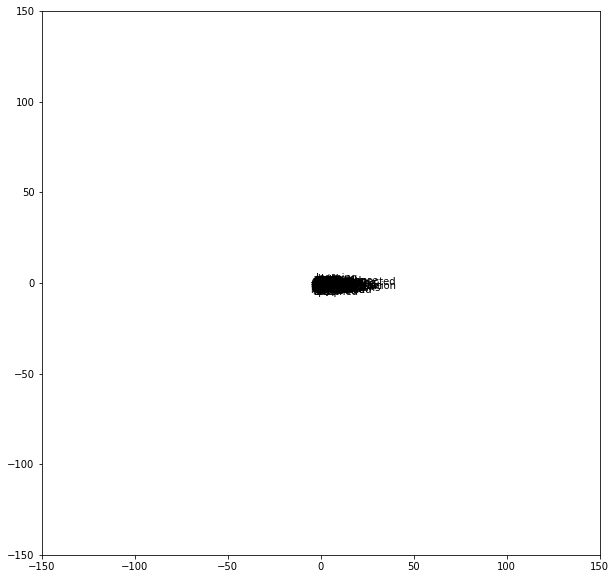

In [10]:
import tensorflow as tf
emb_dims = 128
learning_rate = 0.001

# ---------------------------------------------
# Placeholders for Input output
# ----------------------------------------------
x = tf.placeholder(tf.float32, [None, vocab_size])
y = tf.placeholder(tf.float32, [None, vocab_size])
# ---------------------------------------------
# Define the Embedding matrix weights and a bias
# ----------------------------------------------
W = tf.Variable(tf.random_normal([vocab_size, emb_dims], mean=0.0, stddev=0.02, dtype=tf.float32))
b = tf.Variable(tf.random_normal([emb_dims], mean=0.0, stddev=0.02, dtype=tf.float32))
W_outer = tf.Variable(tf.random_normal([emb_dims, vocab_size], mean=0.0, stddev=0.02, dtype=tf.float32))
b_outer = tf.Variable(tf.random_normal([vocab_size], mean=0.0, stddev=0.02, dtype=tf.float32))

hidden = tf.add(tf.matmul(x, W), b)
logits = tf.add(tf.matmul(hidden, W_outer), b_outer)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

epochs, batch_size = 100, 10
batch = len(x_train)//batch_size

# train for n_iter iterations
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('was here')
    for epoch in range(epochs):
        batch_index = 0
        for batch_num in range(batch):
            x_batch = x_train[batch_index: batch_index + batch_size]
            y_batch = y_train[batch_index: batch_index + batch_size]
            sess.run(optimizer, feed_dict={x: x_batch, y: y_batch})
            print('epoch:', epoch, 'loss :', sess.run(cost, feed_dict={x: x_batch, y: y_batch}))
    W_embed_trained = sess.run(W)

W_embedded = TSNE(n_components=2).fit_transform(W_embed_trained)
plt.figure(figsize=(10, 10))
for i in range(len(W_embedded)):
    plt.text(W_embedded[i, 0], W_embedded[i, 1], ind2word[i])

plt.xlim(-150, 150)
plt.ylim(-150, 150)